## **ABCDEats Company - Customer Segmentation**

![Alt Text](https://www.coforge.com/hubfs/Imported_Blog_Media/Screenshot-2022-01-20-at-12_18_26-1024x294-1-1.png)


**Notebook 2:  Data Preparation-Part 1**

We are now at stage 3: In this step of the Process, we will start the data preparation, where we will identify and correct  data incoherences and treat the missing values identified in the posterior notebook. 

## **Group Members:**

* **Guilherme Goudinho**- 20211552
* **Maria Inês Assunção**- 20211605
* **Osmáiny Raimundo**- e20191506
* **Vinincius Lallo**- 20211682

## **METADATA**
 * **customer_id** :  Unique identifier for each customer.

 * **customer_region**:  Geographic region where the customer is located.

 * **customer_age**:  Age of the customer.

 * **vendor_count**:  Number of unique vendors the customer has ordered from.

 * **product_count**:  Total number of products the customer has ordered.

 * **is_chain**:  Indicates whether the customer’s order was from a chain restaurant. From the total orders, which ones are from a chain restaurant.

 * **first_order** :  Number of days from the start of the dataset when the customer first placed an order.


 * **last_order** Number of days from the start of the dataset when the customer most  recently placed an order.


 * **last_promo** :  The category of the promotion or discount most recently used by the
 customer.

 * **payment_method** :  Method most recently used by the customer to pay for their orders.

 * **CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc**. : The amount in monetary units spent by the customer from the indicated type of cuisine.

 * **DOW_0 to DOW_6**:   Number of orders placed on each day of the week
 (0 =Sunday, 6 =Saturday).

 * **HR_0 to HR_23** :  Number of orders placed during each hour of the day
 (0 =midnight, 23 = 11 PM).
 




<a id = "toc"></a>
## Table of Contents

1. [Imports](#Imports)
    
2. [Exploratory Data Analysis](##Exploratory-Data-Analysis)
    1. [Data Exploration](##Data-Exploration)
        1. [Importing the Data](##Importing-the-Data)
        2. [Initial Analysis](##Initial-Analysis)
        3. [Checking Duplicated Values](##Checking-Duplicated-Values)
        4. [Checking Missing Values](##Checking-Missing-Values)
2. [Data Preparation](#Data-Preparation)
    1. [Coherence Check](##Coherence-Check)
    2. [Missing values Treatment](##Missing-values-Treatment)
3. [EDA After Missing values Treatment](#EDA-After-Missing-values-Treatment)
    1. [Feature Engineering for visualizations](##Feature-Engineering-for-visualizations)
    2. [Data Statistics](##Data-Statistics)
        1. [Numerical Variables](###Numerical-Variables)
        2. [Categorical Variables](###Categorical-Variables)
    3. [Visual Exploration](#Visual-Exploration)
        1. [Numerical Variables](##Numerical-Variables)
        2. [Categorical Variables](##Categorical-Variables)

 
    

# **1. Imports** <a id="Imports" class="anchor"></a>
[Back to ToC](#toc)<br>

In [218]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Standard libraries
import os
from itertools import product
from math import ceil

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Statistical analysis
from scipy.stats import chi2_contingency
import scipy.stats as stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image handling
from PIL import Image

# IPython display utilities
from IPython.display import display

# Data profiling
from ydata_profiling import ProfileReport

# Inline plot settings
%config InlineBackend.figure_format = 'retina'

# Seaborn settings
sns.set()

# Display all columns in pandas
pd.set_option('display.max_columns', None)

In [219]:
#Defining the colors for our graphs
colors = {
    "R": "#F5979D", #light red
    "BL": "#0a9ea3", #cyan blue
    "BR": "#4F323D", #brown
    "B": "#9cc5d9",  #light blue
    "G": "#099c52",  #spring green
    "Y": "#d69231",   #Yellow
    "M": "#960b50",   # some kind of pink
    "P": "#6947ad" ,   # Purple
    "PR": "#ad474c"  #Weird red
}

# Auxiliary Function for Data Visualizations
def plot_distribution(dataframe, feature, color=colors["BL"]):
    """
    This function plots both the histogram and boxplot side by side for the specified feature.

    Parameters:
    - dataframe: The pandas DataFrame containing the data.
    - feature: The column name (string) of the feature you want to visualize.
    - color: The color to use for the plots.

    Returns:
    - None (Displays the plots)
    """
    # Create the figure and axes objects for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the histogram on the first subplot (axes[0])
    axes[0].hist(dataframe[feature], bins=30, color=color, edgecolor='black')
    axes[0].set_title(f'{feature} Distribution (Histogram)')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    # Plot the boxplot on the second subplot (axes[1])
    axes[1].boxplot(dataframe[feature].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor=color))
    axes[1].set_title(f'{feature} Distribution (Boxplot)')
    axes[1].set_xlabel(feature)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plots
    plt.show()

    
# Auxiliary Function to Calculate bins for histograms based on Sturges' rule
def number_bins_sturges(data):
    '''
    Calculates the number of bins based on the number of data points, using Sturges' rule
    Sturges' rule: k = log2(n) + 1

    Requires: The dataset for which the number of bins is to be calculated.
    Ensures: 
        - The returned value is a positive integer representing the number of bins.
        - The number of bins increases logarithmically as the dataset size increases.
    '''
    
    n = len(data)
    bins = np.ceil(np.log2(n) + 1) # np.log2 computes the base-2 logarithm of n, and np.ceil rounds the result up to the next whole number.
    return int(bins)

# **2. Exploratory Data Analysis** <a id="Exploratory-Data-Analysis" class="anchor"></a>
[Back to ToC](#toc)<br>

As the Data understending step was already performed in the notebook 1, it was still important to evaluate again the data before teating it.

### 2.1 **Data Exploration** <a id="Data-Exploration" class="anchor"></a>

### 2.1.1 **Importing the Data** <a id="Importing-the-Data" class="anchor"></a>

In [220]:
#Importing our dataset into a variable "food_df"
food_df=pd.read_csv("../Data/DM2425_ABCDEats_DATASET.csv")

### 2.1.2 **Initial Analysis** <a id="Initial-Analysis" class="anchor"></a>

In [221]:
food_df.head(6) #Checking the first 6 rows of our dataset

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   
5  6aef2b6726            8670          40.0             2              2   

   is_chain  first_order  last_order last_promo payment_method  CUI_American  \
0         1          0.0           1   DELIVERY           DIGI          0.00   
1         2          0.0           1   DISCOUNT           DIGI         12.82   
2         2          0.0           1   DISCOUNT           CASH          9.20   
3         1          0.0           2   DELIVERY           DIGI          0.00   
4         0          0.0           2          -           DIGI         14.57   
5         0          0.0           2    FREEBIE           DIGI          0.00   

   CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  \
0       0.00            0.0       0.0                 0.0          0.0   
1       6.39            0.0       0.0                 0.0          0.0   
2       0.00            0.0       0.0                 0.0          0.0   
3      13.70            0.0       0.0                 0.0          0.0   
4      40.87            0.0       0.0                 0.0          0.0   
5      24.92            0.0       0.0                 0.0          0.0   

   CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  CUI_Japanese  \
0           0.0          0.0       28.88          0.0           0.0   
1           0.0          0.0        0.00          0.0           0.0   
2           0.0          0.0        0.00          0.0           0.0   
3           0.0          0.0       17.86          0.0           0.0   
4           0.0          0.0        0.00          0.0           0.0   
5           0.0          0.0        0.00          0.0           0.0   

   CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  \
0                0.0        0.0                       0.0       0.0      1   
1                0.0        0.0                       0.0       0.0      1   
2                0.0        0.0                       0.0       0.0      1   
3                0.0        0.0                       0.0       0.0      0   
4                0.0        0.0                       0.0       0.0      0   
5                0.0        0.0                       0.0       0.0      0   

   DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
0      0      0      0      0      0      1   0.0     0     0     0     0   
1      0      0      0      0      0      1   0.0     0     0     0     0   
2      0      0      0      0      0      1   0.0     0     0     0     0   
3      1      0      0      0      0      1   0.0     0     0     0     0   
4      1      0      0      0      0      1   0.0     0     0     0     0   
5      1      0      0      0      0      1   0.0     1     0     1     0   

   HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  HR_15  \
0     0     0     0     0     0      0      0      0      0      0      0   
1     0     0     0     0     0      1      1      0      0      0      0   
2     0     0     0     0     1      0      1      0      0      0      0   
3     0     0     0     0     0      0      1      0      0      1      0   
4     0     0     0     1     1      0      0      0      0      0      0   
5     0     0     0     0     0      0      0      0      0      0      0   

   HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0  

In [222]:
food_df.tail(5) # Checking if there are any aggregation rows that may affect our dataset, which in this case, there aren´t any

customer_id customer_region  customer_age  vendor_count  product_count  \
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_order last_promo payment_method  \
31883         1          NaN           0    FREEBIE           DIGI   
31884         0          NaN           0   DELIVERY           DIGI   
31885         1          NaN           0          -           DIGI   
31886         0          NaN           0   DISCOUNT           DIGI   
31887         0          NaN           0          -           CASH   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
31883          0.00       0.00          18.04       0.0                 0.0   
31884         18.04       0.00           0.00       0.0                 0.0   
31885          0.00       0.00           0.00       0.0                 0.0   
31886          0.00      12.03           0.00       0.0                 0.0   
31887          0.00       0.00           0.00       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
31883          0.0          0.00          0.0         0.0         0.00   
31884          0.0          0.00          0.0         0.0         0.00   
31885          0.0         17.79          0.0         0.0         0.00   
31886          0.0          0.00          0.0         0.0         0.00   
31887          0.0          0.00          0.0         0.0         7.91   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
31883           0.0                0.0        0.0                       0.0   
31884           0.0                0.0        0.0                       0.0   
31885           0.0                0.0        0.0                       0.0   
31886           0.0                0.0        0.0                       0.0   
31887           0.0                0.0        0.0                       0.0   

       CUI_Thai  DOW_0  DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  \
31883       0.0      0      0      0      0      0      0      1   0.0     0   
31884       0.0      0      0      0      0      0      0      1   0.0     0   
31885       0.0      0      0      0      0      0      0      1   0.0     0   
31886       0.0      0      0      0      0      0      0      1   0.0     0   
31887       0.0      0      0      0      0      0      0      1   0.0     0   

       HR_2  HR_3  HR_4  HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  \
31883     0     0     0     0     0     0     0     0      0      0      0   
31884     0     0     0     0     0     0     0     0      0      0      0   
31885     0     0     0     1     0     0     0     0      0      0      0   
31886     0     0     0     0     0     0     0     0      0      1      0   
31887     0     0     0     0     0     0     0     0      0      0      0   

       HR_13  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  \
31883      1      0      0      0      0      0      0      0      0      0   
31884      0      0      0      1      0      0      0      0      0      0   
31885      0      0      0      0      0      0      0      0      0      0   
31886      0      0      0      0      0      0      0      0      0      0   
31887      0      0      0      1      0      0      0      0      0      0   

       HR_23  
31883      0  
31884      0  
31885      0  
31886      0  
31887      0

> <code> customer_id </code> could be a candidate to set as our index column. <br>
> <code> first_order </code> represents a day (0-90) indicating when an purchase was made from the beginning of the database.

In [223]:
# checking the number of columns and rows of our dataset
print(f"Our dataset has \033[1;35m{food_df.shape[0]}\033[0m rows and \033[1;35m{food_df.shape[1]}\033[0m columns.")

Our dataset has 31888 rows and 56 columns.


In [224]:
food_df.info() # Getting the information about our dataset: column, column length, and datatype, in order to identify possible wrong dataypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [225]:
print_chain_values= pd.DataFrame(food_df['is_chain'].value_counts()).T
print(print_chain_values)

is_chain    1     0     2     3     4     5    6    7    8    9    10   11  \
count     8547  6104  5893  3698  2165  1380  946  679  500  374  291  248   

is_chain   12   13   14  15  16  18  17  19  20  21  22  24  23  26  27  25  \
count     169  152  138  89  68  65  55  35  34  29  26  23  20  20  16  14   

is_chain  28  29  31  30  32  33  34  36  43  40  37  35  45  39  42  48  75  \
count     13  10   9   9   8   6   6   5   5   5   4   4   4   2   2   2   1   

is_chain  63  54  83  49  46  61  44  67  56  81  73  47  38  65  80  
count      1   1   1   1   1   1   1   1   1   1   1   1   1   1   1  


> We believe <code>is_chain</code> might indicate <b>out of all the orders done by one customer</b> how many were from a chain restaurant.

In [226]:
food_df['first_order'] 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
31883    NaN
31884    NaN
31885    NaN
31886    NaN
31887    NaN
Name: first_order, Length: 31888, dtype: float64

> <code>first_order</code> NaN values here don't make sense because if the customer is registered in the dataset, that means at least one order placed, so this is probably an error.

In [227]:
food_df['HR_0'].value_counts()

HR_0
0.0    30723
Name: count, dtype: int64

> <code>HR_0</code> There is no variability in the data. Also represents no order was ever made at midnight which seems unlikely and probably represents an error.


### 2.1.3 **Checking Duplicated Values** <a id="Checking-Duplicated-Values" class="anchor"></a>
[Top of Section](#Exploratory-Data-Analysis)<br>

In [228]:
duplicates=food_df.duplicated().sum() #Checking the duplicate values
print(f"Our dataset has \033[1;35m{duplicates}\033[0m duplicated rows")

Our dataset has 13 duplicated rows


In [229]:
food_df[food_df.duplicated(keep=False)] # checking the duplicated records

customer_id customer_region  customer_age  vendor_count  product_count  \
3355   b55012ee1c            8550          23.0             4             11   
3379   b55012ee1c            8550          23.0             4             11   
7867   24251eb7da            8550          28.0             4              8   
7887   24251eb7da            8550          28.0             4              8   
16227  671bf0c738            8550          25.0             4              7   
16230  671bf0c738            8550          25.0             4              7   
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   
24328  df91183978            8550          23.0             2              3   
24329  df91183978            8550          23.0             2              3   
24822  6bbf5f74cd            8550          22.0            10             20   
24827  6bbf5f74cd            8550          22.0            10             20   
25792  8aa9bbc147            8550          24.0             2              4   
25793  8aa9bbc147            8550          24.0             2              4   
27514  cf563a0a98            8550          27.0             2              2   
27515  cf563a0a98            8550          27.0             2              2   
27653  201a13a34d            8550          28.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28706  06018a56be            8550          27.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29922  fac7984c0d            8550          29.0             1              1   
29926  fac7984c0d            8550          29.0             1              1   
30402  b8e7a643a4            8550          18.0             2              4   
30416  b8e7a643a4            8550          18.0             2              4   
31639  cc08ef25ce            8550          31.0             1              2   
31653  cc08ef25ce            8550          31.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
3355          1          2.0          89    FREEBIE           CARD   
3379          1          2.0          89    FREEBIE           CARD   
7867          3          7.0          85          -           CARD   
7887          3          7.0          85          -           CARD   
16227         3         23.0          66    FREEBIE           CARD   
16230         3         23.0          66    FREEBIE           CARD   
20855         0         35.0          35          -           CARD   
20907         0         35.0          35          -           CARD   
24328         1         47.0          52   DELIVERY           CARD   
24329         1         47.0          52   DELIVERY           CARD   
24822         9         48.0          88          -           CARD   
24827         9         48.0          88          -           CARD   
25792         2         53.0          59   DELIVERY           DIGI   
25793         2         53.0          59   DELIVERY           DIGI   
27514         0         61.0          62    FREEBIE           CASH   
27515         0         61.0          62    FREEBIE           CASH   
27653         1         62.0          62   DELIVERY           CARD   
27739         1         62.0          62   DELIVERY           CARD   
28706         0         67.0          89    FREEBIE           DIGI   
28713         0         67.0          89    FREEBIE           DIGI   
29922         0         75.0          75   DELIVERY           CARD   
29926         0         75.0          75   DELIVERY           CARD   
30402         0         78.0          78    FREEBIE           CASH   
30416         0         78.0          78    FREEBIE           CASH   
31639         1         88.0          88          -           DIGI   
31653         1         8

> - These represent the 26 records that are duplicated. For each customer_id, one record will be dropped (doesn't matter which since they have exactly the same information).<br>
> - All the duplicated values come from the same <code>Customer Region</code> `8550`.

In [230]:
#Dropping the duplicated rows
food_df.drop_duplicates(inplace=True)
new_duplicates=food_df.duplicated().sum()

In [231]:
#Checking again, if we still have duplicated rows
print(f"Our dataset has now \033[1;35m{new_duplicates}\033[0m duplicated rows")

Our dataset has now 0 duplicated rows


In [232]:
#Checking if our customer_id column has duplicates 
customer_duplicate=food_df['customer_id'].duplicated().sum()
print(f"Our The customer_id column has \033[1;35m{customer_duplicate}\033[0m duplicated entries")

Our The customer_id column has 0 duplicated entries


> - <code>customer_id</code> has no duplicated values, we can now set it as our index column.

### 2.1.4 **Checking Missing Values** <a id="Checking-Missing-Values" class="anchor"></a>
[Top of Section](#Exploratory-Data-Analysis)<br>

In this section, we will identify columns with missing values. Missing data can reduce the amount of information available for analysis, so it is important to carefully assess and handle them.

In [233]:
# Checking and printing columns with missing values for each column
for column in food_df.columns:
    missing_values = food_df[column].isna().sum()
    if missing_values > 0:
        print(f"\033[1;35m{column} \033[0m has \033[1;35m{missing_values}\033[0m missing values")

customer_age  has 727 missing values
first_order  has 106 missing values
HR_0  has 1164 missing values


__**Missing data in categorical variables**__

In [234]:
food_df['last_promo'].value_counts()

last_promo
-           16744
DELIVERY     6282
DISCOUNT     4496
FREEBIE      4353
Name: count, dtype: int64

In [235]:
food_df['customer_region'].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      13
Name: count, dtype: int64

> - <code>last_promo</code> and <code>customer_region</code> have a missing data labeled as <b>'-'</b>. We believe they mean 'No promotion applied' (16744) and 'Unknown' (442), respectively. We want to study the behavior of these variables, so we will impute <b>'nopromo' and 'noregion'</b> for now.

In [236]:
# Replacing the values for 'last_promo'
food_df['last_promo'].replace("-", "NOPROMO", inplace=True)  
food_df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', 'NOPROMO', 'FREEBIE'], dtype=object)

In [237]:
# Replacing the values for 'customer_region'
food_df['customer_region'].replace("-", "NoRegion", inplace=True) 
food_df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', 'NoRegion', '4140', '2490', '8370',
       '8550'], dtype=object)

__**Checking for other type of missing values ( , ?, null, na, NK)**__

In [238]:
#In case there are other missing values in different forms, we will replace them by NaN
food_df.replace(["","?"," ","null", "NK", "na"], np.nan, inplace = True)

In [239]:
# Checking and printing columns with missing values afetr the replacedment
for column in food_df.columns:
    missing_values = food_df[column].isna().sum()
    if missing_values > 0:
        print(f"\033[1;35m{column} \033[0m has \033[1;35m{missing_values}\033[0m missing values")

customer_age  has 727 missing values
first_order  has 106 missing values
HR_0  has 1164 missing values


> - Our values didn't change, so we don't have any other unknown values in our features.
> - We have <b>5 columns</b> with missing values: first_order, customer_age, HR_0, last_promo_customer_region.

`Key Takeaways:` 
* We identified 13 duplicated values, which were removed.
* We identified 3 columns with missing values, plus 2 categorical varibales with "-" as missing values, which we replaced by "NOPROMO" and "NOREGION".
* Ambiguity in the is_chain column (needs deeper analysis).
* We identified some incoherences in the is_chain, vendor_count, product_count, first and last order, which will be further analyzed in the next sections.

# 3. Data Preparation

This step ensures the data makes logical sense and adheres to expected patterns or relationships. We will also engineer the creation of auxiliary columns that will help us with our statistical analysis.

### 3.1 **Coherence Check** <a id="Coherence-Check" class="anchor"></a>
[Top of Section](#Exploratory-Data-Analysis)<br>

__**Setting our Index Column**__

In [240]:
food_df = food_df.set_index('customer_id')

__**Checking Data Types**__

In [241]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31875 non-null  object 
 1   customer_age              31148 non-null  float64
 2   vendor_count              31875 non-null  int64  
 3   product_count             31875 non-null  int64  
 4   is_chain                  31875 non-null  int64  
 5   first_order               31769 non-null  float64
 6   last_order                31875 non-null  int64  
 7   last_promo                31875 non-null  object 
 8   payment_method            31875 non-null  object 
 9   CUI_American              31875 non-null  float64
 10  CUI_Asian                 31875 non-null  float64
 11  CUI_Beverages             31875 non-null  float64
 12  CUI_Cafe                  31875 non-null  float64
 13  CUI_Chicken Dishes        31875 non-null  float64
 1

> From this result, we observed the following columns with possible wrong datatypes:<br>
> - <code>customer_age</code> <i>(float64)</i> - Ages should be whole numbers. <br>
> - <code>first_order</code> <i>(float64)</i> - Represents a day, so should be a whole number.<br>
> - <code>HR_0</code> <i>(float64)</i> - Represents the number of orders in that hour, should be a whole number.<br>

In [242]:
food_df['customer_age'] = food_df['customer_age'].astype('Int64')
food_df['first_order'] = food_df['first_order'].astype('Int64')
food_df['HR_0'] = food_df['HR_0'].astype('Int64')
food_df[['customer_age', 'first_order', 'HR_0']].dtypes

customer_age    Int64
first_order     Int64
HR_0            Int64
dtype: object

__**Orders without any items and from nowhere**__

In [ ]:
food_df[(food_df['vendor_count'] == 0) & (food_df['product_count'] == 0)]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4903041977             8670            22             0              0   
c94b288475             8670            26             0              0   
f687717dc1             8670            21             0              0   
c6cf0b76fb             8670            38             0              0   
1b7c34738e             8670            24             0              0   
...                     ...           ...           ...            ...   
177ede2420             8670            30             0              0   
0039059c9c             8670            22             0              0   
0e60632fe2             8670            23             0              0   
28ed1f1e3f             8670            20             0              0   
4c06e104de             8670            25             0              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4903041977          1            1           1   DELIVERY           DIGI   
c94b288475          0            1           1   DELIVERY           CASH   
f687717dc1          1            1           1   DELIVERY           DIGI   
c6cf0b76fb          0            2           2   DELIVERY           CASH   
1b7c34738e          0            3           3    NOPROMO           CASH   
...               ...          ...         ...        ...            ...   
177ede2420          1           86          86    NOPROMO           DIGI   
0039059c9c          1           88          88   DISCOUNT           CARD   
0e60632fe2          0           89          89   DISCOUNT           CARD   
28ed1f1e3f          0           89          89   DELIVERY           DIGI   
4c06e104de          1           89          89    NOPROMO           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
4903041977            0.0        0.0            0.0       0.0   
c94b288475            0.0        0.0            0.0       0.0   
f687717dc1            0.0        0.0            0.0       0.0   
c6cf0b76fb            0.0        0.0            0.0       0.0   
1b7c34738e            0.0        0.0            0.0       0.0   
...                   ...        ...            ...       ...   
177ede2420            0.0        0.0            0.0       0.0   
0039059c9c            0.0        0.0            0.0       0.0   
0e60632fe2            0.0        0.0            0.0       0.0   
28ed1f1e3f            0.0        0.0            0.0       0.0   
4c06e104de            0.0        0.0            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
4903041977                  0.0          0.0           0.0          0.0   
c94b288475                  0.0          0.0           0.0          0.0   
f687717dc1                  0.0          0.0           0.0          0.0   
c6cf0b76fb                  0.0          0.0           0.0          0.0   
1b7c34738e                  0.0          0.0           0.0          0.0   
...                         ...          ...           ...          ...   
177ede2420                  0.0          0.0           0.0          0.0   
0039059c9c                  0.0          0.0           0.0          0.0   
0e60632fe2                  0.0          0.0           0.0          0.0   
28ed1f1e3f                  0.0          0.0           0.0          0.0   
4c06e104de                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
4903041977          0.0          0.0           0.0                0.0   
c94b288475         

> - We found <b>138 records</b> that represent an order with no products, from no one and with 0€ spent.<br>
> - Also all these records are from 'customer_region'=8670. <br>
> - We believe these represent errors and therefore should be dropped.<br>

In [ ]:
food_df = food_df[~((food_df['vendor_count'] == 0) & (food_df['product_count'] == 0))] # dropping these error records

__**Orders without any items**__

In [ ]:
food_df[food_df['product_count'] == 0]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
aed85972bb             4660            27             1              0   
b2ebe2e6e0             4660            43             1              0   
6f723d9894             4660            36             1              0   
9d74f2ac81             4660            27             1              0   
27b7eed8fa             4660            35             1              0   
6c9e68b2e7             4660            22             1              0   
c0b330c4df             4660            27             1              0   
68c4faeecb             4660            25             1              0   
48e8abd5bf             4660            34             1              0   
7bfc19bd89             4660            21             1              0   
a8db558a22             4660            26             1              0   
85df5faf5f             4660            43             1              0   
eab40fe900             4660            32             1              0   
1627baf46d             4660            23             1              0   
bef195917e             4660            26             1              0   
75aa64f1f1             4660            28             1              0   
eb83bc9600             4660            28             1              0   
8d21b0b83c             4660            30             1              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
aed85972bb          0            6           6   DISCOUNT           CARD   
b2ebe2e6e0          0            6           6    NOPROMO           CARD   
6f723d9894          0           13          13   DELIVERY           CASH   
9d74f2ac81          0           19          19   DELIVERY           CARD   
27b7eed8fa          0           20          20   DISCOUNT           DIGI   
6c9e68b2e7          0           20          20   DISCOUNT           DIGI   
c0b330c4df          0           23          23   DELIVERY           CARD   
68c4faeecb          0           26          26    FREEBIE           DIGI   
48e8abd5bf          0           33          33   DELIVERY           CASH   
7bfc19bd89          0           42          42   DISCOUNT           DIGI   
a8db558a22          0           60          60    NOPROMO           CARD   
85df5faf5f          0           65          65   DISCOUNT           CARD   
eab40fe900          0           73          73   DELIVERY           CARD   
1627baf46d          0           76          76    NOPROMO           DIGI   
bef195917e          0           84          84   DELIVERY           CARD   
75aa64f1f1          0           85          85    NOPROMO           CASH   
eb83bc9600          0           86          86   DELIVERY           CARD   
8d21b0b83c          0           89          89   DELIVERY           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
aed85972bb           0.00       0.00            0.0       0.0   
b2ebe2e6e0           0.00       0.00            0.0       0.0   
6f723d9894           0.00       0.00            0.0       0.0   
9d74f2ac81           0.00       0.00            0.0       0.0   
27b7eed8fa           0.00       0.00            0.0       0.0   
6c9e68b2e7           0.00       0.00            0.0       0.0   
c0b330c4df           0.00       0.00            0.0       0.0   
68c4faeecb           0.00       0.00            0.0       0.0   
48e8abd5bf           0.00       0.00            0.0       0.0   
7bfc19bd89           0.00       0.00            0.0       0.0   
a8db558a22           0.00       0.00            0.0       0.0   
85df5faf5f           0.00       0.00            0.0       0.0   
eab40fe900           0.00       0.00            0.0       0.0   
1627baf46d           0.00      19.1

> - We have <b>18 records</b> where we can see <code>product_count</code> is 0, but we have an order placed (exactly 1 order) if we look to the DOW's or the amount spent in HR's, so we just have to impute this value based on these.

In [ ]:
food_df.loc[food_df['product_count'] == 0, 'product_count'] = food_df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)
print(len(food_df[food_df['product_count'] == 0]))

0


__**Inconsistencies in <code>is_chain</code>**__

In [ ]:
#Filtering the rows where is_chain is bigger than total_orders
filtered_df = food_df[food_df['is_chain'] > food_df['total_orders']]
filtered_df[['is_chain', 'total_orders']]

Empty DataFrame
Columns: [is_chain, total_orders]
Index: []

> - Since <code>is_chain</code> is always <= <code>total_orders</code>, we always have values that make sense.

__**Checking <code>customer_region</code>**__

> Rememering <i>'NoRegion'</i> means we had a NaN value, and means the region is 'Unknown'.

In [ ]:
#Getting the percentage of entries for each custmer region
percentage_region=food_df.customer_region.value_counts(normalize=True) *100
percentage_region.round(2)

customer_region
8670        30.32
4660        30.09
2360        27.82
2440         4.67
4140         2.70
8370         1.56
2490         1.40
NoRegion     1.39
8550         0.04
Name: proportion, dtype: float64

> - The region with the lowest entries <i>8550<i> was also the region that had the 13 duplicated values.
> - The top 3 regions regarding frequency all belong to different 'post-code intervals'.<br>

> In the project’s description, we were informed we were looking at data from <b>3 different cities.</b> Currently, we had 8 unique regions, but all of them were either in the ranges of the <b>'2000, 4000 or 8000'</b> which could indicate geographic closeness (post-code similarities). During the EDA, we explored how each region behaves for each cuisine, time of the day, day of the week and also by payment method and types of promotion. <br>

> - From the analysis done in the EDA, we observed that regions that started with 2 had similar behaviour and regions that started with 4 also had similar behaviors, region that started with 8 and the "NoRegion" presented similar behaviors. So we cosnidered doing an agregation based on those simialrities. Possible values include: <i>‘2000’, ‘4000’, '8000', ‘no_region’</i>; <br>

> Later on, we will analyse more the agregation of "NoRegion" into the 8000 region, but for now, we keep it like this

In [ ]:
# Function to apply the transformation
def categorize_region(region):
    if region == 'NoRegion':
        return 'NoRegion'  # Keep 'NoRegion' unchanged
    elif region.startswith('2'):
        return '2000'  # Regions starting with '2' get '2000'
    elif region.startswith('4'):
        return '4000'  # Regions starting with '4' get '4000'
    elif region.startswith('8'):
        return '8000'  # Regions starting with '8' get '8000'

# Apply the function to update the 'customer_region' column
food_df['customer_region'] = food_df['customer_region'].apply(categorize_region)

In [ ]:
percentage_region=food_df.customer_region.value_counts(normalize=True) *100
percentage_region.round(2)

customer_region
2000        33.89
4000        32.79
8000        31.92
NoRegion     1.39
Name: proportion, dtype: float64

## 3.2 Missing Values Treatment

As the missing vlaues were already identifed, in this stage we will treat them, by evaluating the results shown in the EDA and the coherence check.

__**<code>Customer Age</code> Missing Values**__

In [243]:
food_df['customer_age'].isna().sum()
print(f"\033[1;35m'customer_age'\033[0m has \033[1;35m{food_df['customer_age'].isna().sum()}\033[0m missing values.")

'customer_age' has 727 missing values.


In [244]:
age_mode = food_df['customer_age'].mode()[0] 
age_mean = int(np.floor(food_df['customer_age'].mean()))
age_median = int(food_df['customer_age'].median())
print(f"The mode is \033[1;35m{age_mode}\033[0m and the mean is \033[1;35m{age_mean:}\033[0m and the median is \033[1;35m{age_median:}\033[0m.")

The mode is 23 and the mean is 27 and the median is 26.


In [245]:
age_mode_food_df = food_df.copy()
age_mean_food_df = food_df.copy()
age_median_food_df =  food_df.copy()
age_mode_food_df['customer_age'] = age_mode_food_df['customer_age'].fillna(age_mode)
age_mean_food_df['customer_age'] = age_mean_food_df['customer_age'].fillna(age_mean)
age_median_food_df['customer_age'] = age_median_food_df['customer_age'].fillna(age_median)
describe_original = food_df['customer_age'].describe()
describe_mode_imputed = age_mode_food_df['customer_age'].describe()
describe_mean_imputed = age_mean_food_df['customer_age'].describe()
describe_median_imputed = age_median_food_df['customer_age'].describe()
comparison_df = pd.DataFrame({
    'Original': describe_original,
    'Mode Imputed': describe_mode_imputed,
    'Mean Imputed': describe_mean_imputed,
    'Median Imputed': describe_median_imputed
})
comparison_df

Original  Mode Imputed  Mean Imputed  Median Imputed
count    31148.0       31875.0       31875.0         31875.0
mean   27.507545     27.404737     27.495969       27.473161
std     7.161828      7.111592      7.080087        7.083258
min         15.0          15.0          15.0            15.0
25%         23.0          23.0          23.0            23.0
50%         26.0          26.0          26.0            26.0
75%         31.0          31.0          31.0            31.0
max         80.0          80.0          80.0            80.0

> - We considered the difference between imputing with the mode vs median vs mean not significant, and went with the <b>Mean</b>.

In [246]:
food_df['customer_age'] = food_df['customer_age'].fillna(age_mean)
food_df['customer_age'].isna().sum()
print(f"\033[1;35m'customer_age'\033[0m now has \033[1;35m{food_df['customer_age'].isna().sum()}\033[0m missing values.")

'customer_age' now has 0 missing values.


__**<code>first_order</code> Missing Values**__

In [247]:
food_df['first_order'].isna().sum()
print(f"\033[1;35m'first_order'\033[0m has \033[1;35m{food_df['first_order'].isna().sum()}\033[0m missing values.")

'first_order' has 106 missing values.


In [248]:
filtered_data = food_df[food_df['first_order'].isna()][['first_order', 'last_order', 'product_count']]
filtered_data # Filter rows where 'first_order' is NaN

first_order  last_order  product_count
customer_id                                        
0366fbb035          <NA>           0              1
039d7c8a20          <NA>           0              1
04c9d25c93          <NA>           0              1
09118ae9e7          <NA>           0              1
0d1f298bbd          <NA>           0              1
...                  ...         ...            ...
f4e366c281          <NA>           0              1
f6b6709018          <NA>           0              1
f74ad8ce3f          <NA>           0              1
f7b19c0241          <NA>           0              1
fd40d3b0e0          <NA>           0              1

[106 rows x 3 columns]

In [249]:
count_last_order_zero = (filtered_data['last_order'] == 0).sum()
count_last_order_zero # Counting how many of these records have 'last_order' = 0

106

> - All records <b>(106)</b> have <code>last_order</code> equal to 0, which means their last order was placed on the first day they started collecting data. 
> - This let's us infer that this purchase was both the first and last order, therefore we can input these values as 0 for <code>first_order</code> as well, assuming these are one time customers.

In [250]:
food_df['first_order'] = food_df['first_order'].fillna(0)

`HR_0` missing values

__**Discrepancy between Orders in SUM of DOW's and HR'S**__

> - While looking at our data in excel, as presented in the notebook 1 (Exploratory Data Analysis) we noticed a discrepancy between the <b>Sum of the orders by DOW and by HR</b>. And the sum by days of the week was consistently higher. <br>
> - Remember we had a column <code>HR_0</code> with NaN values and all values equal to 0. So, we wanted to study if the discrepancy was caused by this value. <br>
> - If so, we would impute the difference in 'HR_0' to ensure consistency.

In [255]:
# UNCOMMENT - to check excel table where observations were made
'''discrep = Image.open('figures/discrepancy.png')
display(discrep)'''

"discrep = Image.open('figures/discrepancy.png')\ndisplay(discrep)"

In [256]:
food_df['HR_0'].unique()

<IntegerArray>
[0, <NA>]
Length: 2, dtype: Int64

> - Currently, we only have information about when there was no order placed at <code>HR_0</code>, but we don't know when this value is correctly assigned, so we need to fix it.

In [257]:
# Creating aggregations columns for the sum of orders to facilitate analysis
food_df['total_orders_dow'] = food_df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)
food_df['total_orders_hr'] = food_df[[f'HR_{i}' for i in range(24)]].sum(axis=1).astype('int64')

In [258]:
# Filtering the dataset to only display the records where the numbers differ
difference_mask = food_df['total_orders_dow'] != food_df['total_orders_hr']
rows_with_difference = food_df[difference_mask]
rows_with_difference[['total_orders_dow', 'total_orders_hr']]

total_orders_dow  total_orders_hr
customer_id                                   
ae38da6386                  2                1
a21a839c77                  4                3
9237d23413                  4                3
8c6ffd7357                  3                2
67c6c9f9c4                  3                2
...                       ...              ...
37b72b449d                  1                0
ac382ddfd1                  2                1
96f1fc25e3                  2                1
d7c7face7e                  1                0
6624e03cdd                  1                0

[1164 rows x 2 columns]

In [259]:
na_hr0 = food_df[food_df['HR_0'].isna()] # Filtering the dataset to see the records where HR_0 is NaN.
# Checking if these are the same dataset
are_equal = rows_with_difference.equals(na_hr0) # returns true if all records in the datasets are the same.
print(are_equal)

True


> - We identified <b>1164 records</b> with discrepancies in the total sum of orders. <br>
> - This difference only occurs when there are NaN in <code>HR_0</code>. <br>
> - We will impute this difference.

In [260]:
food_df['discrepancy'] = food_df['total_orders_dow'] - food_df['total_orders_hr']
food_df['discrepancy'].unique()

array([ 0,  1,  2,  3,  5,  4, 12,  9,  8,  7,  6, 11, 15], dtype=int64)

In [261]:
#  Imputing the values from 'total_orders_dow' into 'HR_0' where discrepancy exist
food_df['HR_0'] = food_df.apply(
    lambda row: row['total_orders_dow'] if row['discrepancy'] != 0 else row['HR_0'],
    axis=1
)
food_df.drop(columns=['discrepancy'], inplace=True)
food_df['HR_0'].isna().sum()

0

In [262]:
food_df['total_orders_dow'] - food_df['total_orders_hr']

customer_id
1b8f824d5e    0
5d272b9dcb    0
f6d1b2ba63    0
180c632ed8    0
4eb37a6705    0
             ..
f4e366c281    0
f6b6709018    0
f74ad8ce3f    0
f7b19c0241    0
fd40d3b0e0    0
Length: 31737, dtype: int64

> - We no longer have <b>NaN values</b>, meaning our imputation was sucessful.

In [263]:
food_df.drop(columns=['total_orders_hr'], inplace=True) # dropping one of the total orders column
food_df.rename(columns={'total_orders_dow': 'total_orders'}, inplace=True) # renaming the other for simplicity

In [264]:
food_df['total_orders'].unique()

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1, 29, 51, 53, 65, 45, 91, 50, 75, 49,
       48, 80, 59], dtype=int64)

# 4. EDA After MIssing values treatment

## 4.1 **Feature Engineering for Vizualizations/Statistics** <a id="fe-for-visualizations" class="anchor"></a>
[Top of Section](#Exploratory-Data-Analysis)<br>

We added this section as an auxiliary tool to create new features that will be used for the Data statistics section and visualization section. However this is not our Feature Engineering section.

`Hours of the day`

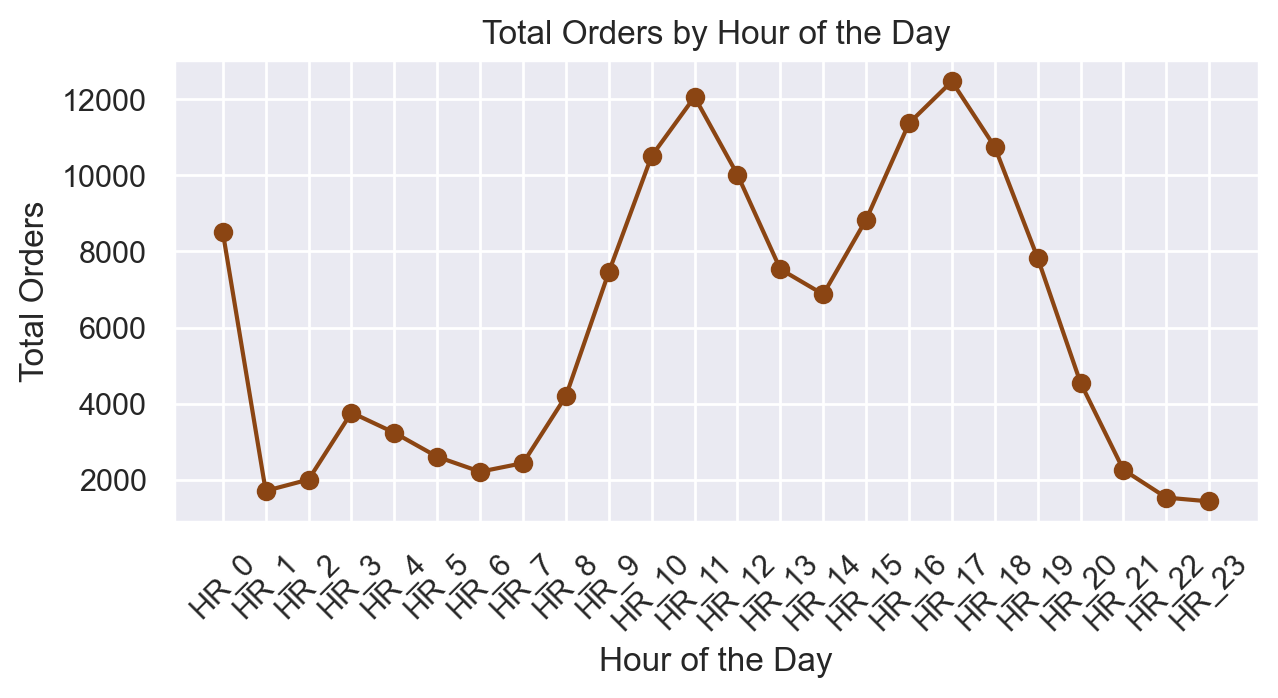

In [269]:
hours_of_the_day = [f'HR_{i}' for i in range(24)]
plt.figure(figsize=(7, 3))
plt.plot(hours_of_the_day, food_df[hours_of_the_day].sum(), marker='o', color='#8B4513')
plt.title('Total Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [270]:
# Aggregating the HR columns into midday, evening, and late_night based on the 3 peaks observed.
food_df['midday_orders'] = food_df[['HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14']].sum(axis=1)
food_df['evening_orders'] = food_df[['HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21']].sum(axis=1)
food_df['late_night_orders'] = food_df[['HR_22', 'HR_23', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6']].sum(axis=1)

`Days of the Week`

Based of the <b>International Standard ISO 8601</b>, we assumed:
* DOW_0= Monday
* DOW_1= Tuesday
* DOW_2= Wednesday
* DOW_3= Thursday
* DOW_4= Friday
* DOW_5= Saturday
* DOW_6= Sunday

<a href="https://en.wikipedia.org/wiki/ISO_8601" target="_blank">Source: ISO 8601</a>

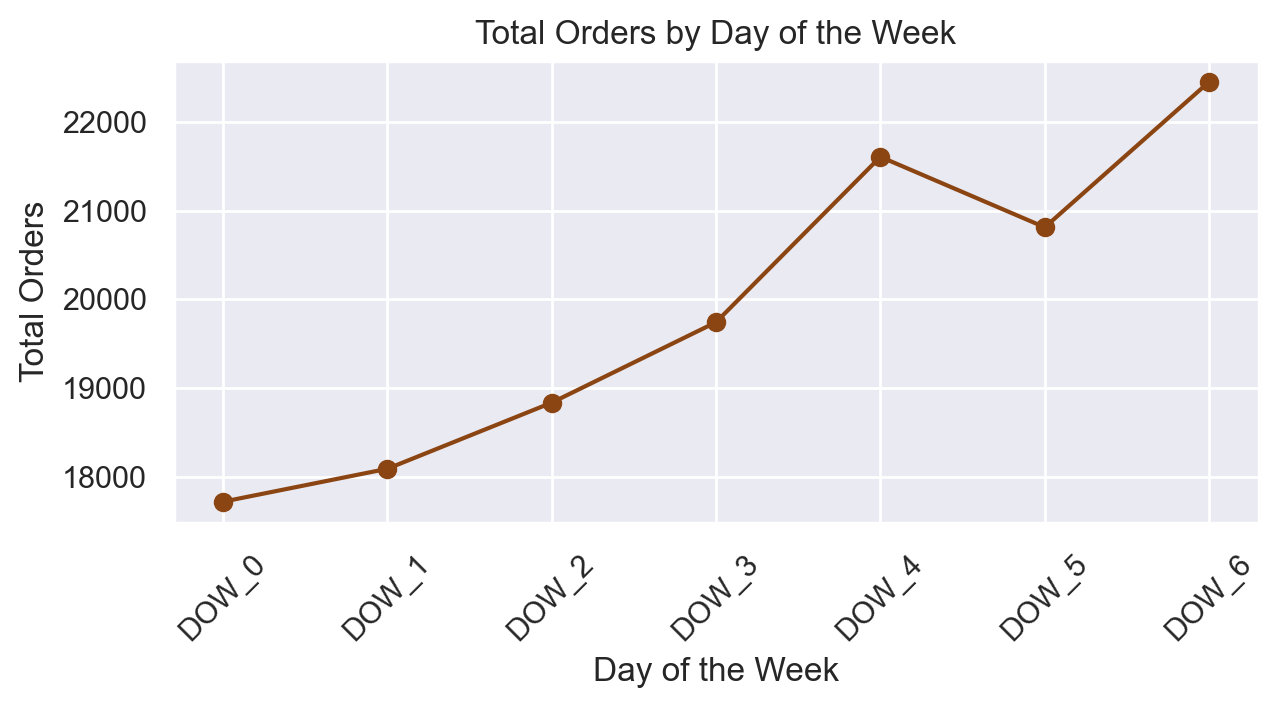

In [271]:
days_of_the_week = [f'DOW_{i}' for i in range(7)]
plt.figure(figsize=(7, 3))
plt.plot(days_of_the_week, food_df[days_of_the_week].sum(), marker='o', color='#8B4513')
plt.title('Total Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

> - We considered <b>Friday</b> as part of the 'Weekend' as the behavior observed was closest to <b>DOW_5 and DOW_6</b>.

In [272]:
food_df['Weekend']= food_df['DOW_4']+food_df['DOW_5']+ food_df['DOW_6'] # Aggregating, friday, saturday, and sunday into a weekend column
food_df['Weekday']= food_df[[f'DOW_{i}' for i in range(0,4)]].sum(axis=1).astype(int) # Aggregating, monday, tuesday, wednesday and thursday into a weekday column

`CUIsines`

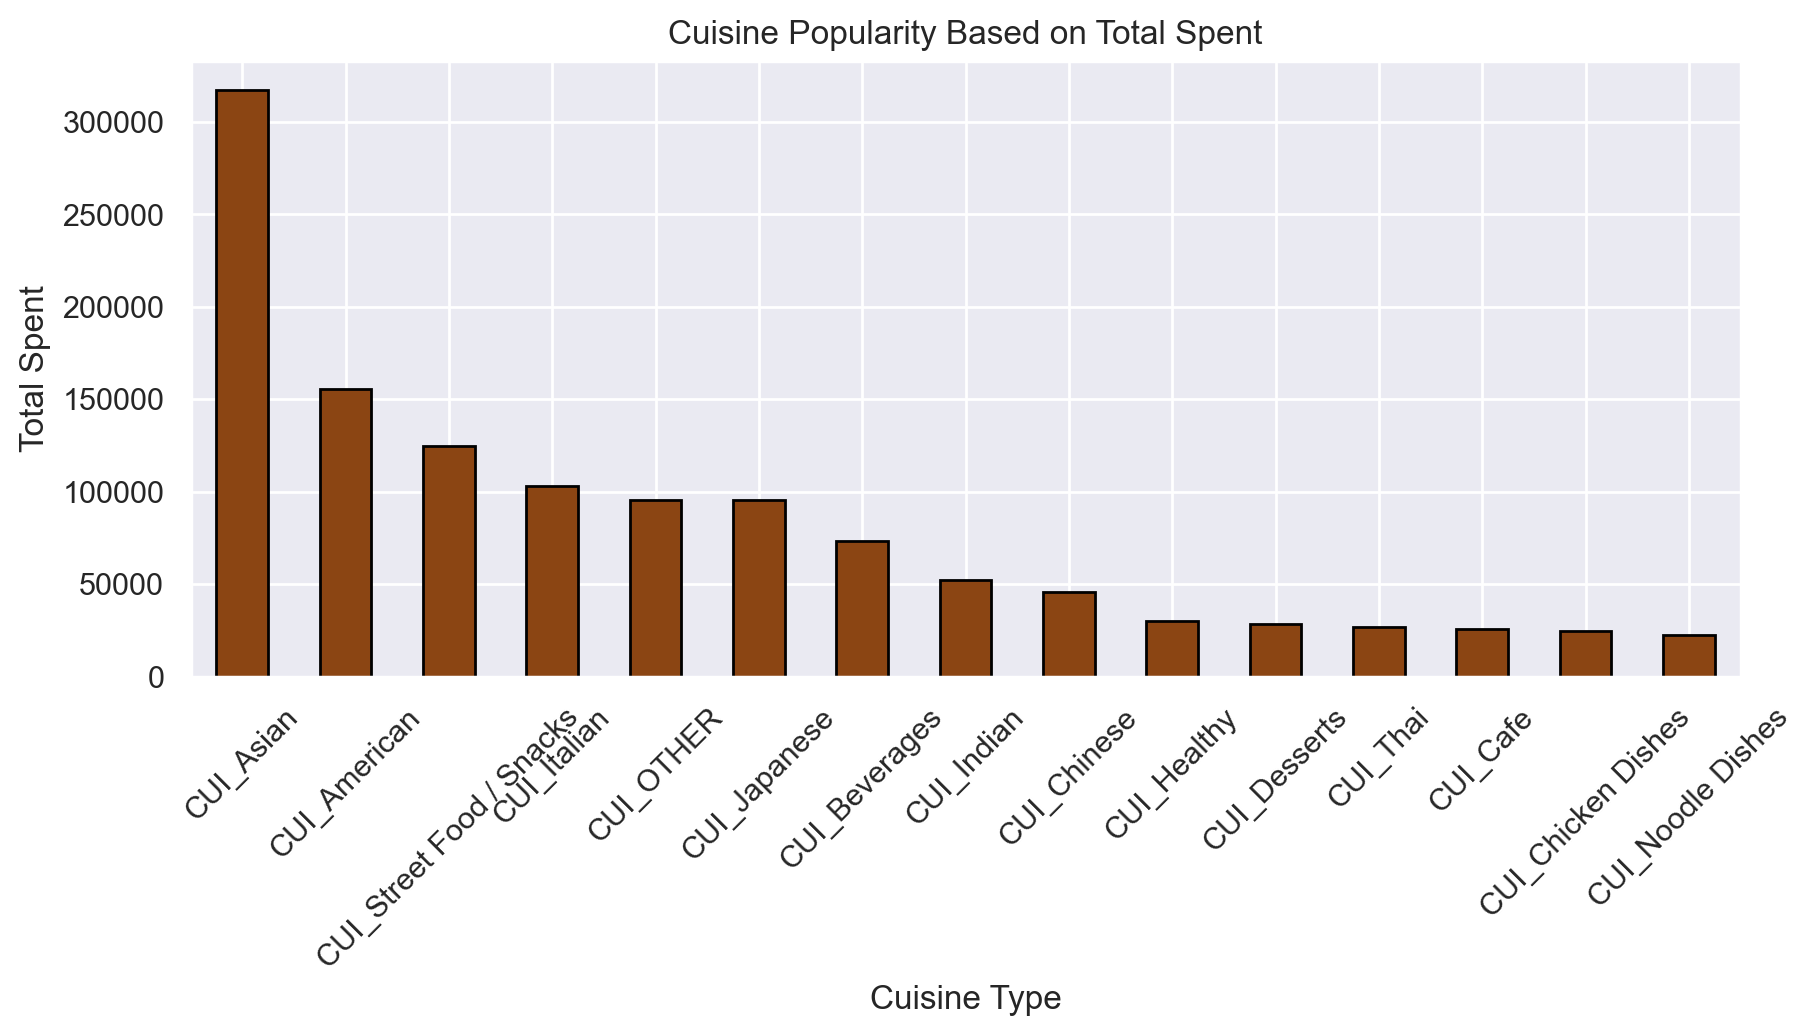

In [273]:
cuisine_columns = [col for col in food_df.columns if col.startswith('CUI_')]
cuisine_totals = food_df[cuisine_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
cuisine_totals.plot(kind='bar', color='#8B4513', edgecolor='black')
plt.title('Cuisine Popularity Based on Total Spent')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

In [274]:
food_df['Western_Cuisine'] = food_df[['CUI_American', 'CUI_Italian', 'CUI_Chicken Dishes']].sum(axis=1) # chicken dish seems like a western denomination
food_df['Asian_Cuisine'] = food_df[['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Thai', 'CUI_Noodle Dishes']].sum(axis=1) # noodle's are a very typical ocidental food
food_df['Desserts_Beverages'] = food_df[['CUI_Desserts', 'CUI_Beverages', 'CUI_Cafe']].sum(axis=1) # distributions are similar

> - The divisions considered were based on group discussion and some research about popular CUI aggregations, as well as their distributions.

`total_orders`

> This column was created by summing all the orders placed by the days of the week.<br>
> Since we already have this calculated, we won't run it again but the cell below has the code that performed this transformation.

In [275]:
#food_df['total_orders_dow'] = food_df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

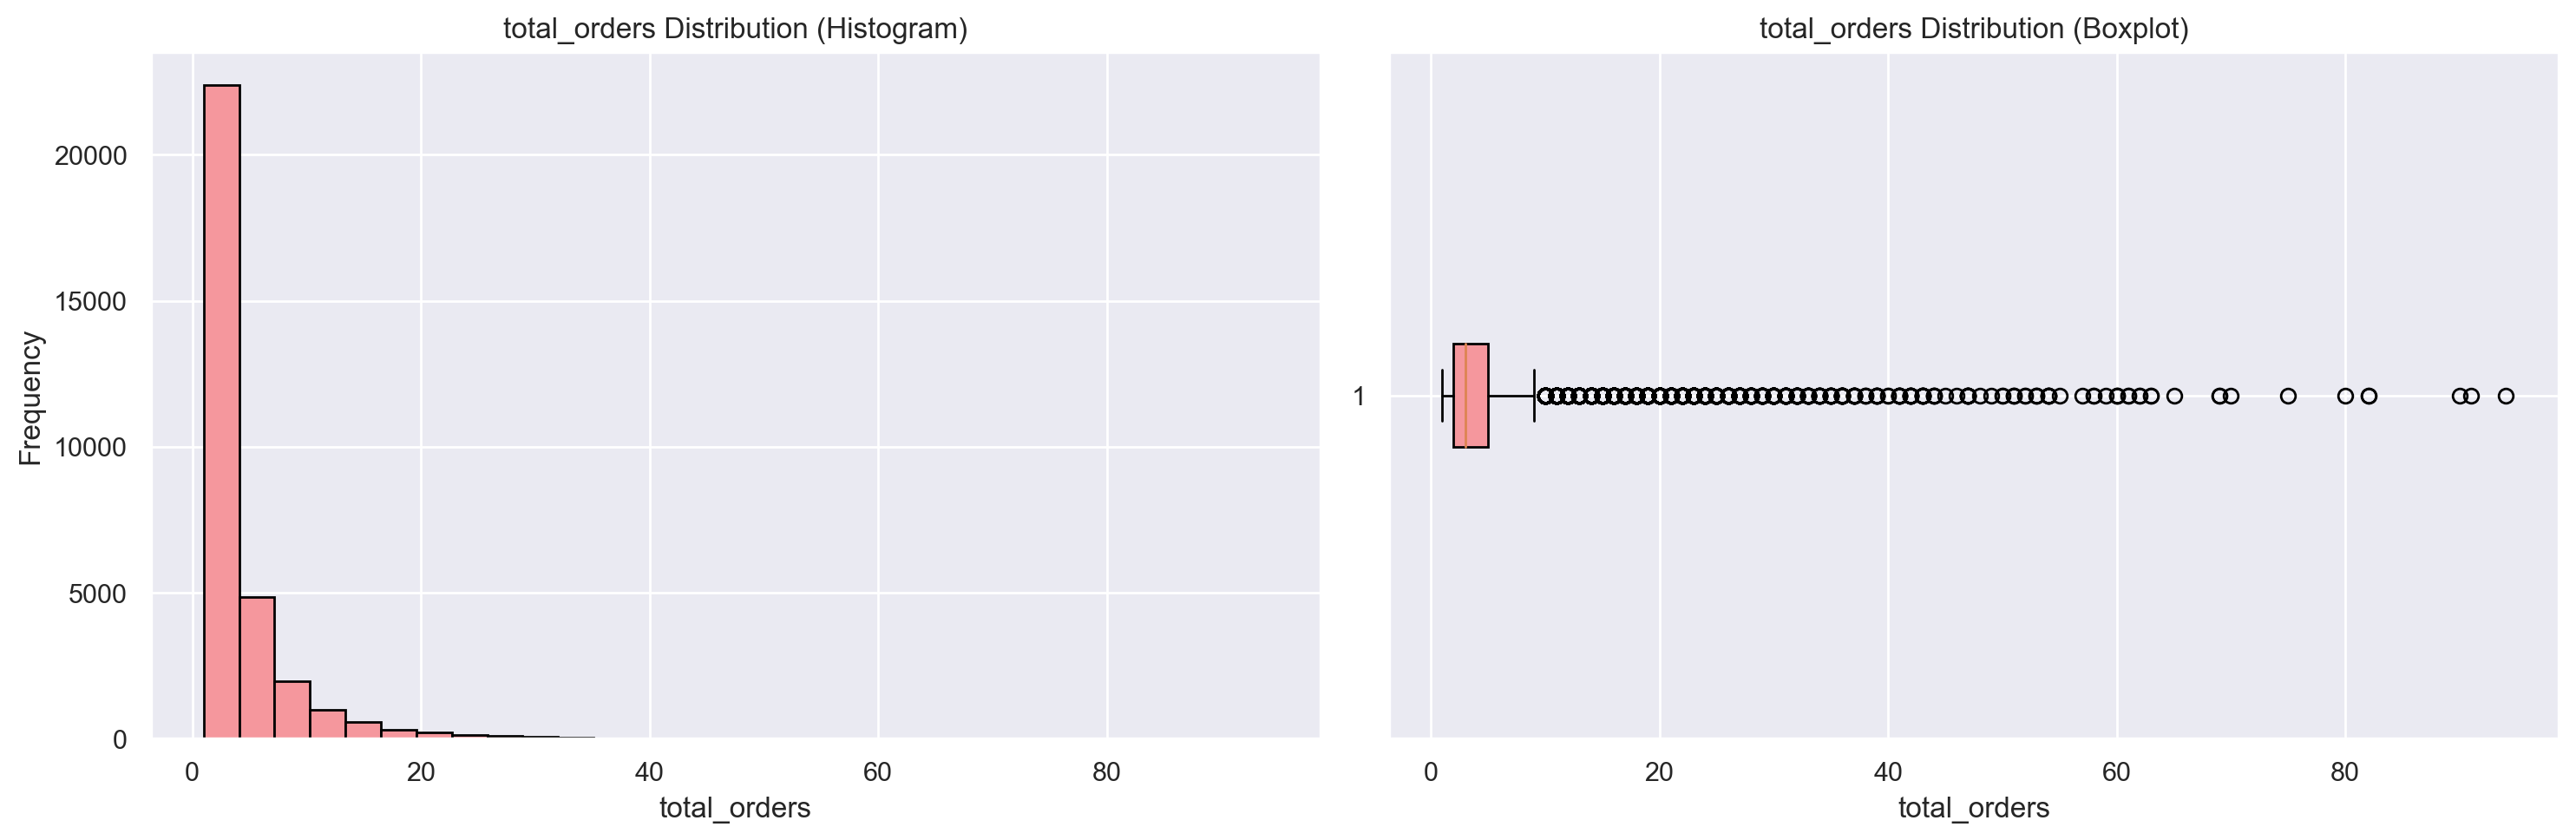

In [276]:
plot_distribution(food_df, 'total_orders', color=colors["R"])

> - Right Skewed Distribution with values ranging from 1 to 94.
> - Possible extreme outliers in upper limit, that represent customers who made a lot of purchases.

`total_spent`

> - This column was created by summing all the values in the CUIs Aggregations (created above) per customer.
> - This will give us insights into customers' behavior when it comes to spending habits.

In [277]:
cuisine_columns = ['Western_Cuisine', 'Asian_Cuisine', 'Desserts_Beverages', 'CUI_Healthy', 'CUI_OTHER', 'CUI_Street Food / Snacks']
food_df['total_spent'] = food_df[cuisine_columns].sum(axis=1)

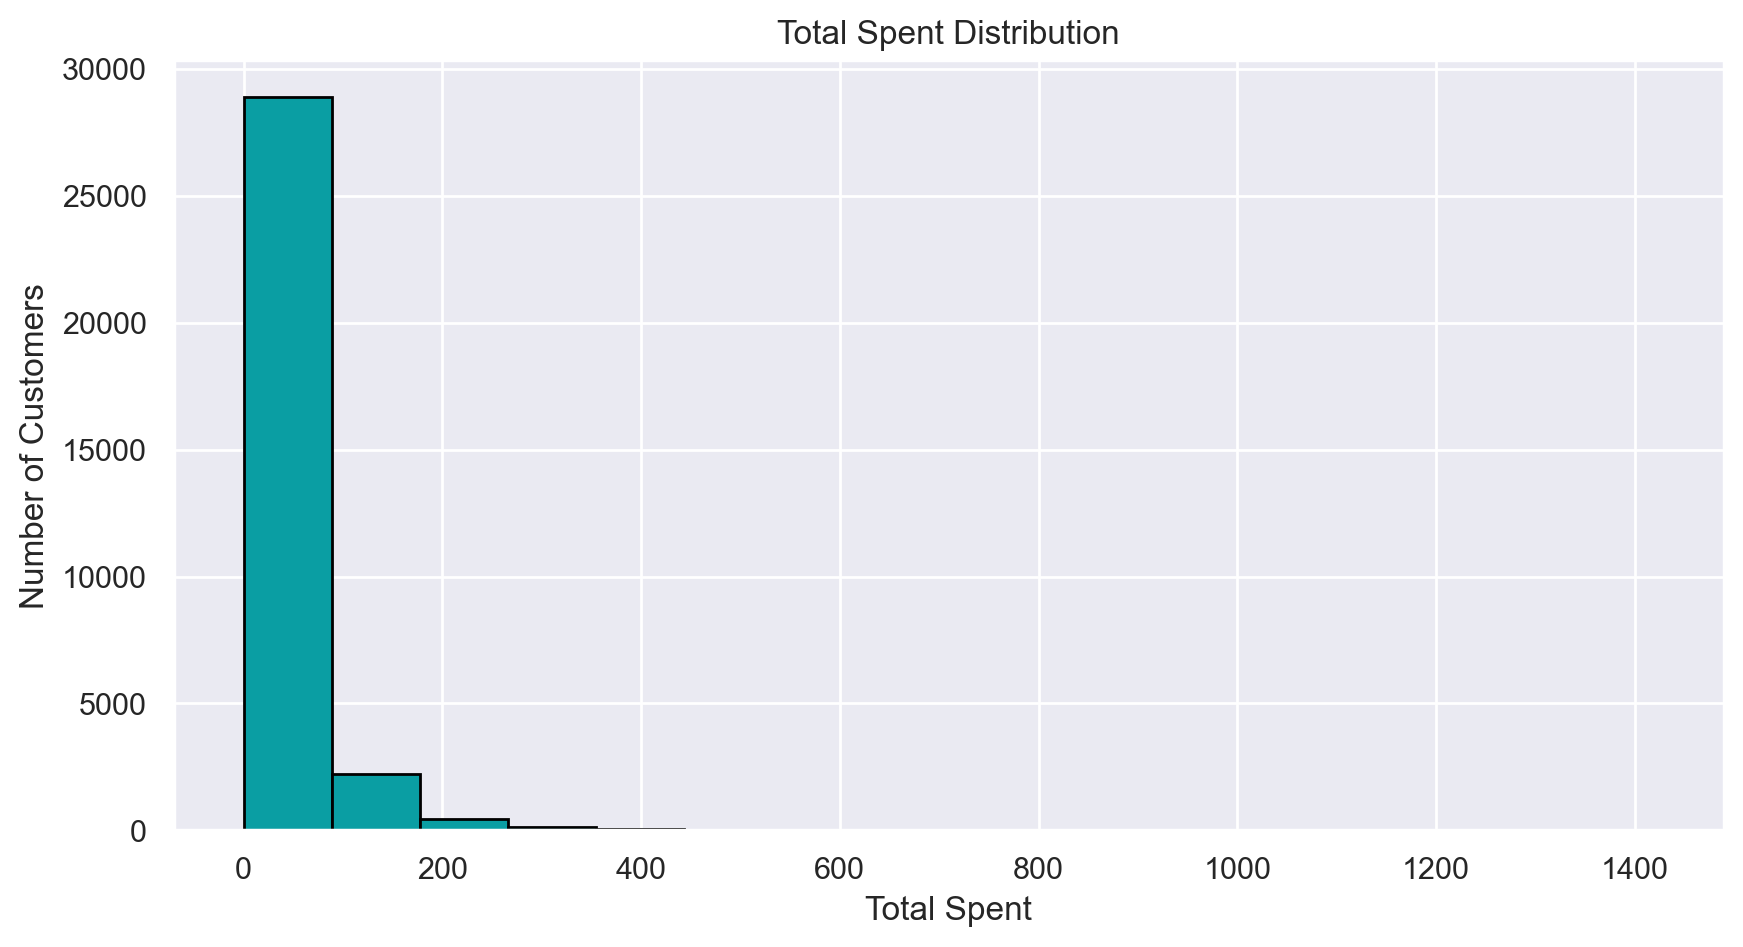

In [278]:
plt.figure(figsize=(10, 5))
plt.hist(food_df['total_spent'], bins=number_bins_sturges(food_df['total_spent']), color=colors["BL"], edgecolor='black')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.show()

> - We can observe a very significant right skewed distribution, which indicates that a lot of customers spend a significantly low amount on their orders.

## 4.2 **Data Statistics** <a id="Data-Statistics" class="anchor"></a>
[Back to ToC](#toc)<br>

In this section we are going to analyse the statistics regarding our features, this will help understand better our variables and their possible implications.

### 4.2.1 **Numerical Variables** <a id="Numerical-Variables" class="anchor"></a>

In [279]:
num_food_df=food_df.select_dtypes(exclude='object') # Defining the numerical variables

In [280]:
num_food_df.describe().round() #Getting an overral statistics of our dataset columns

customer_age  vendor_count  product_count  is_chain  first_order  \
count       31737.0       31737.0        31737.0   31737.0      31737.0   
mean           27.0           3.0            6.0       3.0         28.0   
std             7.0           3.0            7.0       4.0         24.0   
min            15.0           1.0            1.0       0.0          0.0   
25%            23.0           1.0            2.0       1.0          7.0   
50%            26.0           2.0            3.0       2.0         22.0   
75%            31.0           4.0            7.0       3.0         44.0   
max            80.0          41.0          269.0      83.0         90.0   

       last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
count     31737.0       31737.0    31737.0        31737.0   31737.0   
mean         64.0           5.0       10.0            2.0       1.0   
std          23.0          12.0       24.0            8.0       6.0   
min           0.0           0.0        0.0            0.0       0.0   
25%          49.0           0.0        0.0            0.0       0.0   
50%          70.0           0.0        0.0            0.0       0.0   
75%          83.0           6.0       12.0            0.0       0.0   
max          90.0         280.0      897.0          229.0     326.0   

       CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  \
count             31737.0      31737.0       31737.0      31737.0     31737.0   
mean                  1.0          1.0           1.0          1.0         2.0   
std                   4.0          8.0           5.0          6.0         7.0   
min                   0.0          0.0           0.0          0.0         0.0   
25%                   0.0          0.0           0.0          0.0         0.0   
50%                   0.0          0.0           0.0          0.0         0.0   
75%                   0.0          0.0           0.0          0.0         0.0   
max                 220.0        740.0         230.0        256.0       309.0   

       CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  \
count      31737.0       31737.0            31737.0    31737.0   
mean           3.0           3.0                1.0        3.0   
std           11.0          10.0                5.0       10.0   
min            0.0           0.0                0.0        0.0   
25%            0.0           0.0                0.0        0.0   
50%            0.0           0.0                0.0        0.0   
75%            0.0           0.0                0.0        0.0   
max          468.0         706.0              275.0      366.0   

       CUI_Street Food / Snacks  CUI_Thai    DOW_0    DOW_1    DOW_2    DOW_3  \
count                   31737.0   31737.0  31737.0  31737.0  31737.0  31737.0   
mean                        4.0       1.0      1.0      1.0      1.0      1.0   
std                        16.0       4.0      1.0      1.0      1.0      1.0   
min                         0.0       0.0      0.0      0.0      0.0      0.0   
25%                         0.0       0.0      0.0      0.0      0.0      0.0   
50%                         0.0       0.0      0.0      0.0      0.0      0.0   
75%                         0.0       0.0      1.0      1.0      1.0      1.0   
max                       454.0     136.0     16.0     17.0     15.0     17.0   

         DOW_4    DOW_5    DOW_6     HR_0     HR_1     HR_2     HR_3     HR_4  \
count  31737.0  31737.0  31737.0  31737.0  31737.0  31737.0  31737.0  31737.0   
mean       1.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0   
std        1.0      1.0      1.0      2.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        1.0      1.0      1.0      0.0      0.0      0.0      0.0 

* `customer_age`: The standard deviation of 7 indicates that the ages are around the mean, with most ages likely within 21 to 35 (within one standard deviation of the mean). However, the maximum age of 80 shows there's a significant age outlier or a small group of much older customers.
* `vendor and product count`: The mean (3 and 6) and the variation (3 and 7) values are relatively low, but there are some extreme max values (41 and 269) values which represent extreme outliers whose behavior should be studied.
* `first_order`: Usually happened within the first month.
* `last_order`: Usually happened at the end of the second month.
* `is_chain`: The mean of purchases from chain restaurants is about 50% of all orders.
* `CUI_`: as we can see, the Cuisines columns have outliers. For example, for the CUI_Asian, the mean is 10 and the std is 24 and the max value is 897.  Since all values below the 75th percentile are zero, this means that at least 75% of the data is clustered at zero. The remaining 25% includes all non-zero values, likely including the extreme outliers.
* `total_orders`: 75% of customers made 5 orders. The max value of 94 orders indicates the possibility of a group of outliers that order out a lot.
* `total_spent`: The average amount spent per customer is 38 price units. 75% of customers spend 45€ or less.

In [281]:
total_orders_recorded = food_df['total_orders'].sum()
print(f"The dataset has recorded \033[1;35m{total_orders_recorded}\033[0m total orders.")

The dataset has recorded 139263 total orders.


<code>Days of the Week</code>

In [282]:
dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
orders_per_day = food_df[dow_columns].sum()
print("Total Orders per Day of the Week:")
print(orders_per_day)

Total Orders per Day of the Week:
DOW_0    17720
DOW_1    18091
DOW_2    18836
DOW_3    19743
DOW_4    21607
DOW_5    20813
DOW_6    22453
dtype: int64


> - Monday is the day with the least amount of orders (17720) and Sunday with the most (22453).

<code>Hours of the Day</code>

In [283]:
hr_columns = [f'HR_{i}' for i in range(24)]  
orders_per_hour = food_df[hr_columns].sum()
print("Total Orders per Hour of the Day:")
print(orders_per_hour)

Total Orders per Hour of the Day:
HR_0      8506
HR_1      1716
HR_2      2013
HR_3      3771
HR_4      3242
HR_5      2611
HR_6      2219
HR_7      2444
HR_8      4203
HR_9      7457
HR_10    10508
HR_11    12057
HR_12    10017
HR_13     7536
HR_14     6875
HR_15     8833
HR_16    11366
HR_17    12465
HR_18    10745
HR_19     7831
HR_20     4554
HR_21     2269
HR_22     1539
HR_23     1440
dtype: int64


> - HRs_10,11,12 and HRs_16,17,18 are the ones where most orders are placed.

### 4.2.2 **Categorical Variables** <a id="Categorical-Variables" class="anchor"></a>
[Top of Section](#Data-Statistics)<br>

In [284]:
cat_food_df=food_df.select_dtypes(include='object') #Assigning the categorical features into a varibale called cat_food_df

In [285]:
food_df['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

In [286]:
cat_food_df.describe() #Getting the statistics of the categorical variables

customer_region last_promo payment_method
count            31737      31737          31737
unique               4          4              3
top               2000    NOPROMO           CARD
freq             10757      16693          20099

* `customer_region`: Previously, we had customers from 8 different regions ('NoRegion' excluded), where the most popular was <i>'8670'</i>. Now, we have 4 ('NoRegion' included), where the most popular is <i>'2000'</i> and represents ~34% of the data.
* `last_promo`: There are 4 different types of promotions, including <i>'NOPROMO'</i> which we imputed earlier, and this is the most popular, describing over 50% of the records.
* `payment_method`: There are 3 types of payment options ('DIGI', 'CASH', 'CARD'), and <i>'CARD'</i> is the most popular.

__**Exploring Geographic Segmentation**__

In [287]:
food_df['customer_region'].unique()

array(['2000', '8000', '4000', 'NoRegion'], dtype=object)

    Region: 2000

In [288]:
food_df[food_df['customer_region'] == "2000"].describe().round(2)

customer_age  vendor_count  product_count  is_chain  first_order  \
count       10757.0      10757.00       10757.00  10757.00      10757.0   
mean          27.47          3.69           6.58      4.38        24.94   
std            7.11          3.40           8.53      5.29        22.74   
min            15.0          1.00           1.00      0.00          0.0   
25%            23.0          2.00           2.00      1.00          6.0   
50%            26.0          3.00           4.00      3.00         18.0   
75%            30.0          5.00           8.00      5.00         38.0   
max            79.0         41.00         269.00     83.00         90.0   

       last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
count    10757.00      10757.00   10757.00       10757.00  10757.00   
mean        63.21          2.01       1.91           2.20      0.26   
std         22.97          5.13       6.30           7.03      2.38   
min          0.00          0.00       0.00           0.00      0.00   
25%         48.00          0.00       0.00           0.00      0.00   
50%         69.00          0.00       0.00           0.00      0.00   
75%         83.00          2.07       0.00           1.31      0.00   
max         90.00        174.41     196.00         229.22    111.42   

       CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  \
count            10757.00     10757.00      10757.00     10757.00    10757.00   
mean                 2.05         2.59          0.42         0.44        1.82   
std                  5.13        12.09          2.28         3.14        7.66   
min                  0.00         0.00          0.00         0.00        0.00   
25%                  0.00         0.00          0.00         0.00        0.00   
50%                  0.00         0.00          0.00         0.00        0.00   
75%                  1.87         0.00          0.00         0.00        0.00   
max                126.89       739.73         50.41       209.81      309.07   

       CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  \
count     10757.00      10757.00           10757.00   10757.00   
mean          0.73          1.66               2.11       4.02   
std           2.95          5.72               7.62       8.98   
min           0.00          0.00               0.00       0.00   
25%           0.00          0.00               0.00       0.00   
50%           0.00          0.00               0.00       0.00   
75%           0.00          0.00               0.00       5.10   
max         143.64        211.78             275.11     202.54   

       CUI_Street Food / Snacks  CUI_Thai     DOW_0     DOW_1    DOW_2  \
count                  10757.00  10757.00  10757.00  10757.00  10757.0   
mean                       0.37      0.72      0.66      0.68      0.7   
std                        2.22      3.29      1.18      1.21      1.2   
min                        0.00      0.00      0.00      0.00      0.0   
25%                        0.00      0.00      0.00      0.00      0.0   
50%                        0.00      0.00      0.00      0.00      0.0   
75%                        0.00      0.00      1.00      1.00      1.0   
max                       96.80    109.64     16.00     17.00     15.0   

          DOW_3     DOW_4     DOW_5     DOW_6      HR_0      HR_1      HR_2  \
count  10757.00  10757.00  10757.00  10757.00  10757.00  10757.00  10757.00   
mean       0.72      0.77      0.77      0.85      0.33      0.04      0.02   
std        1.20      1.21      1.26      1.36      2.37      0.25      0.22   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        1.00      1.00      1.00      1.00      0.00      0.00      0.00   
max       17.00     16.00     20.00     20.00     80.00      7.00  

> - A customer in region `2000` usually orders 5.13 times.
> - The most someone from this region ordered were 94 times.
> - People from here spend, on average, the most on CUI_Other, at the value of 4.02€.
> - Asian Cuisine is the most popular.
> - On average, people from here ordered from all the types of cuisines, which means that they have a lot of options or like more diversity.
> - There are no significant differences between weekdays and weekend orders.
> - People from here usually order more either in the midday or in the evening.
> - The average age for this region is 27 years.

    Region: 4000

In [289]:
food_df[food_df['customer_region'] == "4000"].describe().round(2)

customer_age  vendor_count  product_count  is_chain  first_order  \
count       10407.0      10407.00       10407.00  10407.00      10407.0   
mean          27.52          2.74           5.60      2.25        29.16   
std            7.08          2.27           6.76      3.33         24.6   
min            15.0          1.00           1.00      0.00          0.0   
25%            23.0          1.00           2.00      0.00          7.0   
50%            26.0          2.00           3.00      1.00         22.0   
75%            31.0          3.00           6.50      3.00         47.0   
max            80.0         29.00         117.00     48.00         89.0   

       last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
count    10407.00      10407.00   10407.00        10407.0  10407.00   
mean        65.43          7.14       5.23            0.0      2.18   
std         22.89         14.72      15.98            0.0     10.86   
min          0.00          0.00       0.00            0.0      0.00   
25%         53.00          0.00       0.00            0.0      0.00   
50%         74.00          0.00       0.00            0.0      0.00   
75%         84.00          9.40       4.58            0.0      0.00   
max         89.00        280.21     896.71            0.0    326.10   

       CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  \
count            10407.00     10407.00      10407.00     10407.00    10407.00   
mean                 0.23         0.53          0.00         1.33        3.12   
std                  3.35         4.71          0.11         7.21       10.20   
min                  0.00         0.00          0.00         0.00        0.00   
25%                  0.00         0.00          0.00         0.00        0.00   
50%                  0.00         0.00          0.00         0.00        0.00   
75%                  0.00         0.00          0.00         0.00        0.00   
max                219.66       195.30          8.78       255.81      162.38   

       CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  \
count     10407.00      10407.00            10407.0   10407.00   
mean          9.15          3.86                0.0       4.93   
std          18.07         13.23                0.0      13.84   
min           0.00          0.00                0.0       0.00   
25%           0.00          0.00                0.0       0.00   
50%           0.00          0.00                0.0       0.00   
75%          12.52          0.00                0.0       0.00   
max         468.33        706.14                0.0     366.08   

       CUI_Street Food / Snacks  CUI_Thai     DOW_0     DOW_1     DOW_2  \
count                  10407.00  10407.00  10407.00  10407.00  10407.00   
mean                       0.59      1.83      0.52      0.54      0.59   
std                        4.06      6.88      1.00      1.04      1.06   
min                        0.00      0.00      0.00      0.00      0.00   
25%                        0.00      0.00      0.00      0.00      0.00   
50%                        0.00      0.00      0.00      0.00      0.00   
75%                        0.00      0.00      1.00      1.00      1.00   
max                      112.59    136.38     11.00     13.00     14.00   

          DOW_3     DOW_4     DOW_5     DOW_6      HR_0      HR_1      HR_2  \
count  10407.00  10407.00  10407.00  10407.00  10407.00  10407.00  10407.00   
mean       0.65      0.78      0.68      0.73      0.08      0.01      0.00   
std        1.12      1.17      1.06      1.19      1.13      0.10      0.07   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        1.00      1.00      1.00      1.00      0.00      0.00      0.00   
max       17.00     14.00     13.00     17.00     59.00   

> - A customer in region `4000` usually orders 4.49 times.
> - The most someone from this region wordered were 90 times.
> - People from here spend, on average, the most on CUI_Italian, at the value of 9.15€.
> - Western/Asian Cuisine are the most popular.
> - People didn't spend anything on: Beverages, Desserts, Noodle Dishes.
> - There are no significant differences between weekdays and weekend orders.
> - People from here usually order more either in the midday or in the evening.
> - The average age for this region is 27 years.

    Region: 8000

In [290]:
food_df[food_df['customer_region'] == "8000"].describe().round(2)

customer_age  vendor_count  product_count  is_chain  first_order  \
count       10131.0      10131.00       10131.00  10131.00      10131.0   
mean          27.52          2.91           4.89      1.82        30.88   
std            7.06          2.39           5.02      2.10        24.48   
min            15.0          1.00           1.00      0.00          0.0   
25%            23.0          1.00           2.00      1.00          9.0   
50%            26.0          2.00           3.00      1.00         26.0   
75%            31.0          4.00           6.00      2.00         49.0   
max            80.0         30.00          64.00     32.00         89.0   

       last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
count    10131.00      10131.00   10131.00       10131.00   10131.0   
mean        62.76          5.63      22.98           4.69       0.0   
std         23.51         12.39      33.70          12.51       0.0   
min          0.00          0.00       0.00           0.00       0.0   
25%         49.00          0.00       0.00           0.00       0.0   
50%         70.00          0.00      12.60           0.00       0.0   
75%         82.00          6.16      30.75           0.00       0.0   
max         89.00        231.75     537.49         192.43       0.0   

       CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  \
count             10131.0     10131.00      10131.00     10131.00     10131.0   
mean                  0.0         1.17          2.24         1.12         0.0   
std                   0.0         5.48          8.73         6.40         0.0   
min                   0.0         0.00          0.00         0.00         0.0   
25%                   0.0         0.00          0.00         0.00         0.0   
50%                   0.0         0.00          0.00         0.00         0.0   
75%                   0.0         0.00          0.00         0.00         0.0   
max                   0.0       106.82        230.07       238.02         0.0   

       CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  \
count      10131.0      10131.00            10131.0   10131.00   
mean           0.0          3.54                0.0       0.10   
std            0.0         10.24                0.0       2.03   
min            0.0          0.00                0.0       0.00   
25%            0.0          0.00                0.0       0.00   
50%            0.0          0.00                0.0       0.00   
75%            0.0          0.00                0.0       0.00   
max            0.0        205.21                0.0     111.52   

       CUI_Street Food / Snacks  CUI_Thai     DOW_0     DOW_1     DOW_2  \
count                  10131.00   10131.0  10131.00  10131.00  10131.00   
mean                      10.85       0.0      0.49      0.49      0.50   
std                       25.32       0.0      0.83      0.84      0.84   
min                        0.00       0.0      0.00      0.00      0.00   
25%                        0.00       0.0      0.00      0.00      0.00   
50%                        0.00       0.0      0.00      0.00      0.00   
75%                       12.02       0.0      1.00      1.00      1.00   
max                      454.45       0.0      9.00     11.00      8.00   

          DOW_3     DOW_4     DOW_5     DOW_6      HR_0      HR_1      HR_2  \
count  10131.00  10131.00  10131.00  10131.00  10131.00  10131.00  10131.00   
mean       0.50      0.50      0.53      0.55      0.39      0.12      0.16   
std        0.85      0.82      0.84      0.90      2.12      0.47      0.55   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        1.00      1.00      1.00      1.00      0.00      0.00      0.00   
max       10.00      9.00     10.00     14.00     52.00   

> - A customer in region `8000` usually orders 3.55	times.
> - The most someone from this region ordered were 52 times.
> - People from here spend, on average, the most on CUI_Asian, at the value of 22.98€.
> - Asian Cuisine is the most popular.
> - People didn't spend anything on: Cafe, Chicken Dishes, Indian, Italian, Noodle Dishes, Thai.
> - There are no significant differences between weekdays and weekend orders.
> - People from here usually order more in the late night, followed by midday orders.
> - The average age for this region is 27 years.

    Region: NoRegion

In [291]:
food_df[food_df['customer_region'] == "NoRegion"].describe().round(2)

customer_age  vendor_count  product_count  is_chain  first_order  \
count         442.0        442.00         442.00    442.00        442.0   
mean           27.1          2.82           4.65      1.86        30.93   
std            6.66          2.48           4.63      2.17        25.45   
min            17.0          1.00           1.00      0.00          0.0   
25%            22.0          1.00           2.00      1.00          8.0   
50%            26.0          2.00           3.00      1.00         26.0   
75%            30.0          4.00           6.00      2.00         50.0   
max            55.0         23.00          35.00     17.00         89.0   

       last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
count      442.00        442.00     442.00         442.00     442.0   
mean        60.29          5.87      21.62           4.84       0.0   
std         25.01         13.61      29.73          11.41       0.0   
min          0.00          0.00       0.00           0.00       0.0   
25%         43.25          0.00       0.00           0.00       0.0   
50%         68.00          0.00      12.20           0.00       0.0   
75%         81.00          5.98      31.06           2.90       0.0   
max         89.00        106.27     286.72          81.07       0.0   

       CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  \
count               442.0       442.00        442.00       442.00       442.0   
mean                  0.0         0.85          2.23         0.88         0.0   
std                   0.0         4.48          7.46         6.30         0.0   
min                   0.0         0.00          0.00         0.00         0.0   
25%                   0.0         0.00          0.00         0.00         0.0   
50%                   0.0         0.00          0.00         0.00         0.0   
75%                   0.0         0.00          0.00         0.00         0.0   
max                   0.0        44.23         64.93        96.21         0.0   

       CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  \
count        442.0        442.00              442.0     442.00   
mean           0.0          3.54                0.0       0.03   
std            0.0          9.42                0.0       0.57   
min            0.0          0.00                0.0       0.00   
25%            0.0          0.00                0.0       0.00   
50%            0.0          0.00                0.0       0.00   
75%            0.0          0.00                0.0       0.00   
max            0.0         79.10                0.0      12.00   

       CUI_Street Food / Snacks  CUI_Thai   DOW_0   DOW_1   DOW_2   DOW_3  \
count                    442.00     442.0  442.00  442.00  442.00  442.00   
mean                      10.42       0.0    0.49    0.45    0.45    0.50   
std                       22.74       0.0    0.80    0.83    0.86    0.82   
min                        0.00       0.0    0.00    0.00    0.00    0.00   
25%                        0.00       0.0    0.00    0.00    0.00    0.00   
50%                        0.00       0.0    0.00    0.00    0.00    0.00   
75%                       11.87       0.0    1.00    1.00    1.00    1.00   
max                      176.18       0.0    5.00    6.00    5.00    5.00   

        DOW_4   DOW_5   DOW_6    HR_0    HR_1    HR_2    HR_3    HR_4    HR_5  \
count  442.00  442.00  442.00  442.00  442.00  442.00  442.00  442.00  442.00   
mean     0.46    0.51    0.53    0.54    0.12    0.16    0.33    0.27    0.22   
std      0.78    0.83    0.84    2.39    0.43    0.61    0.75    0.62    0.53   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
25%      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
50%      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
75%      1.00    1.00    1.00    0.00    0.00    0.00    0.00    0.00    0.00   
max      5.00    5.00   

> - A customer in region `NoRegion` (meaning region was not specified) usually orders 3.39 times.
> - The most someone ordered were 27 times.
> - People spend, on average, the most on CUI_Asian, at the value of 21.62€. Also spend relatively a lot on Street Food/Snacks at the value of 10.42€.
> - Asian Cuisine is the most popular.
> - People didn't spend anything on: Cafe, Chicken Dishes, Indian, Italian, Noodle Dishes, Thai.
> - There are no significant differences between weekdays and weekend orders.
> - People from here usually order more in the late night, followed by midday orders.
> - The average age for this region is 27 years.

> There are <b>442 records</b> where a customer is not from any region. <br>
> We also performed an analysis on the initial 8 regions and found the same results.<br>
> By performing this analysis by <code>customer_region</code>, we can see that the behavior from the customers assigned with <i>NoRegion</i> is really similar to the ones from <i>8000</i>. <br>
> We believe we can infer that these customers are probably from region <i>8000</i>, so we will impute these values.

In [292]:
# impute '8000' into 'noregion'
food_df['customer_region'] = food_df['customer_region'].replace('NoRegion', '8000')
print(round(food_df['customer_region'].value_counts(normalize=True) * 100, 2))

customer_region
2000    33.89
8000    33.31
4000    32.79
Name: proportion, dtype: float64


In [293]:
cat_food_df=food_df.select_dtypes(include='object') # updating the correct dataset

__**Crossing Data with Other Categorical Variables**__

In [294]:
# Creating a cross-tabulation to see the percentage of times each combination of customer region and last promo appears in the dataset
pd.crosstab(food_df['customer_region'], food_df['last_promo'], normalize=True) * 100

last_promo       DELIVERY  DISCOUNT   FREEBIE    NOPROMO
customer_region                                         
2000             7.067461  5.315562  4.578253  16.932917
4000             5.441598  4.417557  3.759019  19.173205
8000             7.136780  4.345086  5.340769  16.491792

> - The most popular type of <code>promotion</code> is <i>'NOPROMO'</i> for all regions, followed by <i>'DELIVERY'</i>.
> - <i>'DISCOUNT'</i> and <i>'FREEBIE'</i> have the lowest frequency.

In [295]:
# Creating a cross-tabulation to see the percentage of times each combination of last promo and payment method appears in the dataset
pd.crosstab(cat_food_df['customer_region'], cat_food_df['payment_method'], normalize=True) *100

payment_method        CARD      CASH      DIGI
customer_region                               
2000             20.843180  6.620033  6.430980
4000             22.100388  5.158017  5.532974
8000             20.386300  5.797649  7.130479

> - The most popular type of <code>payment_method</code> is <b><i>'CARD'</i></b> for all regions.
> - <i>'CASH'</i> and <i>'DIGI'</i> values don't have significant differences.

## 5. **Visual Exploration** <a id="Visual-Exploration" class="anchor"></a>
[Back to ToC](#toc)<br>

For this section, we wil perform a visual analysis of our features, starting by the univariate analysis and then proceed to Bivariate analysis for Numerical and Categorical Variables, to get better insights of our dataset.

#### 5.1 **Numerical Variables** <a id="Visual-Numerical-Variables" class="anchor"></a>

##### Univariate Analysis <a id="num-univariate-analysis" class="anchor"></a>
[Top of Section](#Visual-Exploration)<br>

`customer_age`

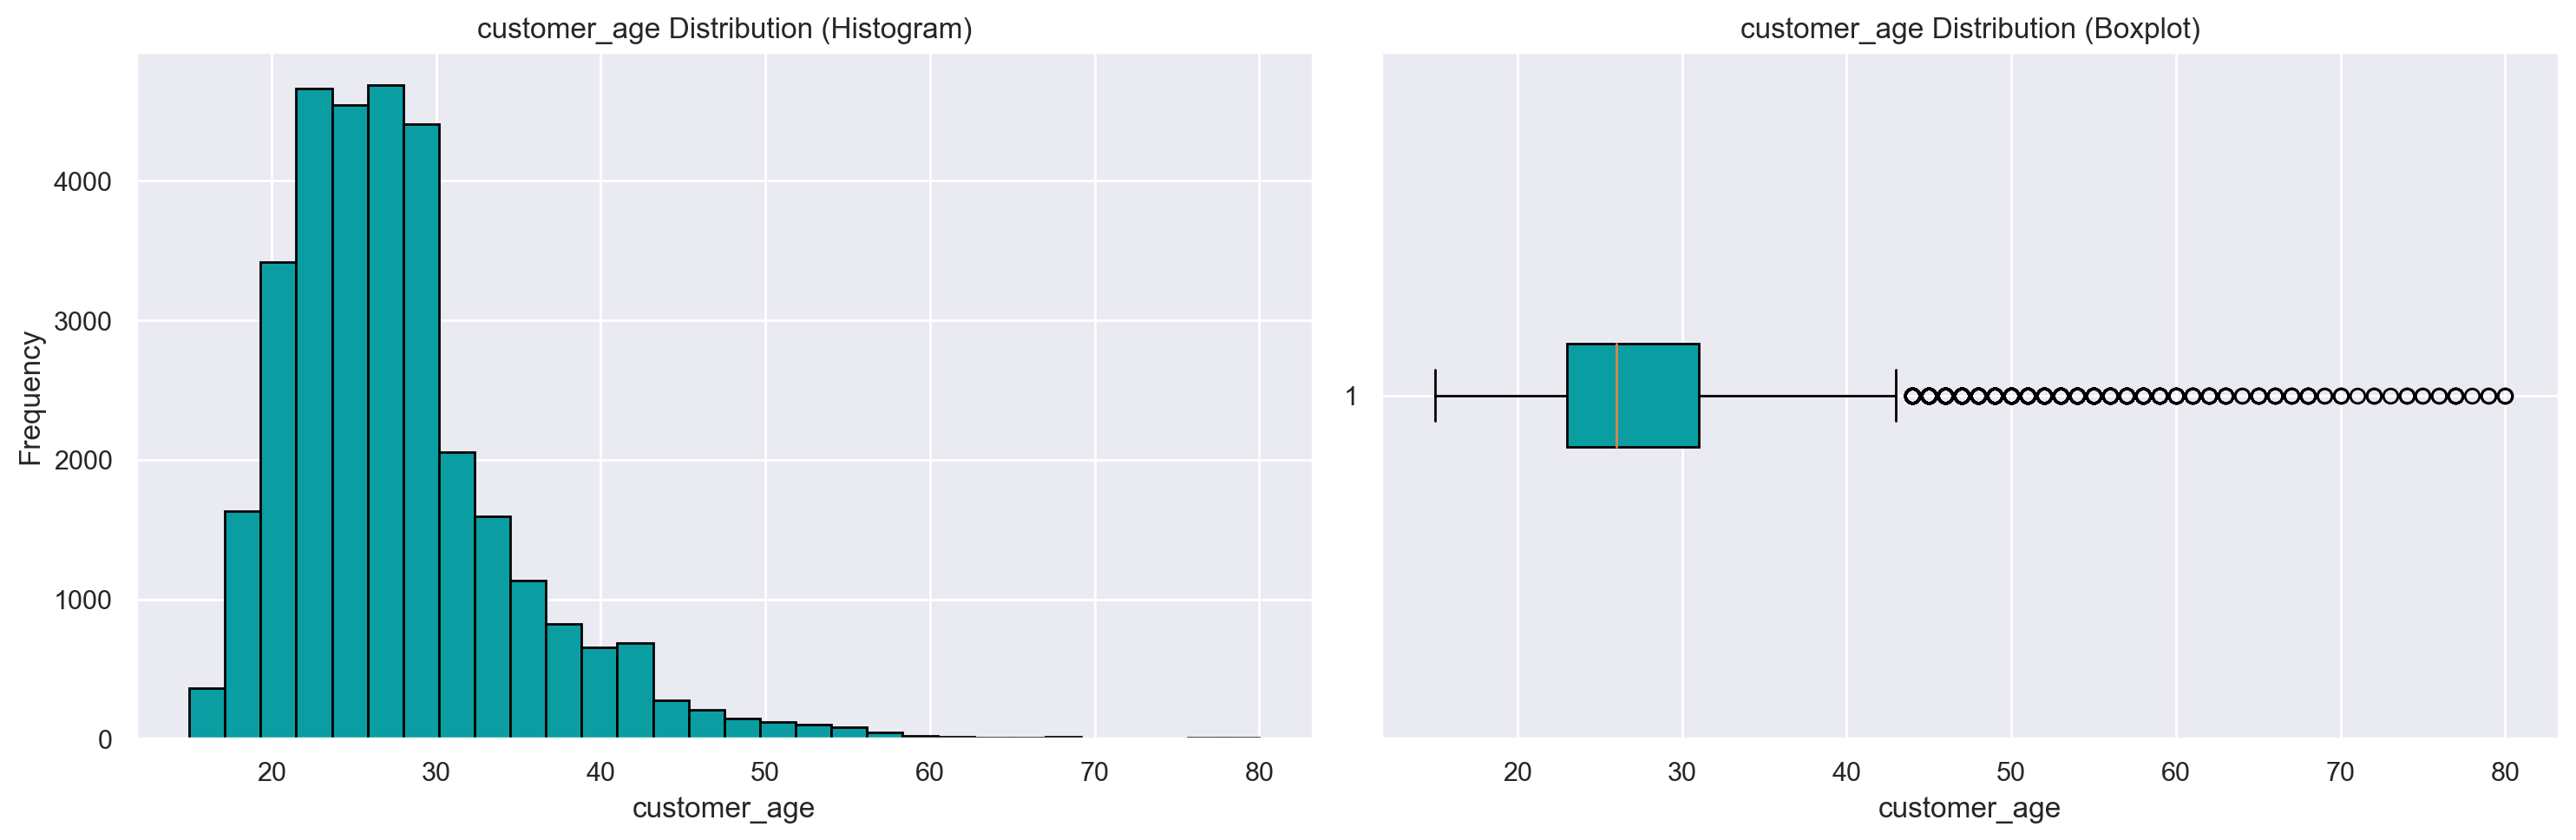

In [296]:
plot_distribution(food_df, 'customer_age', color=colors["BL"])

> - Right skewed distribution: values ranging from 17 until 80.
> - Some outliers identified on the upper limit.

`total_orders`

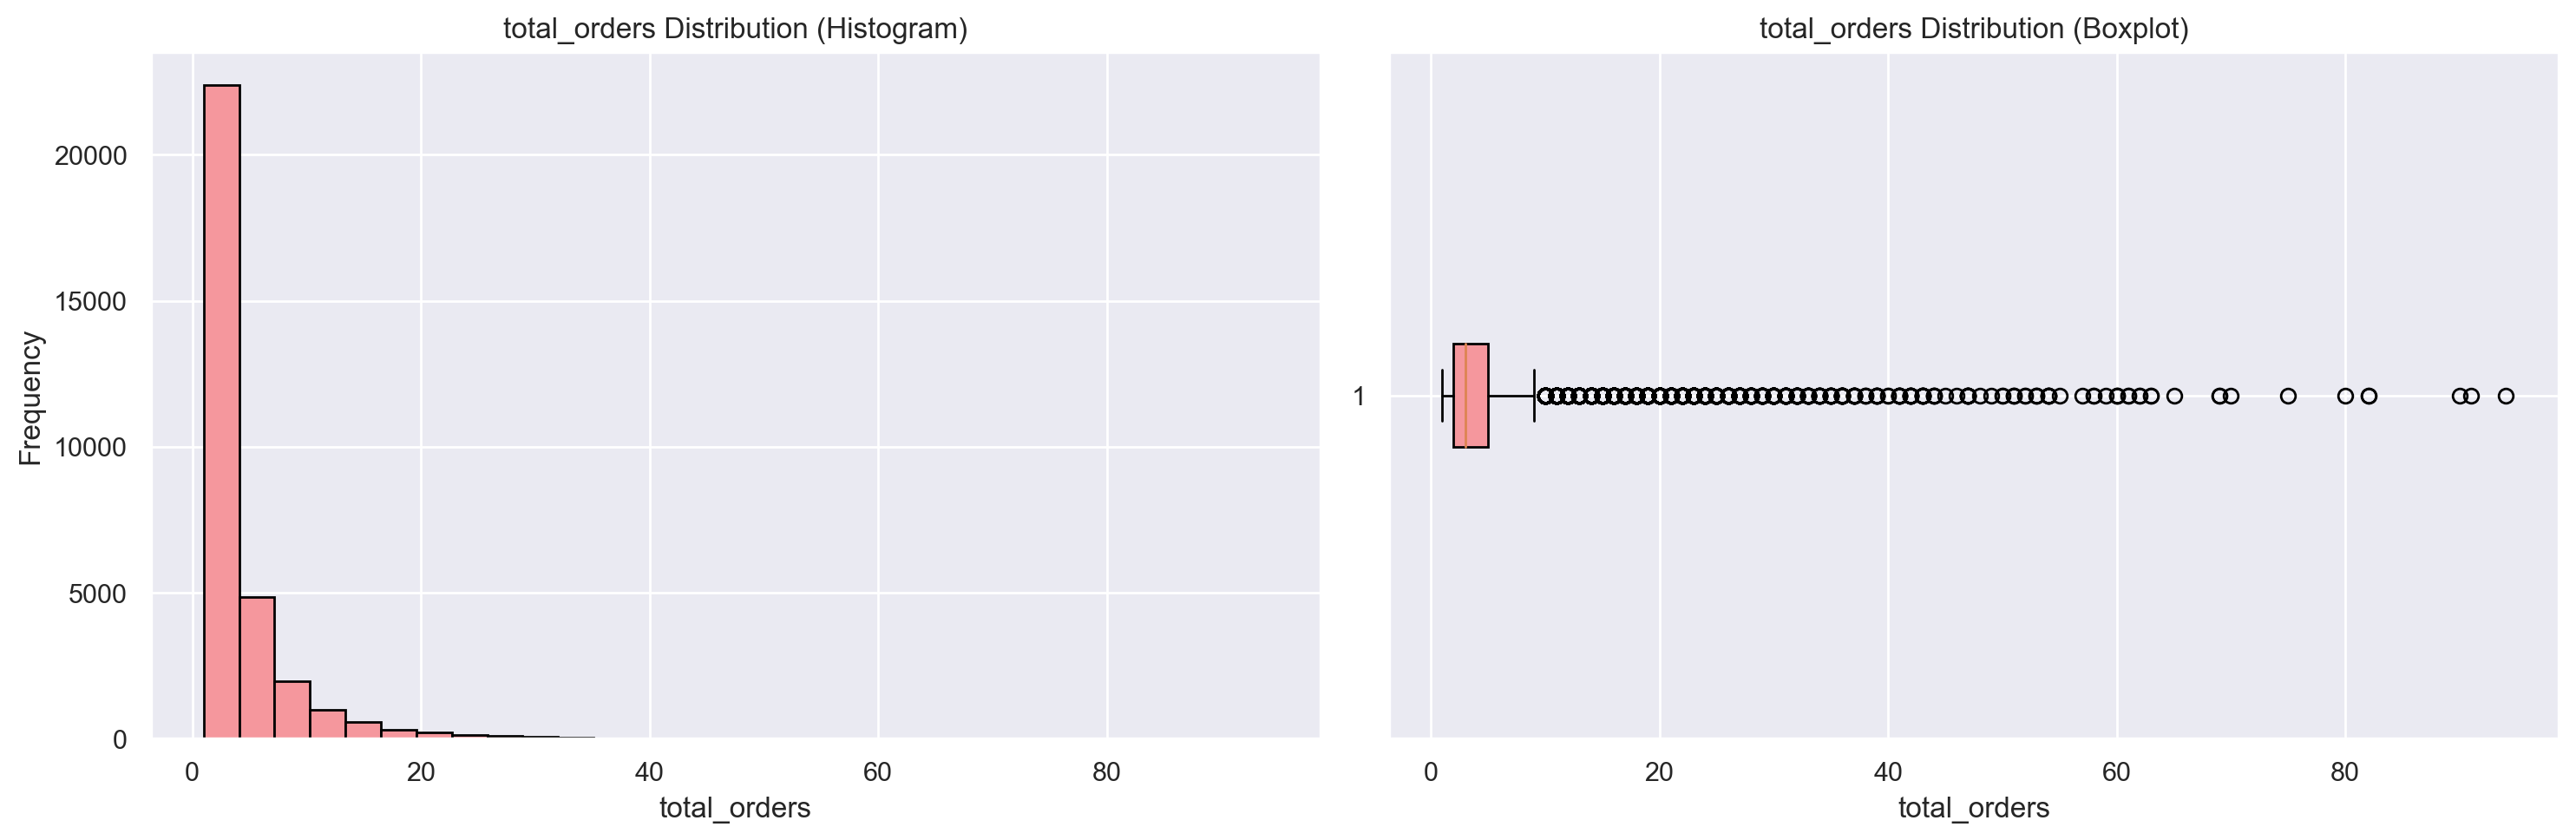

In [297]:
plot_distribution(food_df, 'total_orders', color=colors["R"])

> - Right Skewed Distribution with values ranging from 1 to 94.
> - Possible extreme outliers in upper limit.

`Vendor Count`

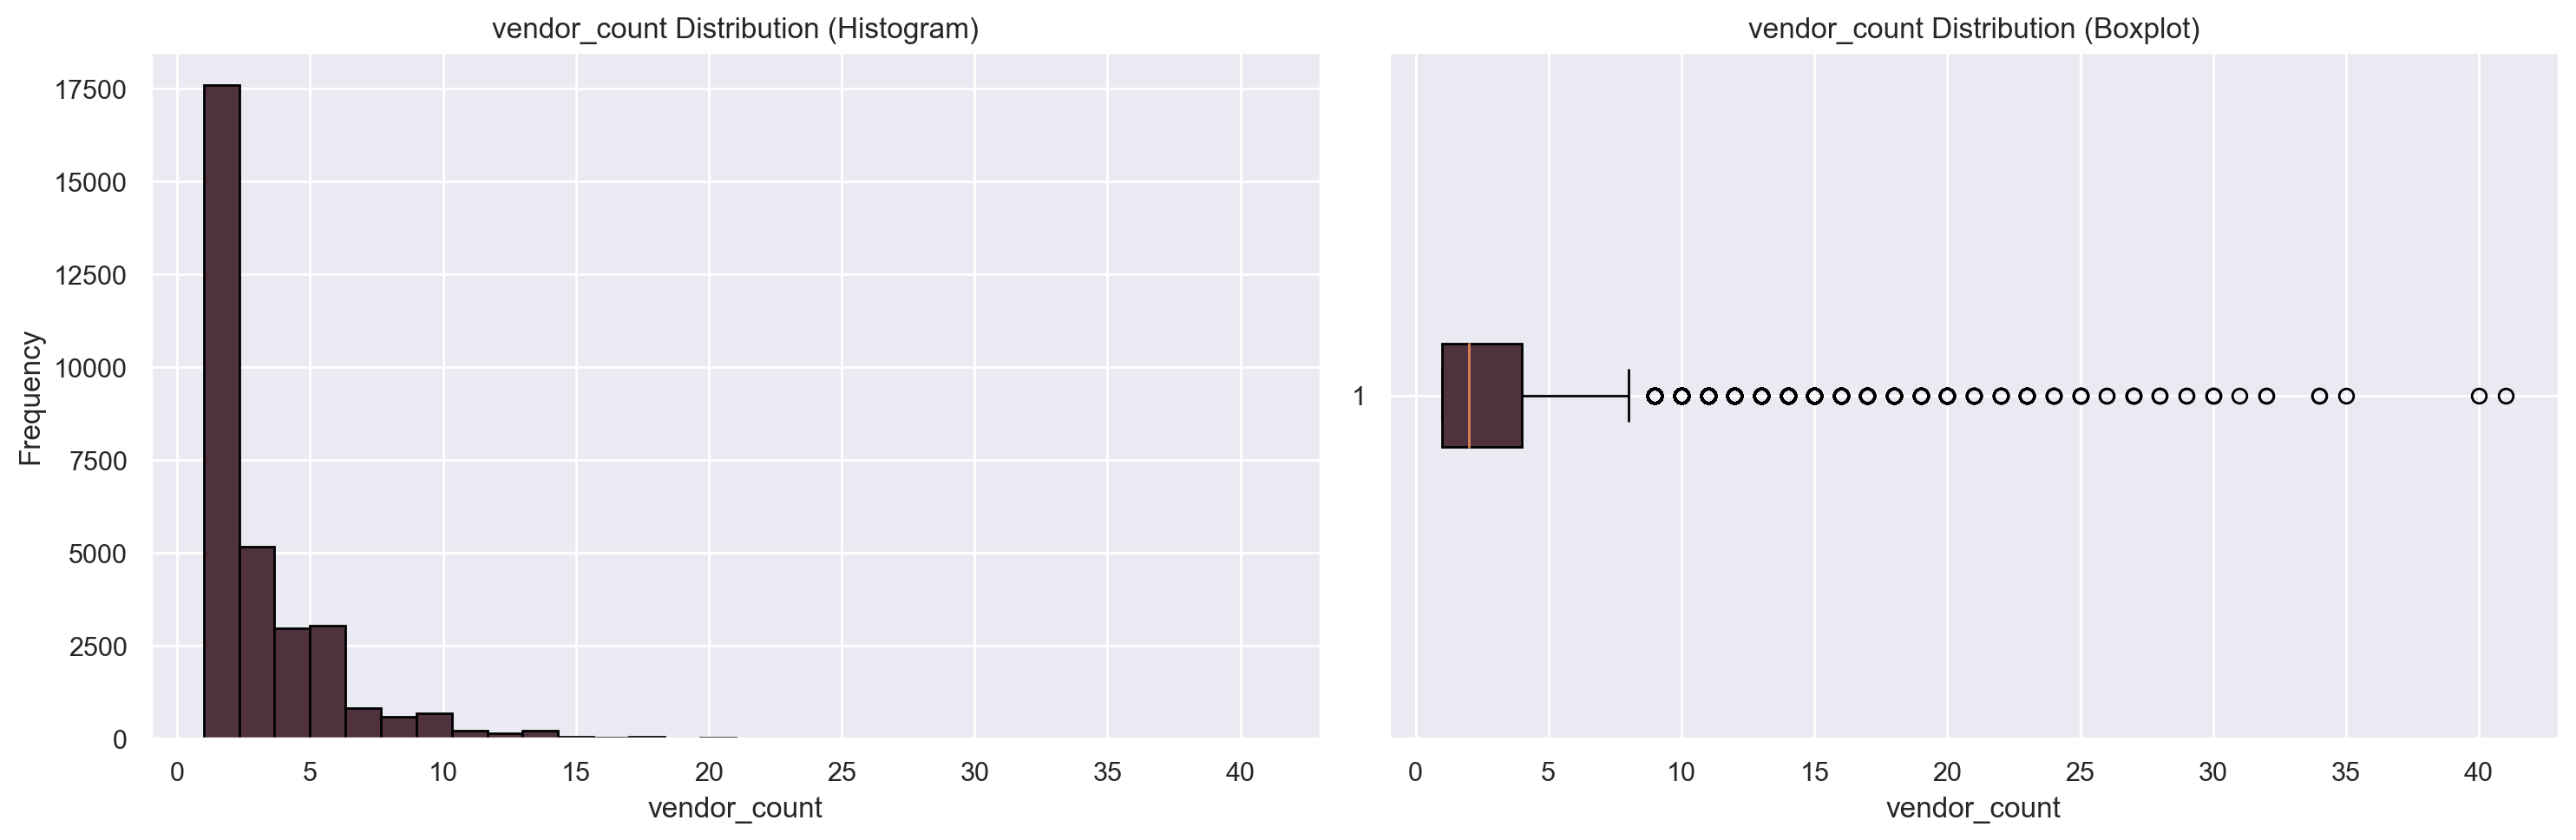

In [298]:
plot_distribution(food_df, 'vendor_count', colors["BR"])

> - Right Skewed Distribution with values ranging from 1 to 41.
> - Possible extreme outliers in upper limit.

`is_chain`

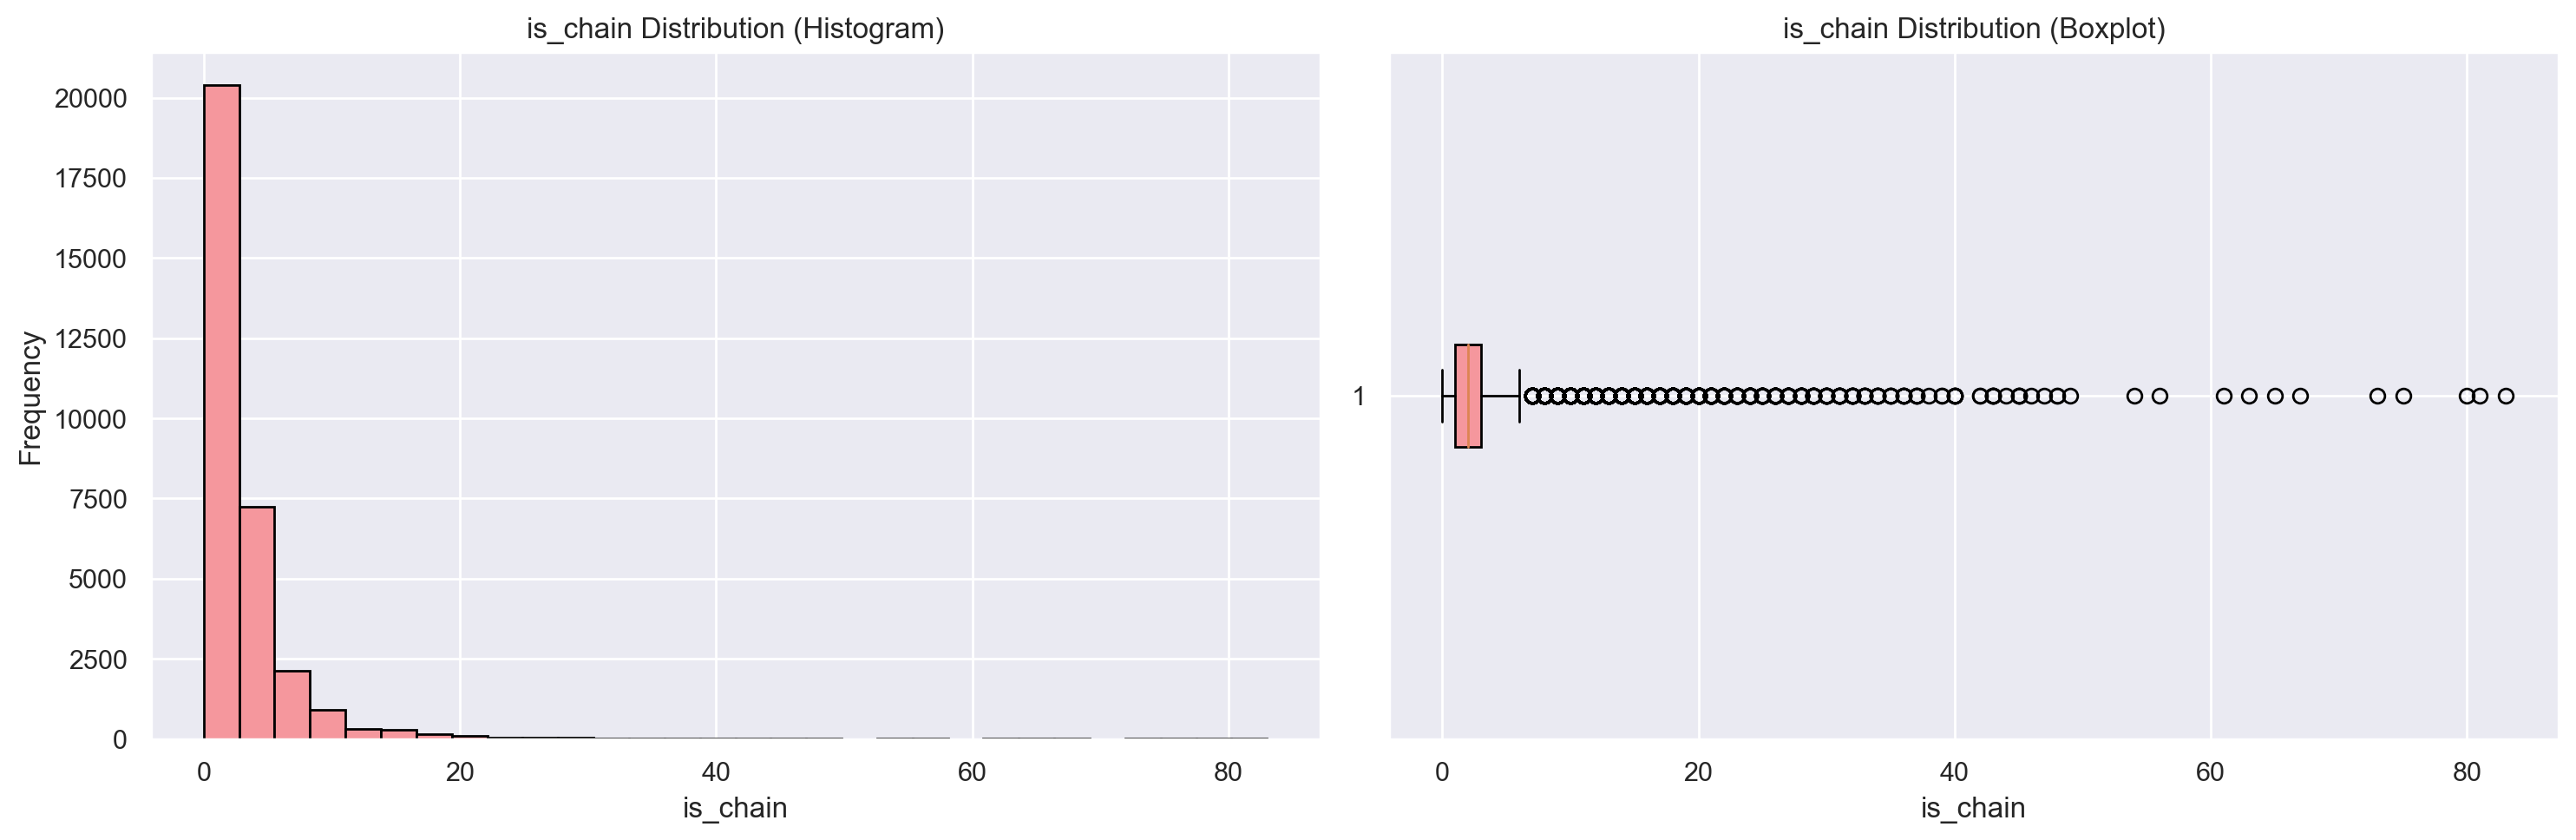

In [299]:
plot_distribution(food_df, 'is_chain', color=colors["R"])

> - Right Skewed Distribution with values ranging from 1 to 83.
> - Possible extreme outliers in upper limit.

`Days of the Week`

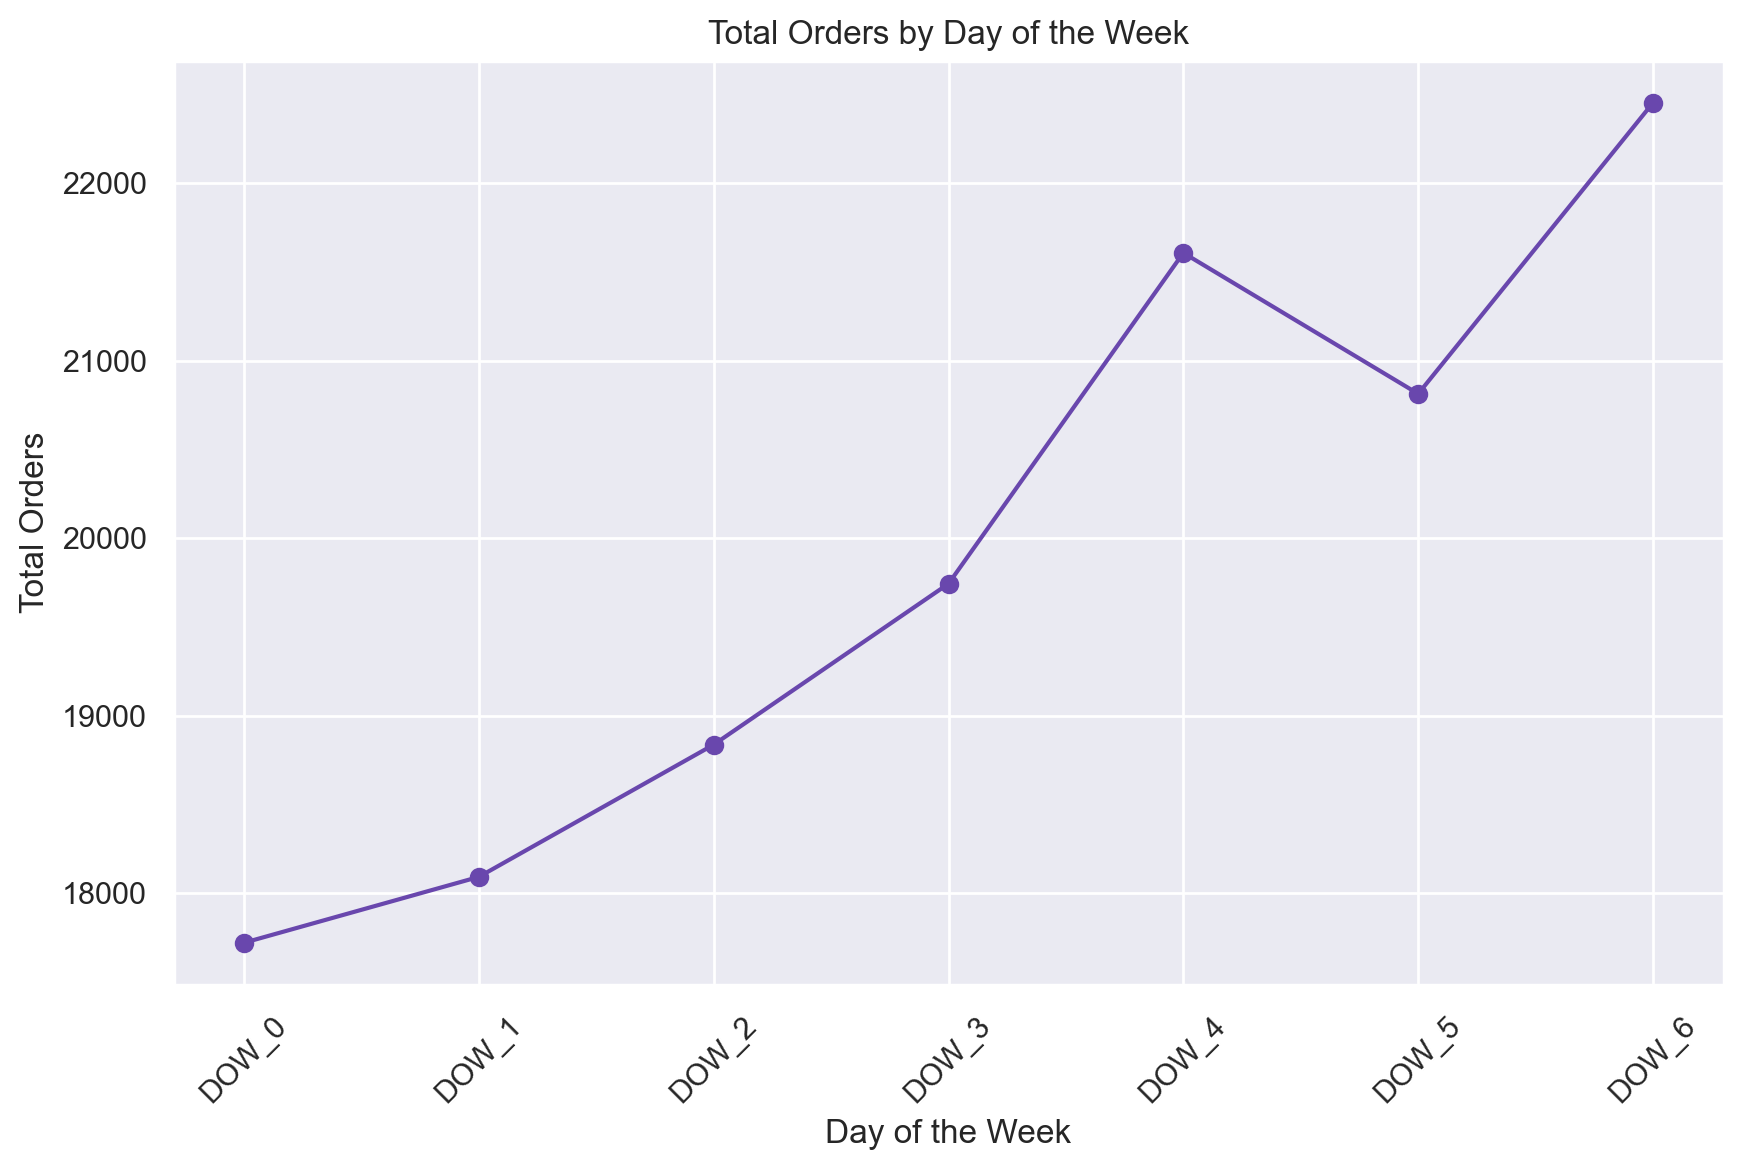

In [300]:
days_of_the_week = [f'DOW_{i}' for i in range(7)]
plt.figure(figsize=(10, 6))
plt.plot(days_of_the_week, food_df[days_of_the_week].sum(), marker='o', color=colors["P"])
plt.title('Total Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

> - Monday (DOW_0): ~18000 orders
> - Sunday (DOW_6): ~ 22000 orders
> - Distribution of orders grows as the week goes by.

`total_spent`

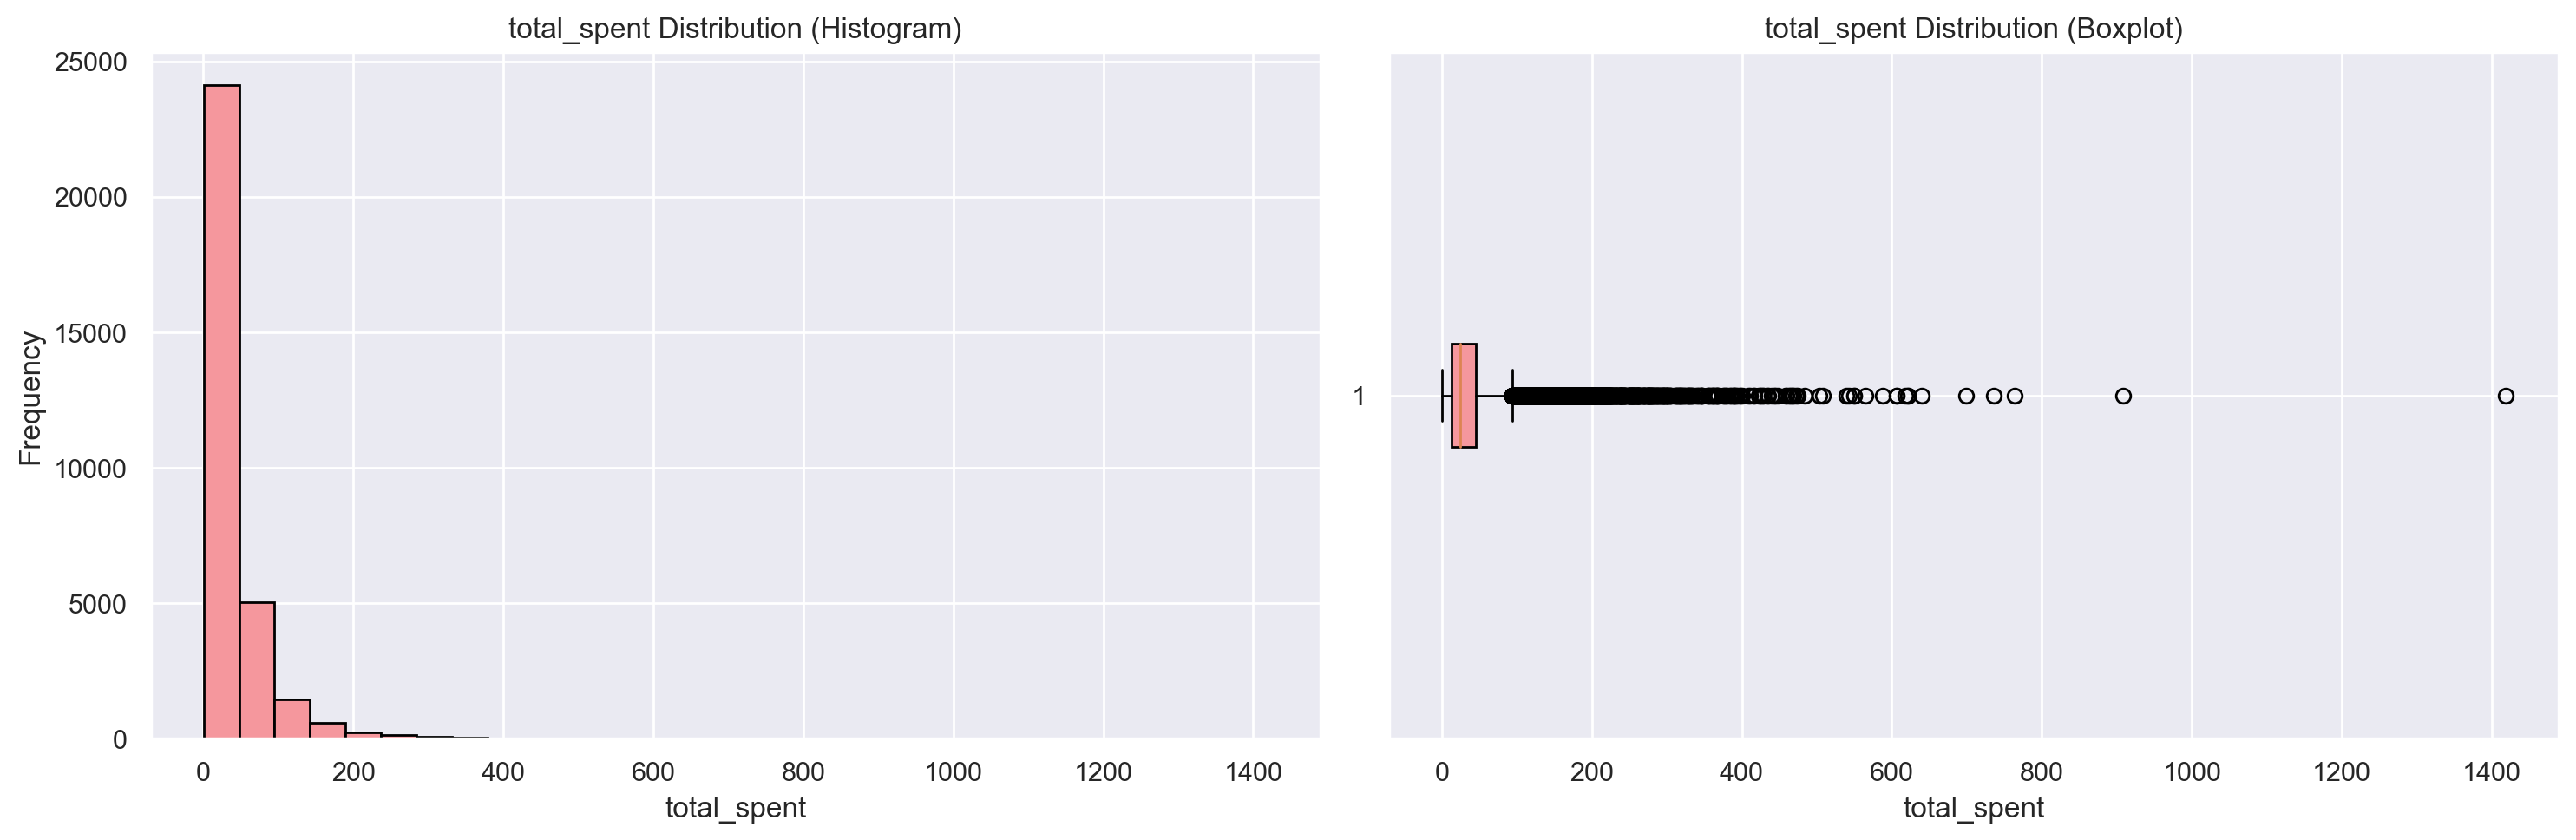

In [301]:
plot_distribution(food_df, 'total_spent', color=colors["R"])

> - Right Skewed Distribution with values ranging from 0.37 to 1418.33.
> - Extreme outliers in upper limit can be identified.

__**Outlier Analysis**__

In [302]:
num_columns_out = ['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'Western_Cuisine', 'Asian_Cuisine', 
       'Desserts_Beverages', 'CUI_Healthy', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'total_orders', 'midday_orders',
       'evening_orders', 'late_night_orders', 'Weekend', 'Weekday',
    ]

outlier_percentages = {}

for column in num_columns_out:
        #Defining Q1 and Q3 to then find IQR 
        Q1 = food_df[column].quantile(0.25)
        Q3 = food_df[column].quantile(0.75)
        IQR = Q3 - Q1
        #Getting the outliers below the first quantile and above the second quantile
        outliers = food_df[(food_df[column] < (Q1 - 1.5 * IQR)) | (food_df[column] > (Q3 + 1.5 * IQR))]
        #Getting the percentage of the outliers
        percentage_outliers = (len(outliers) / len(food_df)) * 100
        outlier_percentages[column] = percentage_outliers
        
print("Percentage of outliers per column using IQR:")
for column, percentage in outlier_percentages.items():
    print(f"{column}: \033[1;35m{percentage:.2f}%\033[0m")

Percentage of outliers per column using IQR:
customer_age: 3.40%
vendor_count: 4.80%
product_count: 7.47%
is_chain: 9.94%
first_order: 0.00%
last_order: 0.00%
Western_Cuisine: 7.85%
Asian_Cuisine: 6.55%
Desserts_Beverages: 22.90%
CUI_Healthy: 6.83%
CUI_OTHER: 22.19%
CUI_Street Food / Snacks: 13.37%
total_orders: 9.54%
midday_orders: 7.51%
evening_orders: 7.70%
late_night_orders: 8.81%
Weekend: 4.88%
Weekday: 7.26%


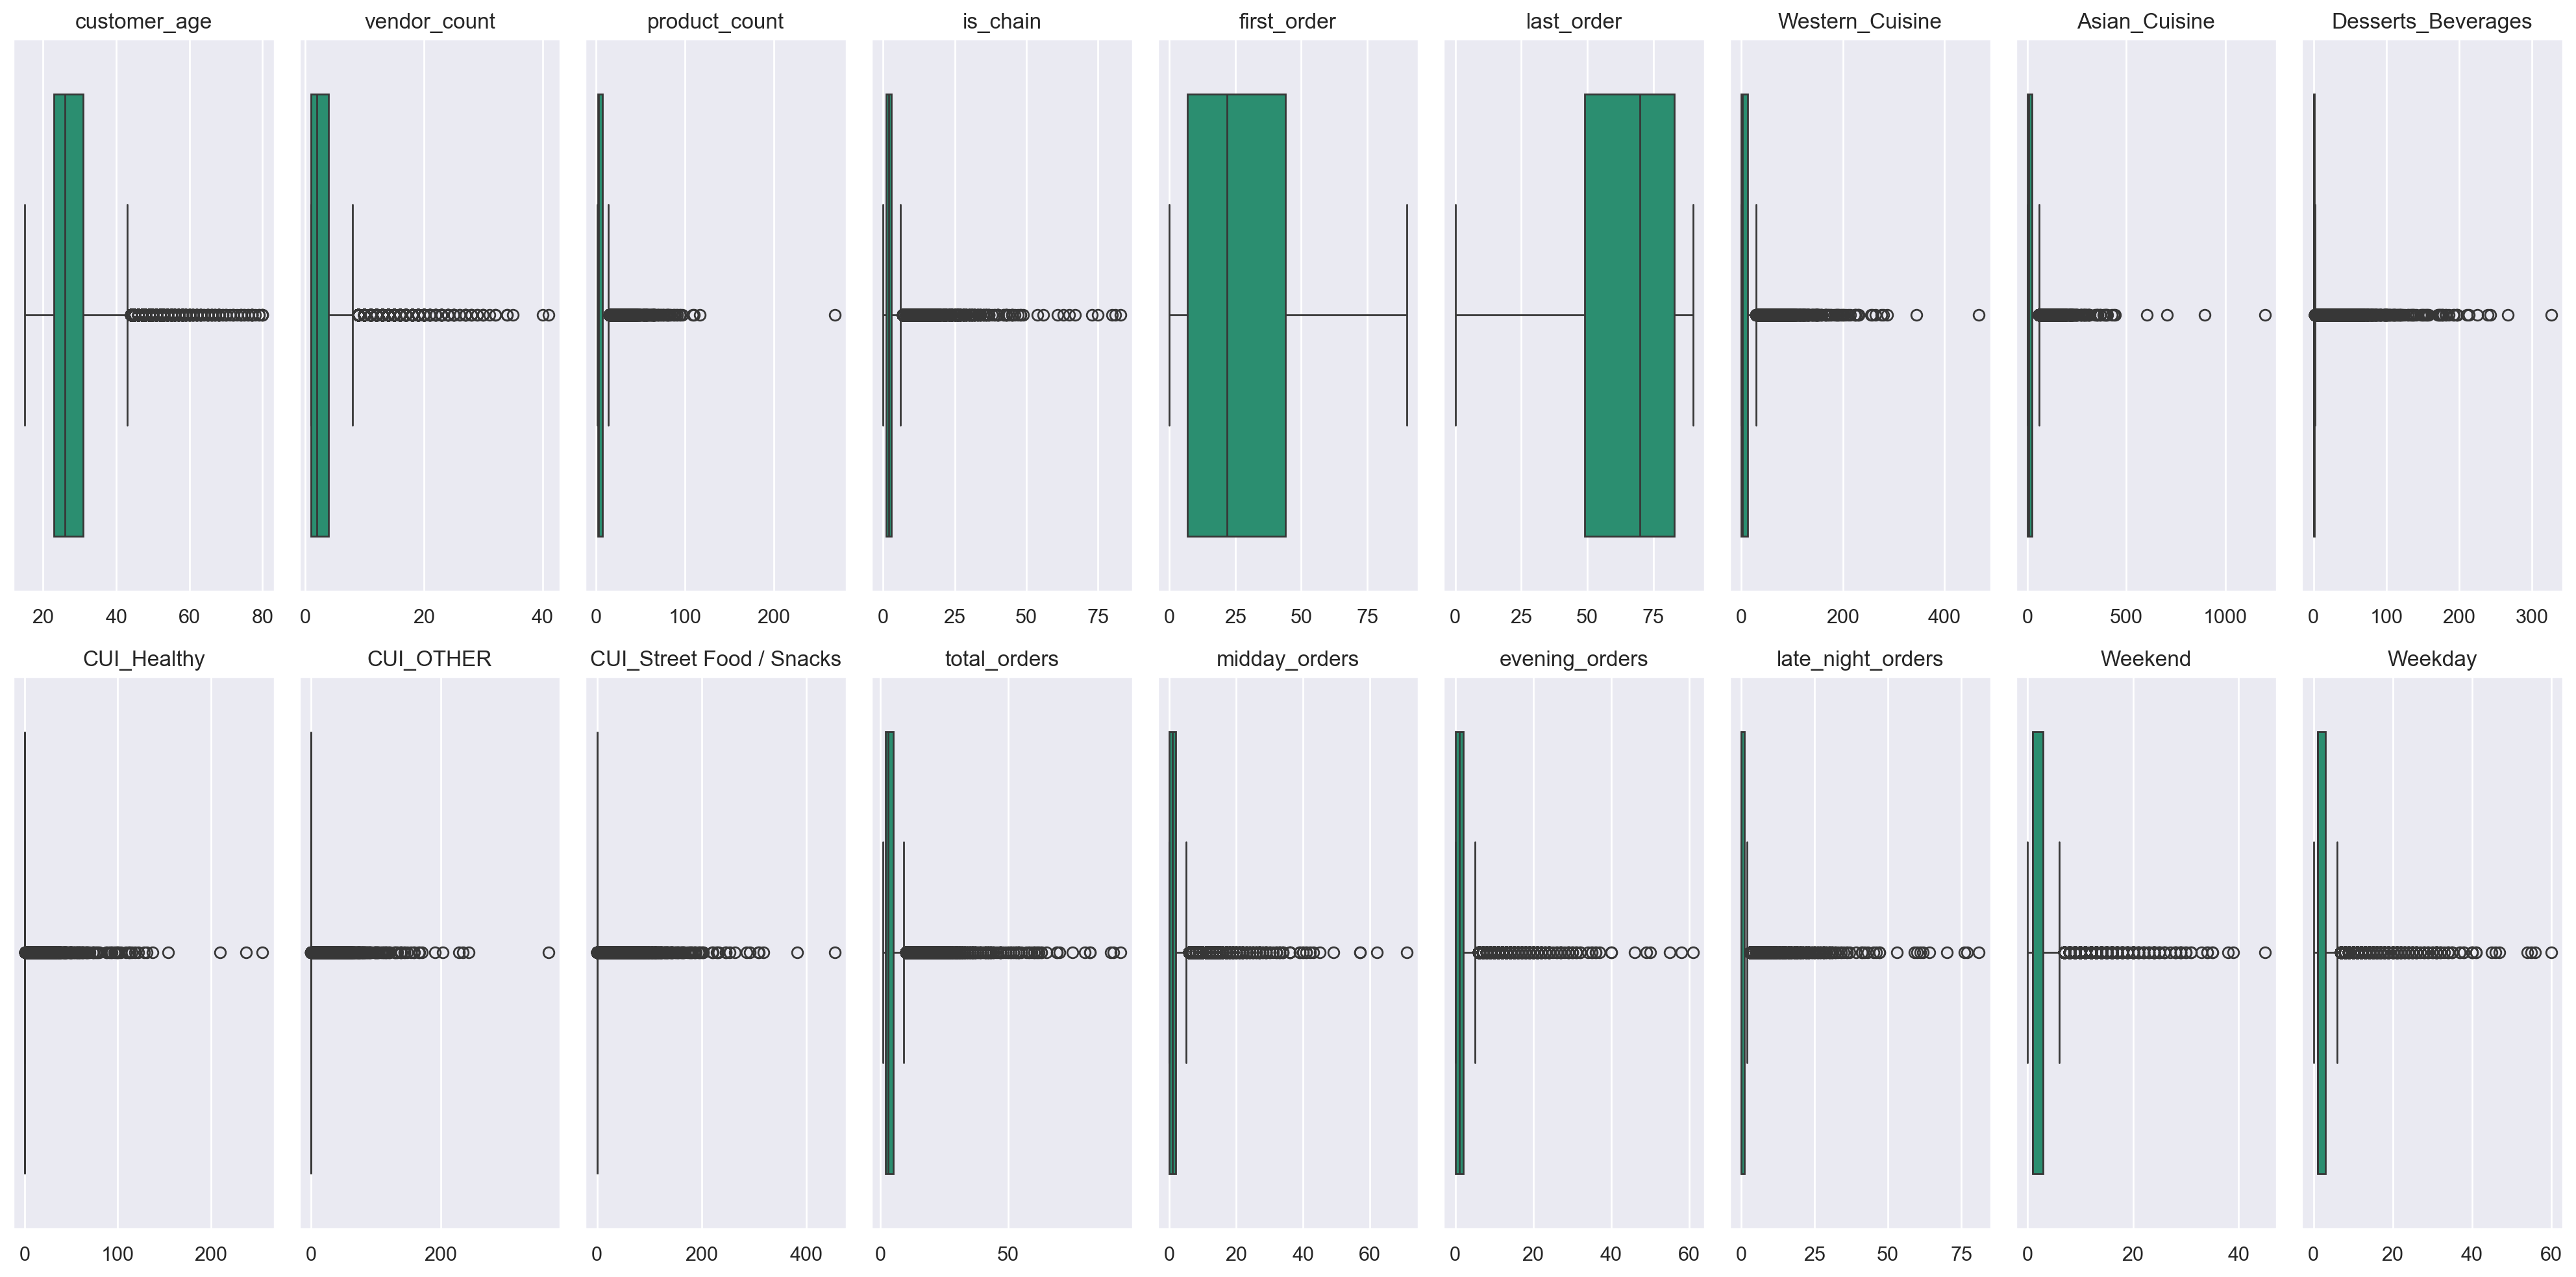

In [303]:
def plot_horizontal_boxplots(data, columns):
    """
    Generate horizontal box plots for each variable in the provided list of columns.
    The plots are arranged in 2 rows and 9 columns.
    
    Parameters:
    - data: DataFrame containing the data.
    - columns: List of column names to plot.
    """
    ncols = 9  # Number of plots per row
    nrows = 2  # Fixed to 2 rows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten axes for easy iteration
    
    for idx, col in enumerate(columns):
        # Calculate IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Plot horizontal boxplot
        sns.boxplot(data=data, x=col, ax=axes[idx], palette="Dark2", orient="h")
        axes[idx].set_title(f"{col}")
        axes[idx].set_xlabel("")
    
    # Hide unused subplots if any
    for ax in axes[len(columns):]:
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

# Usage example
plot_horizontal_boxplots(data=food_df, columns=num_columns_out)

> - An high amount of outliers can be observed in almost all columns. We would like to lower these numbers.
> - Some of the CUI features are only described by outliers, which don't really make sense. This is probably happening because these types of cuisines are not that popular and predominantly customers spend 0 units of price on them.
> - We believe these values are being very imbalanced by one-time customers, and we intend on studying this further.

##### Bivariate Analysis <a id="num-bivariate-analysis" class="anchor"></a>
[Top of Section](#Visual-Exploration)<br>

`Total orders by hour of the day`

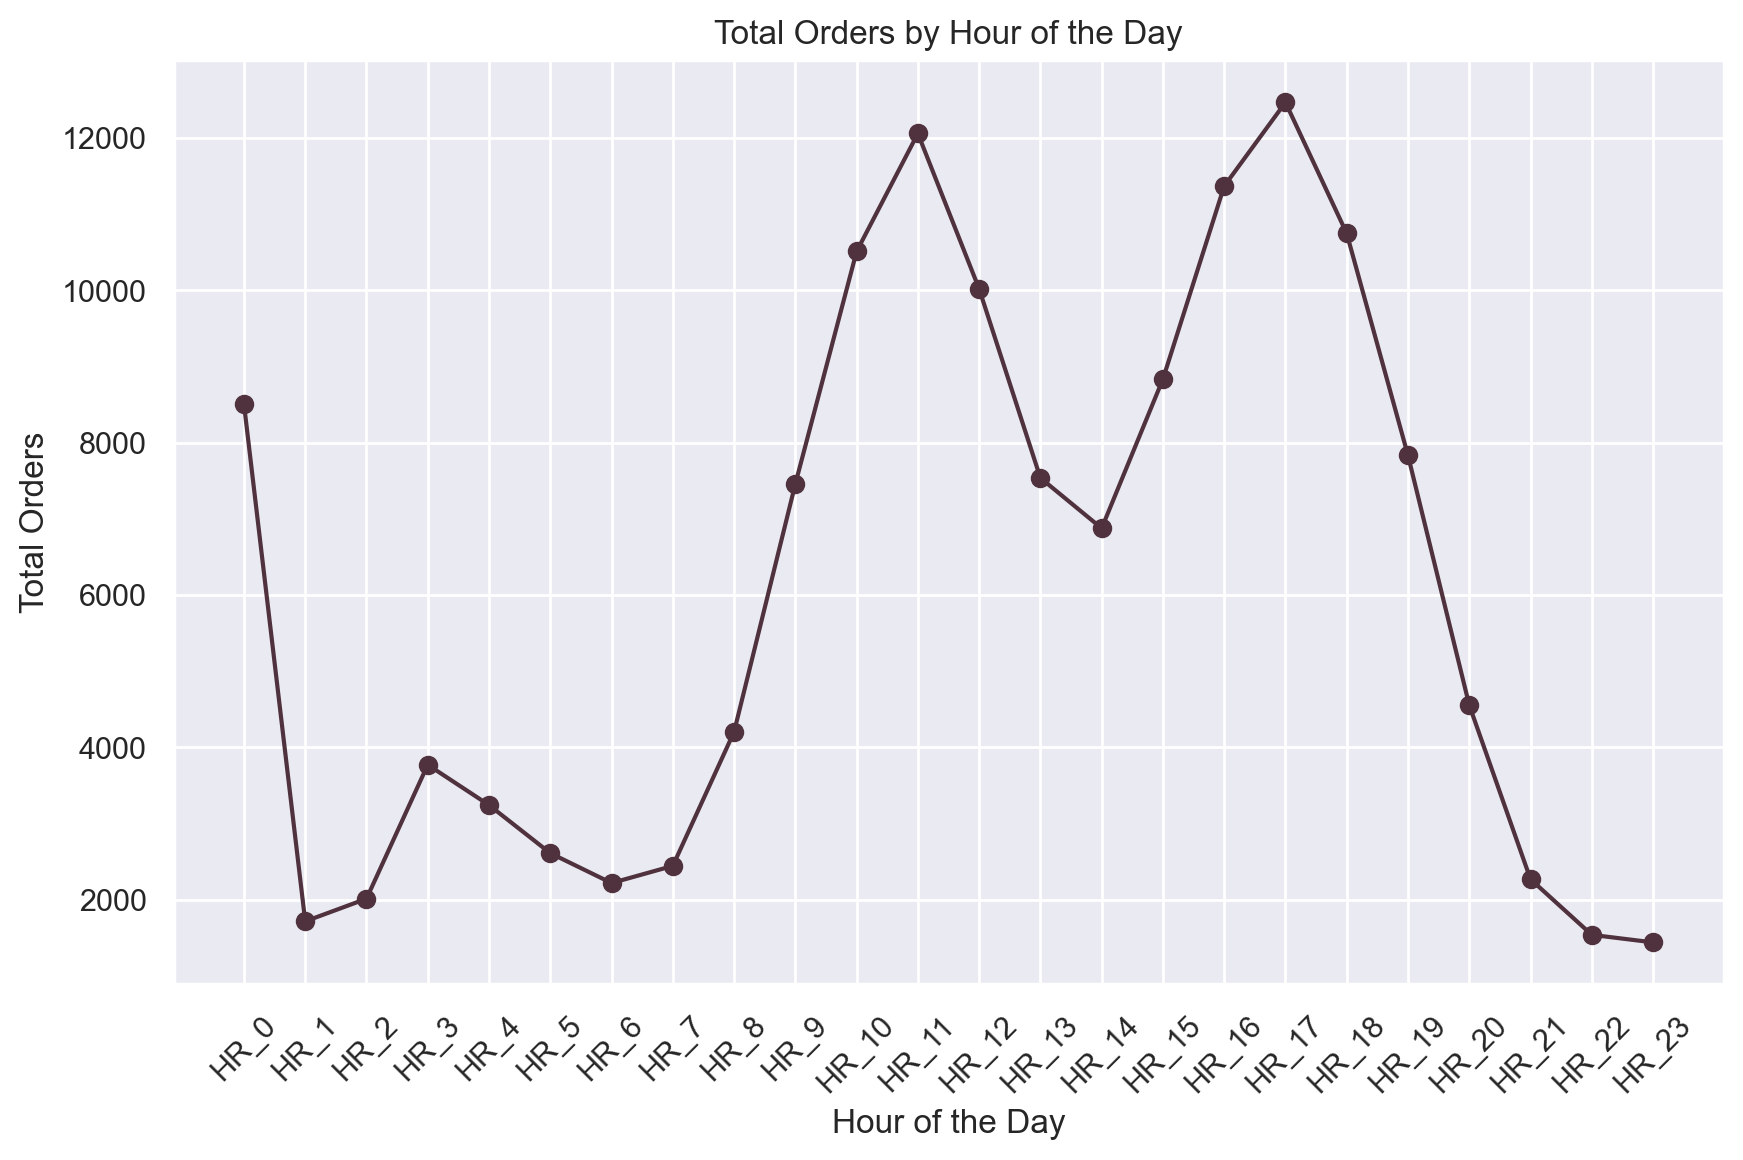

In [304]:
hours_of_the_day = [f'HR_{i}' for i in range(24)]
plt.figure(figsize=(10, 6))
plt.plot(hours_of_the_day, food_df[hours_of_the_day].sum(), marker='o', color=colors["BR"])
plt.title('Total Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

> - The orders per hour of the day have 3 peaks, these 3 peaks were used to explain the division of the HR_colums into midday/late/evening columns.
> - Most of the orders happen in 2 peaks, around 10am to 1pm, and around 4pm to around 7pm.
> - There is low activity during late night, midnight to early morning hours.

`Time of the day`

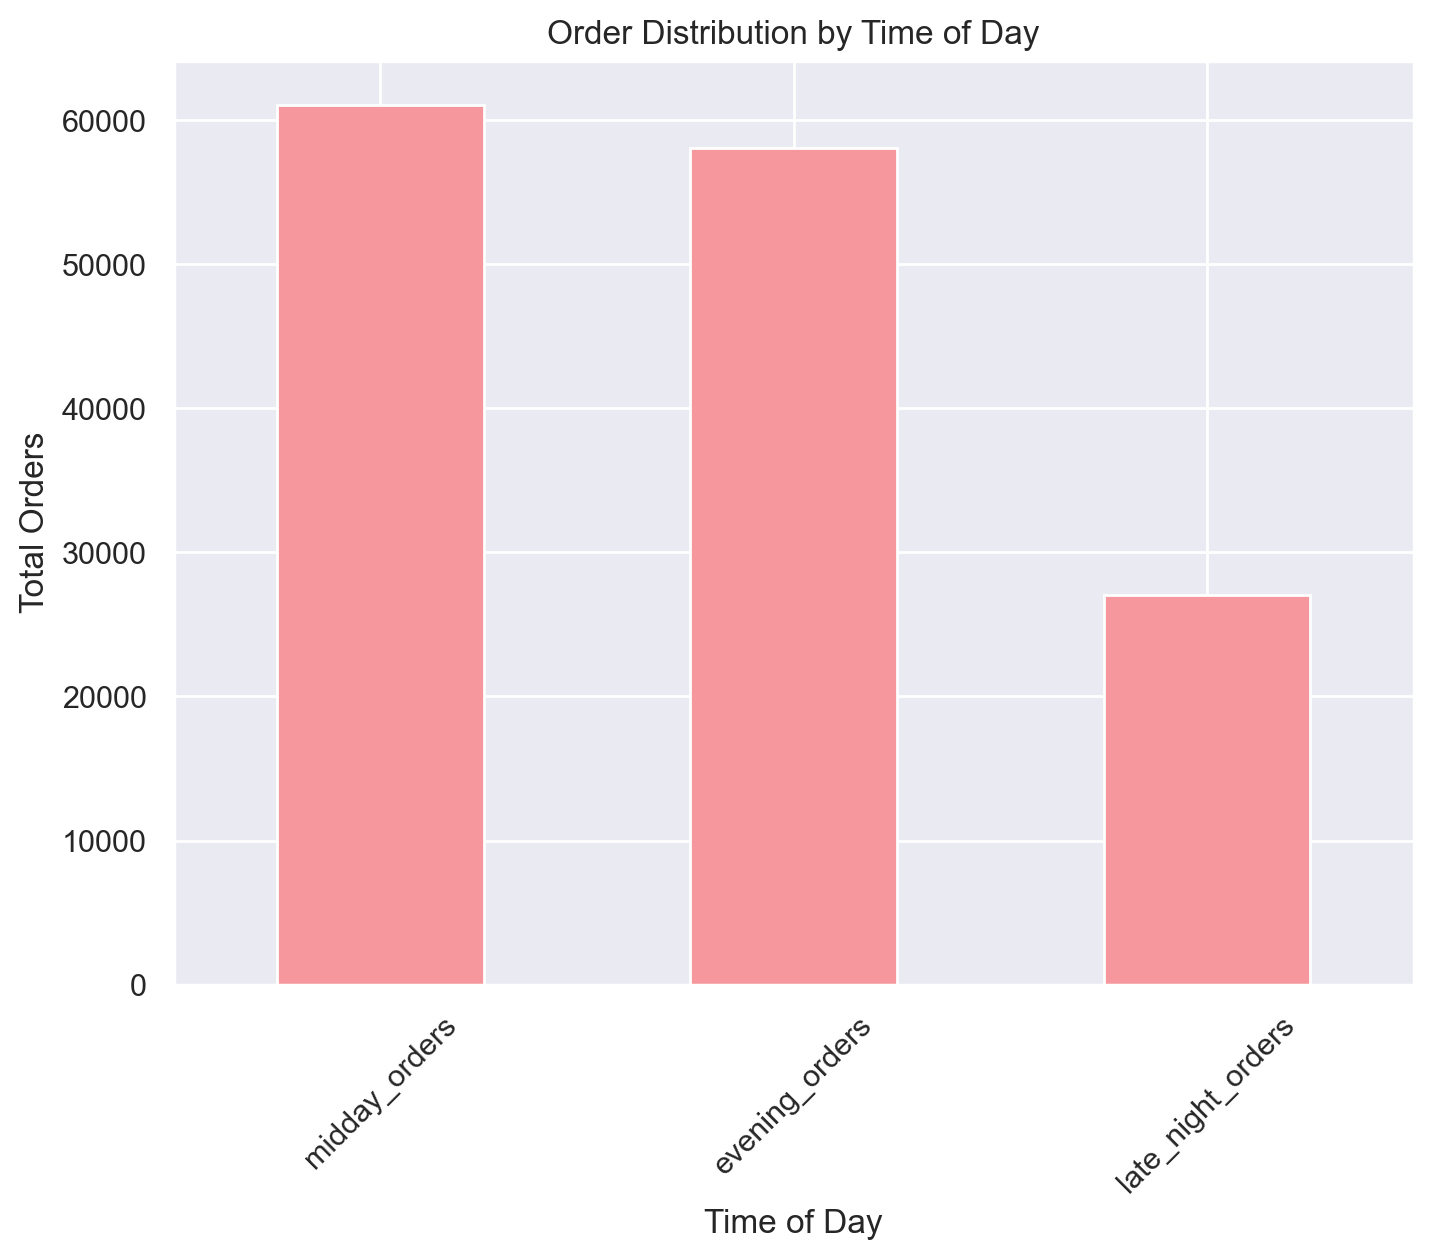

In [305]:
# Creating a bar chart of the orders per time of the day
time_of_day_columns = ['midday_orders', 'evening_orders', 'late_night_orders']

plt.figure(figsize=(8, 6))
food_df[time_of_day_columns].sum().plot(kind='bar', color=colors["R"])
plt.title('Order Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

> - Most orders are placed during the day.
> - Late night orders represent less then half of the orders placed during the midday or evening.

`Cuisines`

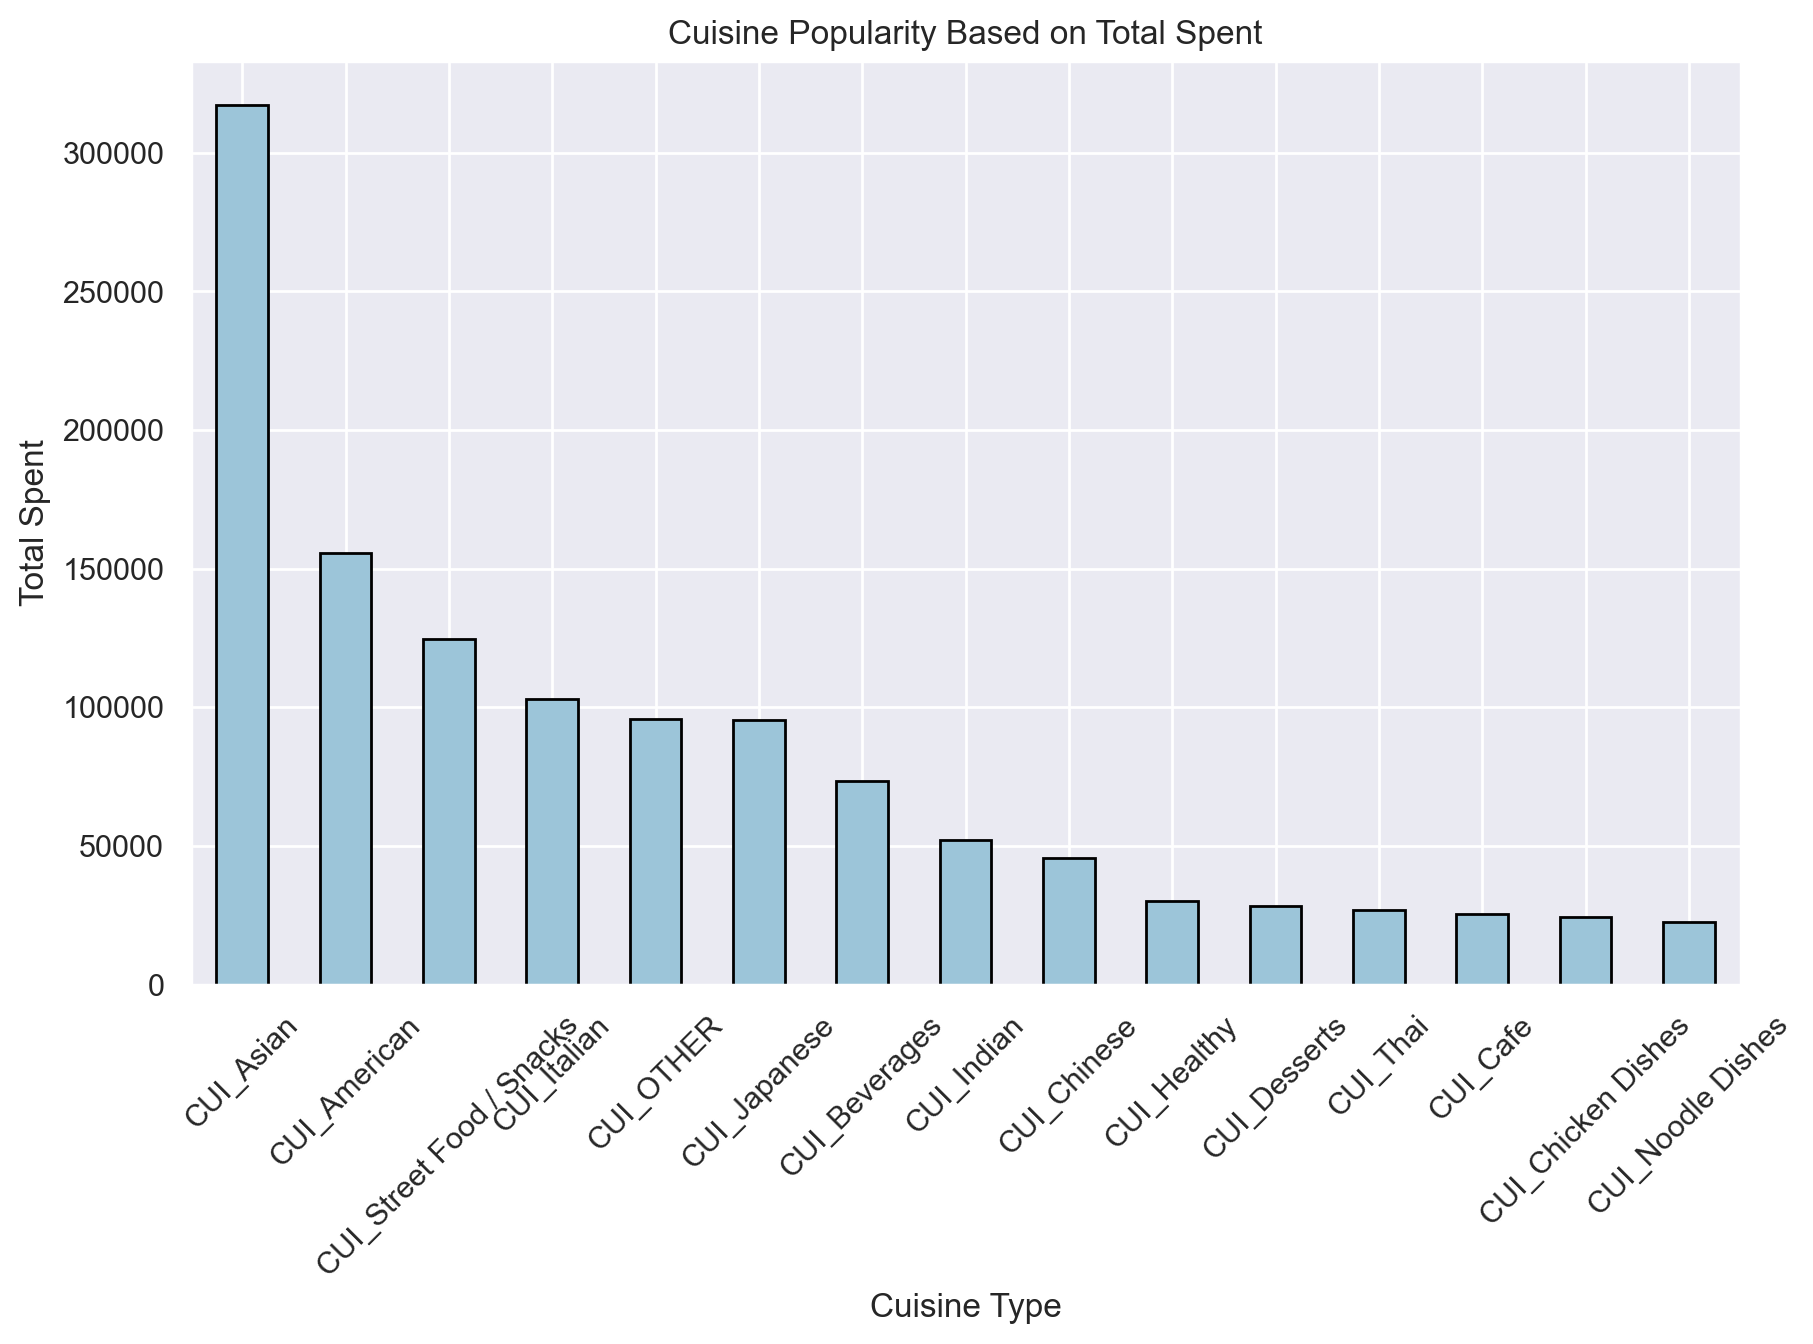

In [306]:
cuisine_columns = [col for col in food_df.columns if col.startswith('CUI_')]
cuisine_totals = food_df[cuisine_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cuisine_totals.plot(kind='bar', color=colors["B"], edgecolor='black')
plt.title('Cuisine Popularity Based on Total Spent')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

> - In the bar chart above, we observe that CUI_Asian is the dominant cuisine per number of orders.
> - Some of the least popular/available CUI's are: Healthy, Desserts, Thai, Cafe, Chicken Dishes, Noodle Dishes. 
> - This can help us undertand the spending habits, preferences or availability of the different types of cuisines to our customers. 

<code>CUI Aggregations</code>

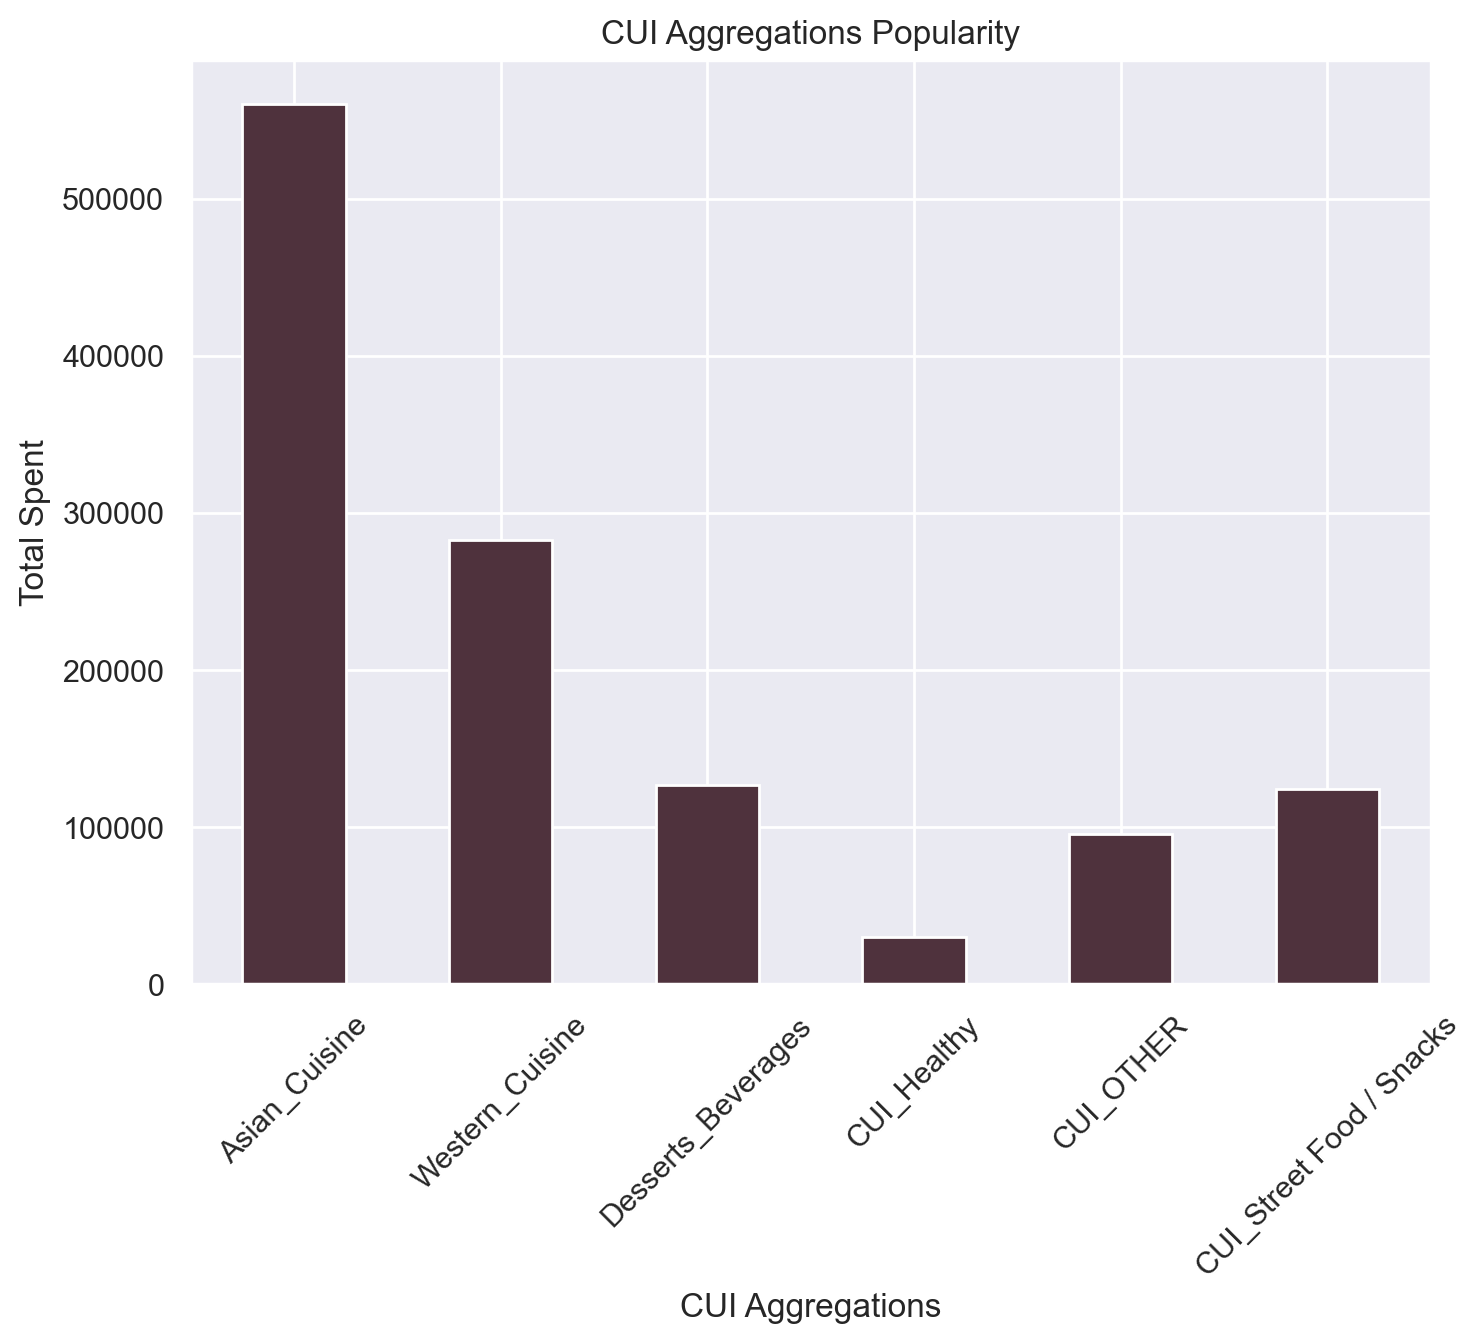

In [307]:
# Creating a bar chart of the orders per cuisine aggregation
cui_aggregations = ['Asian_Cuisine', 'Western_Cuisine', 'Desserts_Beverages', 'CUI_Healthy', 'CUI_OTHER', 'CUI_Street Food / Snacks']

plt.figure(figsize=(8, 6))
food_df[cui_aggregations].sum().plot(kind='bar', color=[colors["BR"]])
plt.title('CUI Aggregations Popularity')
plt.xlabel('CUI Aggregations')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

> - Asian_Cuisines are the ones with the most orders, and CUI_Healthy has the least orders.

`Vendor count and Product count`

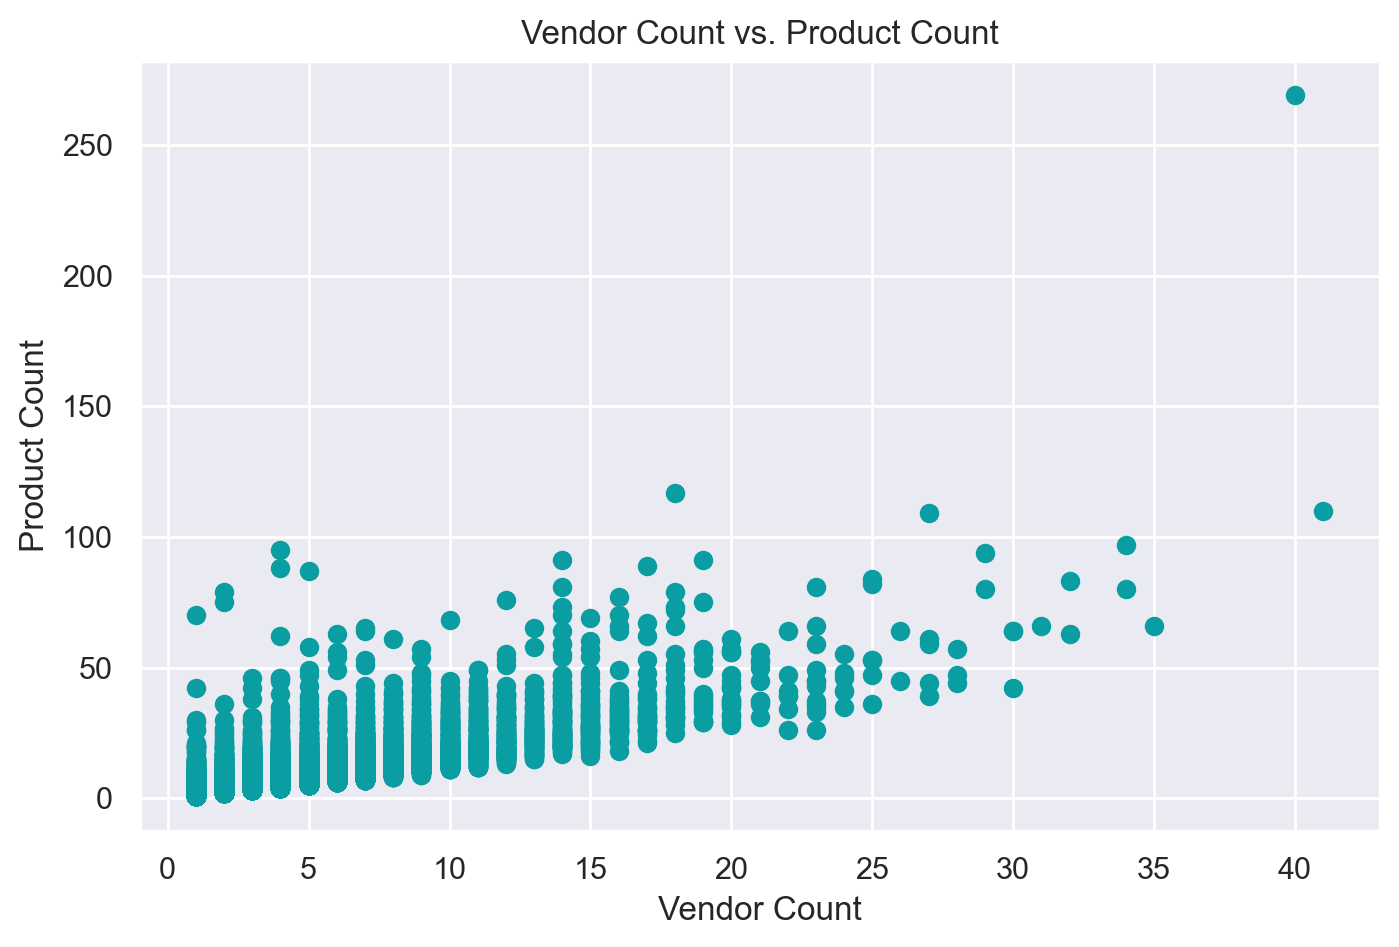

In [308]:
#Using a scatterplot to analyse if there is anny correlation between product count and vendor count
plt.figure(figsize=(8, 5))
plt.scatter(food_df['vendor_count'], food_df['product_count'], color=colors["BL"])
plt.title('Vendor Count vs. Product Count')
plt.xlabel('Vendor Count')
plt.ylabel('Product Count')
plt.grid(True)
plt.show()

> - We can observe an apparent positive correlation between Vendor count and product count.
> - Outliers detected

`First order and Last order`

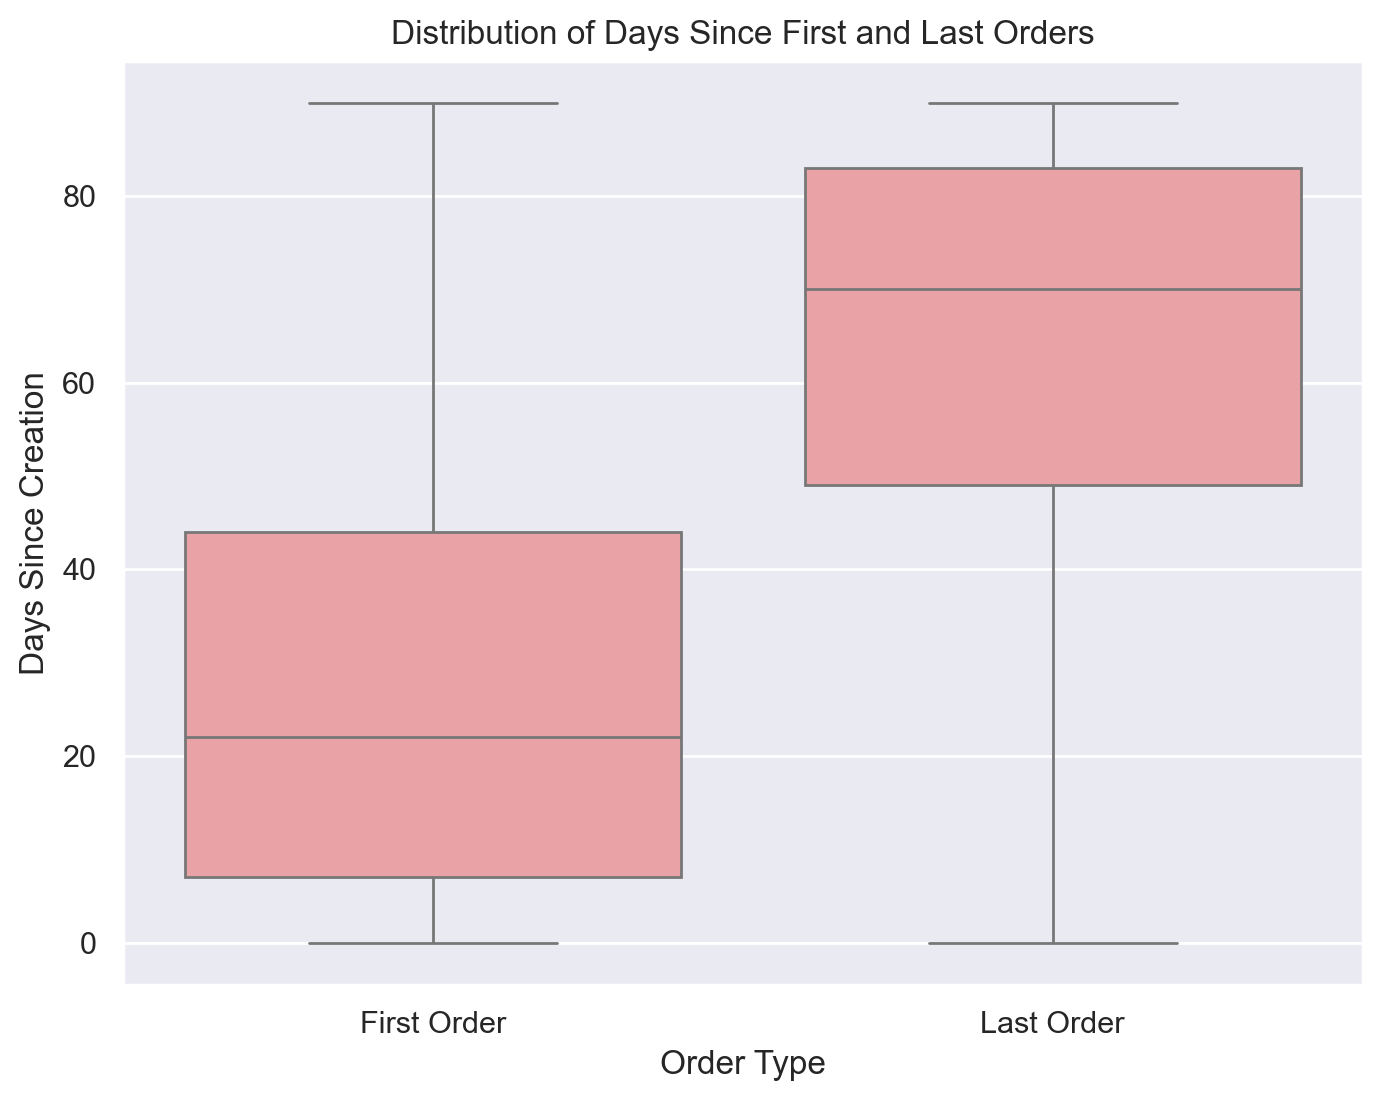

In [309]:
plt.figure(figsize=(8, 6))

# Creating a DataFrame for boxplot
order_data = pd.DataFrame({
    'First Order': food_df['first_order'],
    'Last Order': food_df['last_order']
})

# Melt the DataFrame for seaborn
order_data_melted = order_data.melt(var_name='Order Type', value_name='Days Since Creation')

# Plot the boxplot
sns.boxplot(x='Order Type', y='Days Since Creation', data=order_data_melted, color=colors["R"])
plt.title('Distribution of Days Since First and Last Orders')
plt.xlabel('Order Type')
plt.ylabel('Days Since Creation')
plt.show()



> - There’s a broader distribution for the last orders. 
> - This could reflect a retention trend where customers make their last order after a substantial amount of time since their first order.

In [310]:
food_df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_orders',
       'midday_orders', 'evening_orders', 'late_night_orders', 'Weekend',
       'Weekday', 'Western_Cuisine', 'Asian_Cuisine', 'Desserts_Beverages',
       'total_spent'],
      dtype='object')

`Correlation Matrix`

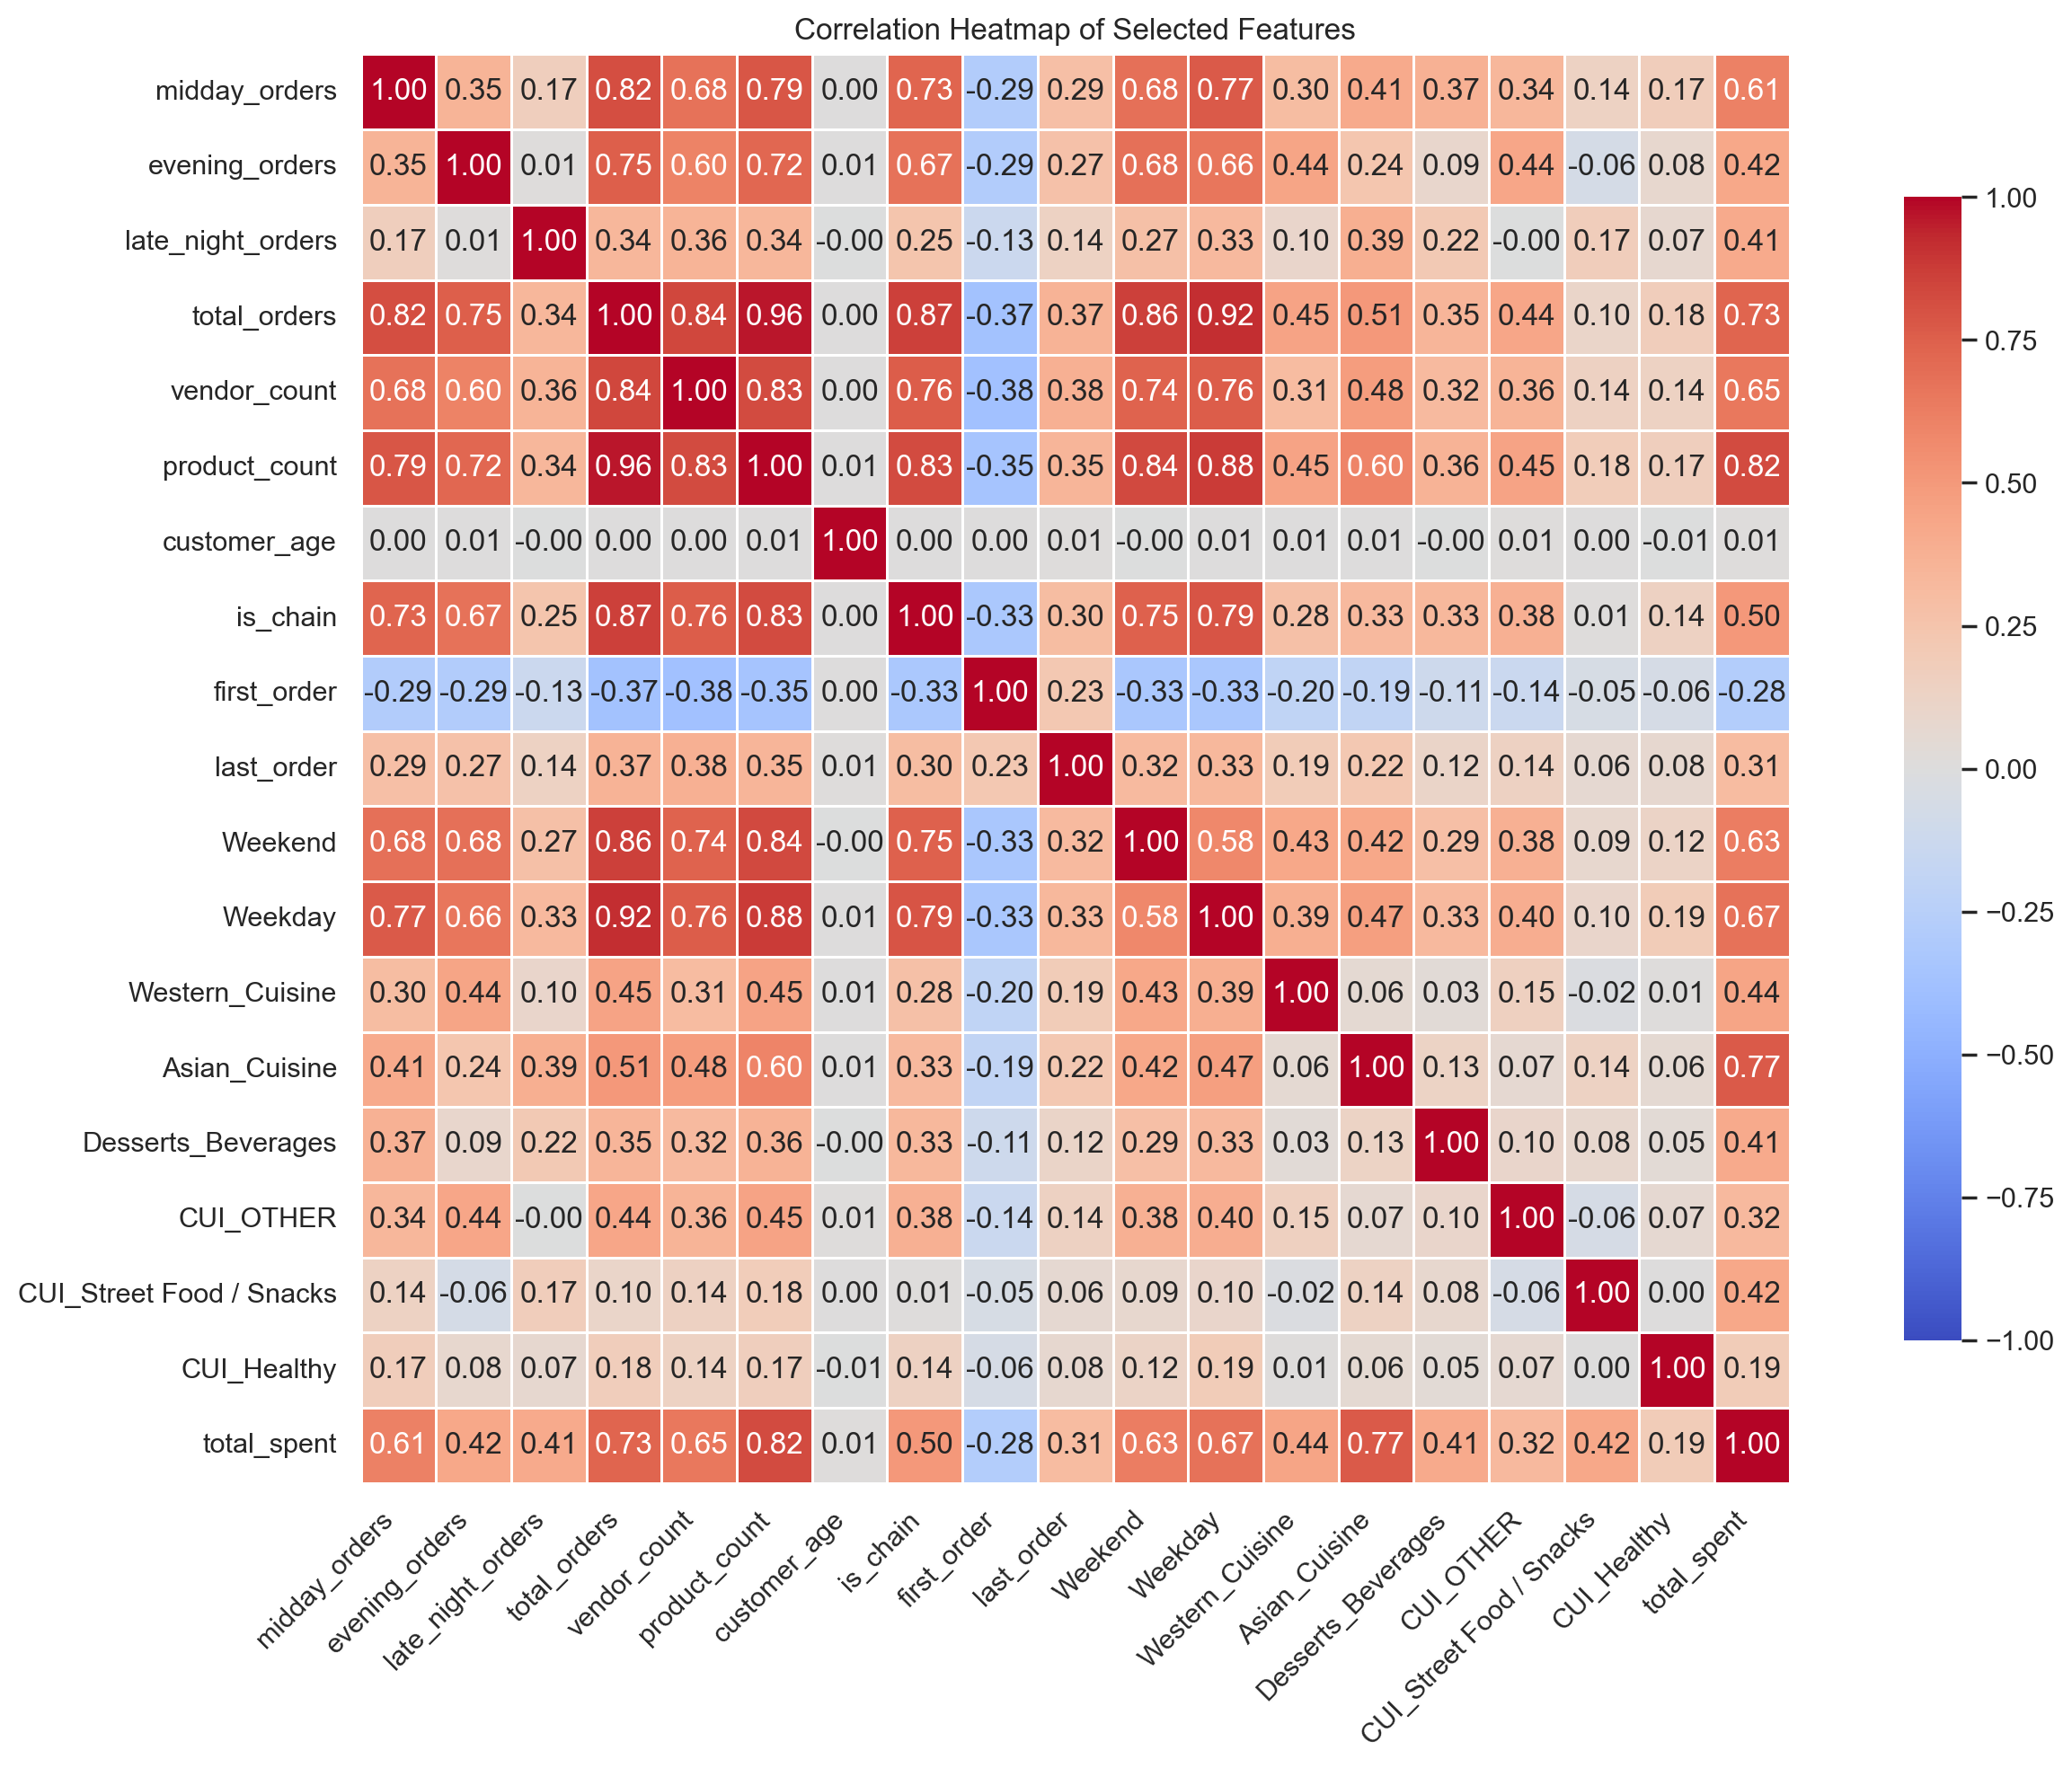

In [311]:
selected_features = [
    'midday_orders', 'evening_orders', 'late_night_orders',
    'total_orders', 'vendor_count', 'product_count', 
    'customer_age', 'is_chain', 'first_order', 'last_order',
    'Weekend', 'Weekday', 'Western_Cuisine', 'Asian_Cuisine', 
    'Desserts_Beverages', 'CUI_OTHER', 'CUI_Street Food / Snacks',
    'CUI_Healthy', 'total_spent'
]

# Calculating the correlation matrix for the selected features
correlation_matrix = food_df[selected_features].corr()

# Creating the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation coefficients
            fmt='.2f',   # Format for the annotation
            cmap='coolwarm',  # Color map
            square=True,  # Make cells square
            cbar_kws={"shrink": .8},  # Color bar size
            linewidths=0.5,  # Lines between cells
            vmin=-1,  # Minimum limit for color bar
            vmax=1)  # Maximum limit for color bar

# Set titles and labels
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

> - There is a high correlation between the <code>total_orders</code> and is_chain (0.87), which might be indicating customer preferences for chain restaurants.
> - <code>product_count</code> and <code>total_orders</code> have a very high correlation of 0.96, meaning that they may be giving us the same information.
> - <code>Weekend</code> and <code>Weekday</code> are highly correlated with <code>total_orders</code> and <code>product_count</code>.
> - <code>product_count</code> is also highly correlated with <code>total_spent</code>.
> - <code>vendor_count</code> is highly correlated with <code>product_count</code> and <code>total_orders</code>.
> - The fact that customer_age has no correlation with the other variables, might tell us that demographic segmentation may not be the best fit for this dataset.
> - First order displays a negative correlation with almost every other variable (this is often seen in datasets where the "recency" of customer engagement is associated with higher activity levels).

### 5.2 **Categorical Variables** <a id="Visual-Categorical-Variables" class="anchor"></a>
[Back to ToC](#toc)<br>

#### Univariate Analysis <a id="cat-univariate-analysis" class="anchor"></a>

`Customer Region`

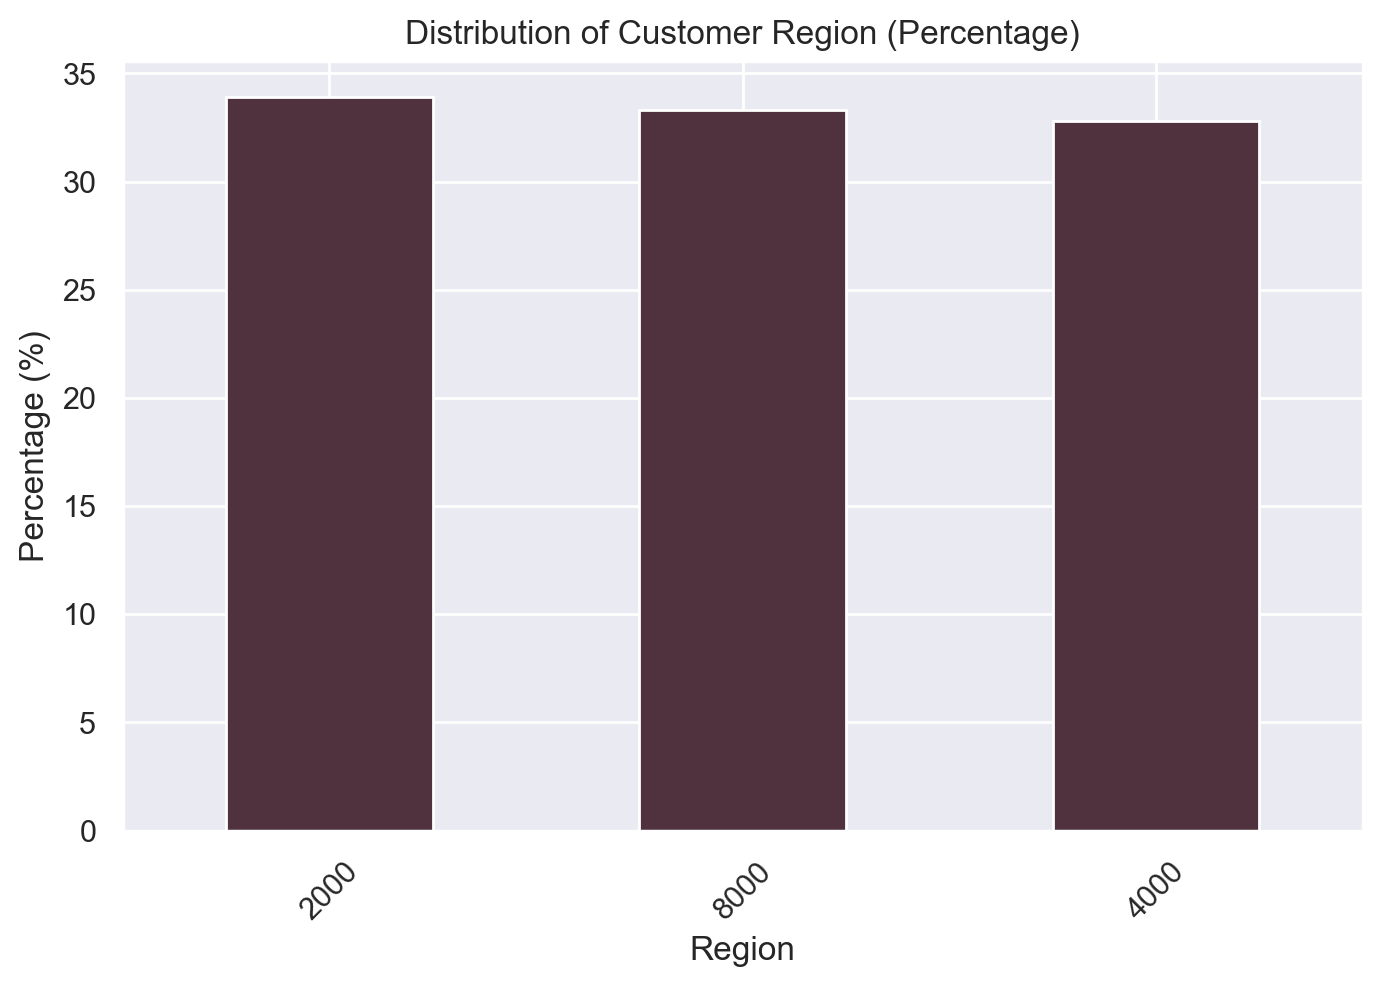

In [312]:
plt.figure(figsize=(8, 5))

# Calculate percentage for each payment method
customer_reg_percentage = cat_food_df['customer_region'].value_counts(normalize=True) * 100

# Plot the percentages
customer_reg_percentage.plot(kind='bar', color=colors["BR"])

# Add title and labels
plt.title('Distribution of Customer Region (Percentage)')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

> - The region with most order is '2000'.

`Payment Methods`

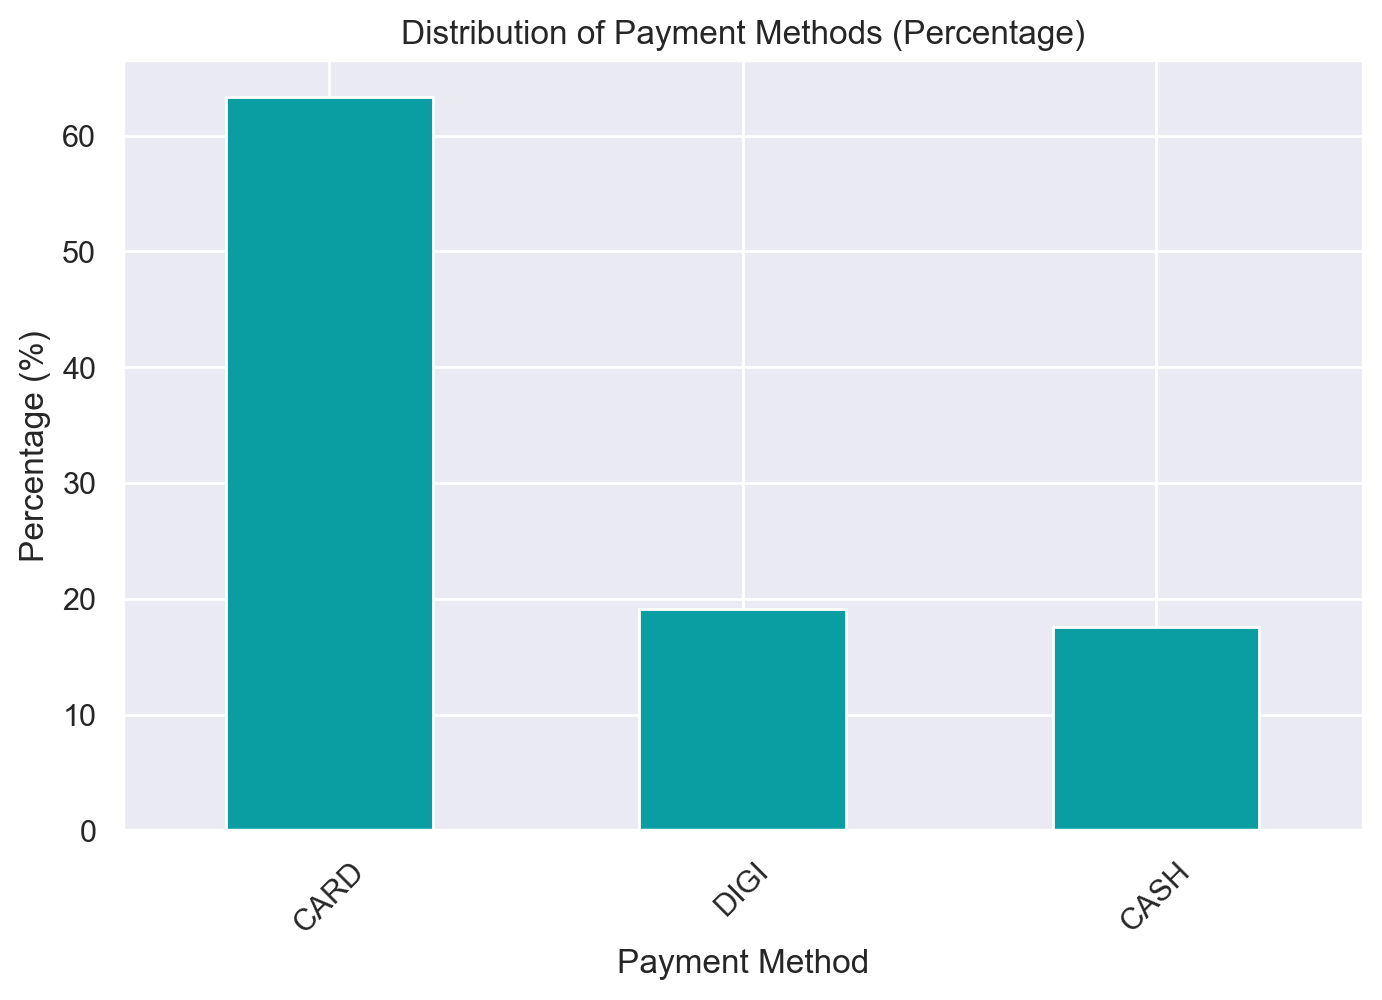

In [313]:
plt.figure(figsize=(8, 5))

# Calculate percentage for each payment method
payment_method_percentage = food_df['payment_method'].value_counts(normalize=True) * 100

# Plot the percentages
payment_method_percentage.plot(kind='bar', color=colors["BL"])

# Titles
plt.title('Distribution of Payment Methods (Percentage)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()


> - More than 60% of the orders are done with payment by CARD. Which is a good insight into the customer's behaviour.

`last_promo`

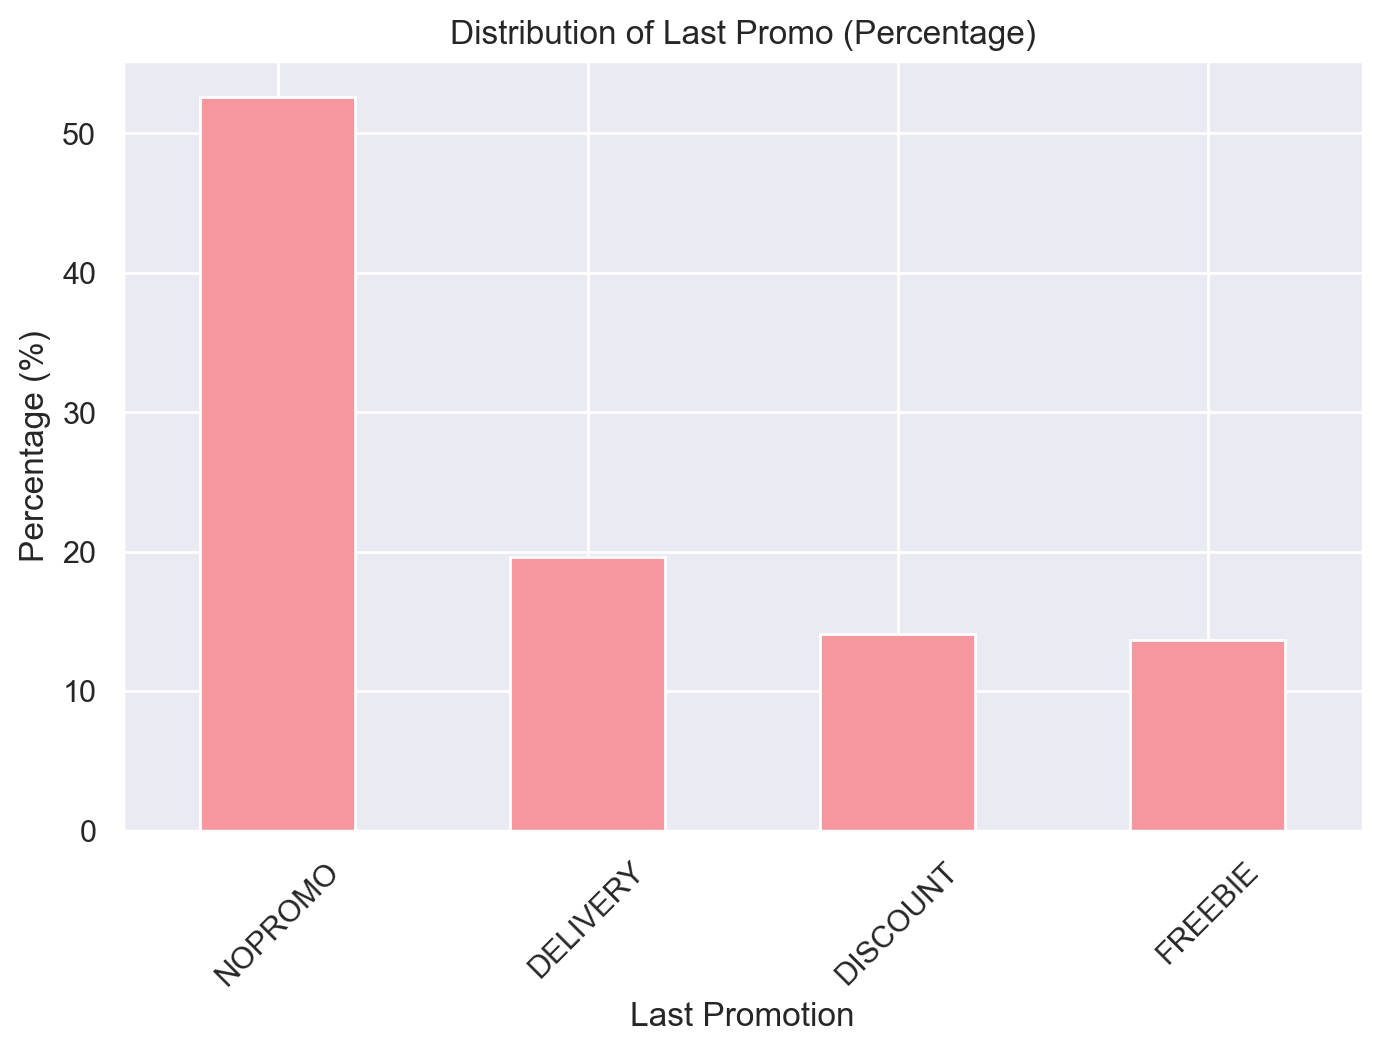

In [314]:
plt.figure(figsize=(8, 5))

# Calculate percentage for each payment method
last_promo_percentage = cat_food_df['last_promo'].value_counts(normalize=True) * 100

# Plot the percentages
last_promo_percentage.plot(kind='bar', color=colors["R"])

#Tittles
plt.title('Distribution of Last Promo (Percentage)')
plt.xlabel('Last Promotion')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()

> - As observed, more than 50% of the orders are done when there is no promotion. The category "NOPROMO" is originally the rows with "-", which we considered important for the statistical and visual analysis, hence calling it "NOPROMO".

#### Bivariate Analysis <a id="cat-bivariate-analysis" class="anchor"></a>
[Top of Section](#Visual-Exploration)<br>

`Last Promo` vs `Payment Method` vs `Customer Region`

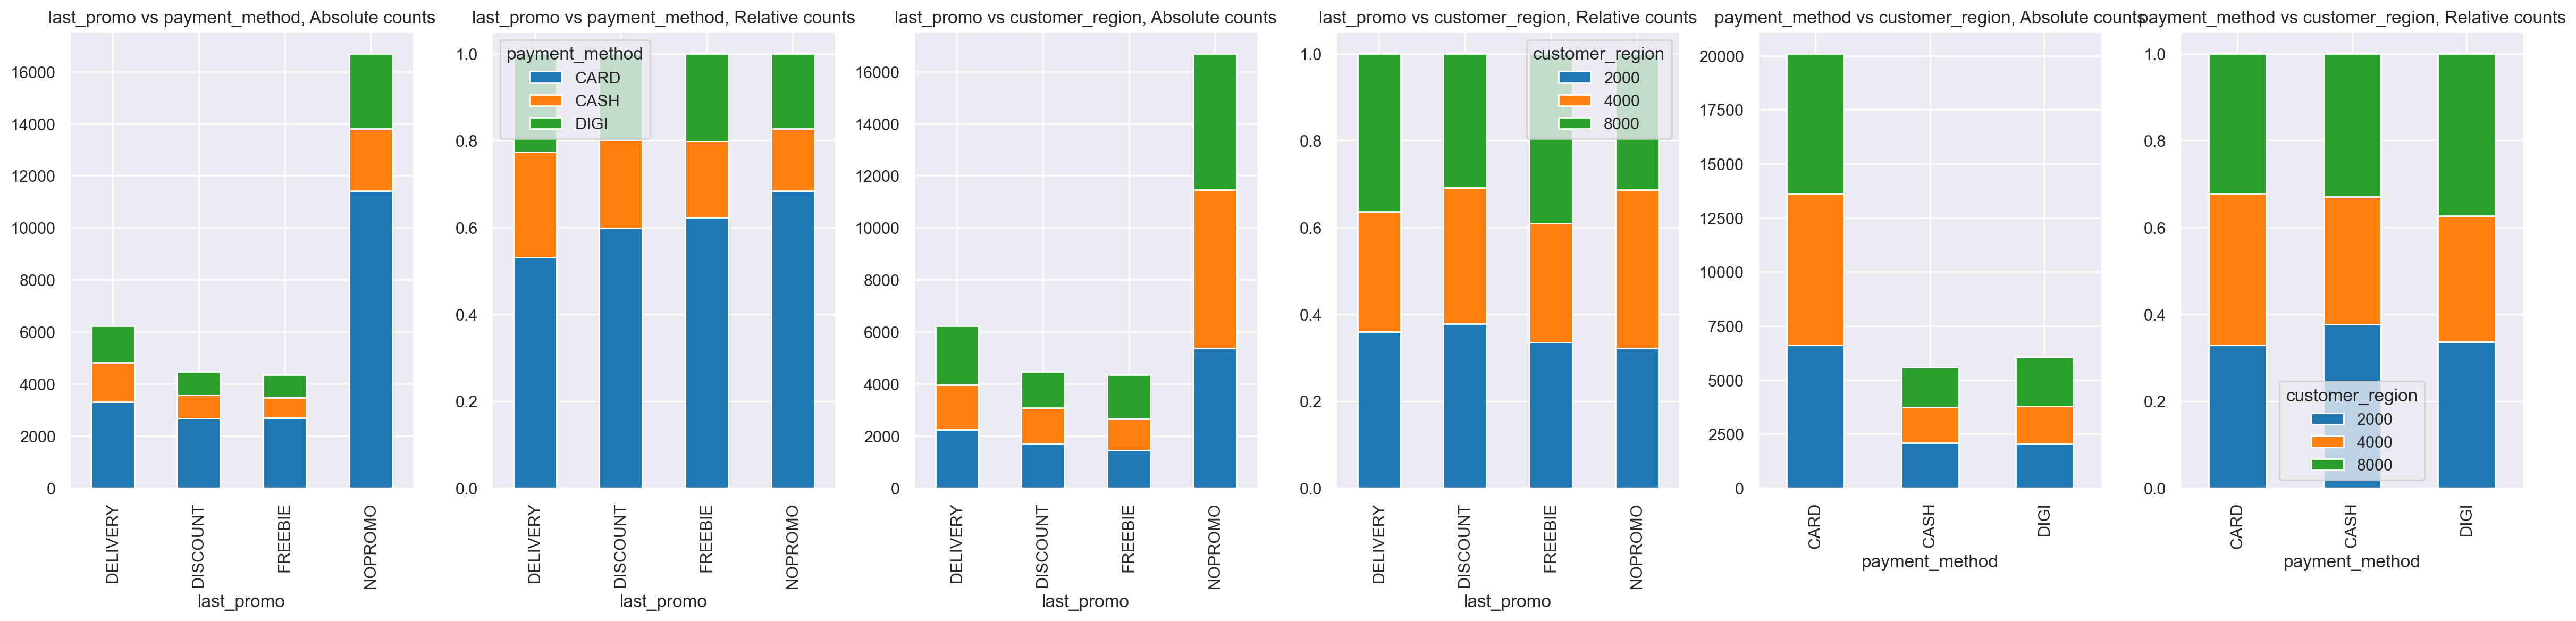

In [315]:
def plot_three_cat_bivariate_side_by_side(food_df, colors):
    """
    Function to plot three comparisons side-by-side: 
    - 'last_promo' vs 'payment_method' 
    - 'last_promo' vs 'customer_region' 
    - 'payment_method' vs 'customer_region'
    Each comparison will show absolute and relative counts side-by-side.

    Parameters:
    food_df (DataFrame): The input DataFrame containing the customer data.
    colors (dict): A dictionary containing color codes for the plot. 
                   Example: {'Promo1': '#1f77b4', 'Promo2': '#ff7f0e', ...}
    """
    
    # Create a figure with 1 row and 6 columns (all comparisons side by side)
    fig, axes = plt.subplots(1, 6, figsize=(24, 6))

    # Extracting the colors from our color palette
    region_colors = list(colors.values())  # Get the color values from the dictionary

    # Plot 1: 'last_promo' vs 'payment_method'
    cat1, cat2 = 'last_promo', 'payment_method'
    catpc_df = food_df.groupby([cat1, cat2])[cat2].size().unstack()
    catpc_df.plot.bar(stacked=True, ax=axes[0], color=region_colors)
    axes[0].legend([], frameon=False)
    axes[0].set_title(f'{cat1} vs {cat2}, Absolute counts')

    catpc_df2 = food_df.groupby([cat1, cat2])[cat2].size() / food_df.groupby([cat1])[cat2].size()
    catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1], color=region_colors)
    axes[1].set_title(f'{cat1} vs {cat2}, Relative counts')
    axes[1].legend(loc=(1.01, 0))
    axes[1].legend(title=f'{cat2}')

    # Plot 2: 'last_promo' vs 'customer_region'
    cat1, cat2 = 'last_promo', 'customer_region'
    catpc_df = food_df.groupby([cat1, cat2])[cat2].size().unstack()
    catpc_df.plot.bar(stacked=True, ax=axes[2], color=region_colors)
    axes[2].legend([], frameon=False)
    axes[2].set_title(f'{cat1} vs {cat2}, Absolute counts')

    catpc_df2 = food_df.groupby([cat1, cat2])[cat2].size() / food_df.groupby([cat1])[cat2].size()
    catpc_df2.unstack().plot.bar(stacked=True, ax=axes[3], color=region_colors)
    axes[3].set_title(f'{cat1} vs {cat2}, Relative counts')
    axes[3].legend(loc=(1.01, 0))
    axes[3].legend(title=f'{cat2}')

    # Plot 3: 'payment_method' vs 'customer_region'
    cat1, cat2 = 'payment_method', 'customer_region'
    catpc_df = food_df.groupby([cat1, cat2])[cat2].size().unstack()
    catpc_df.plot.bar(stacked=True, ax=axes[4], color=region_colors)
    axes[4].legend([], frameon=False)
    axes[4].set_title(f'{cat1} vs {cat2}, Absolute counts')

    catpc_df2 = food_df.groupby([cat1, cat2])[cat2].size() / food_df.groupby([cat1])[cat2].size()
    catpc_df2.unstack().plot.bar(stacked=True, ax=axes[5], color=region_colors)
    axes[5].set_title(f'{cat1} vs {cat2}, Relative counts')
    axes[5].legend(loc=(1.01, 0))
    axes[5].legend(title=f'{cat2}')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

colors_2 = {
    'Promo1': '#1f77b4',
    'Promo2': '#ff7f0e',
    'Promo3': '#2ca02c',
    'Promo4': '#d62728'
}

# Call the function with your dataset (food_df)
plot_three_cat_bivariate_side_by_side(food_df, colors_2)


    HR by Customer Region

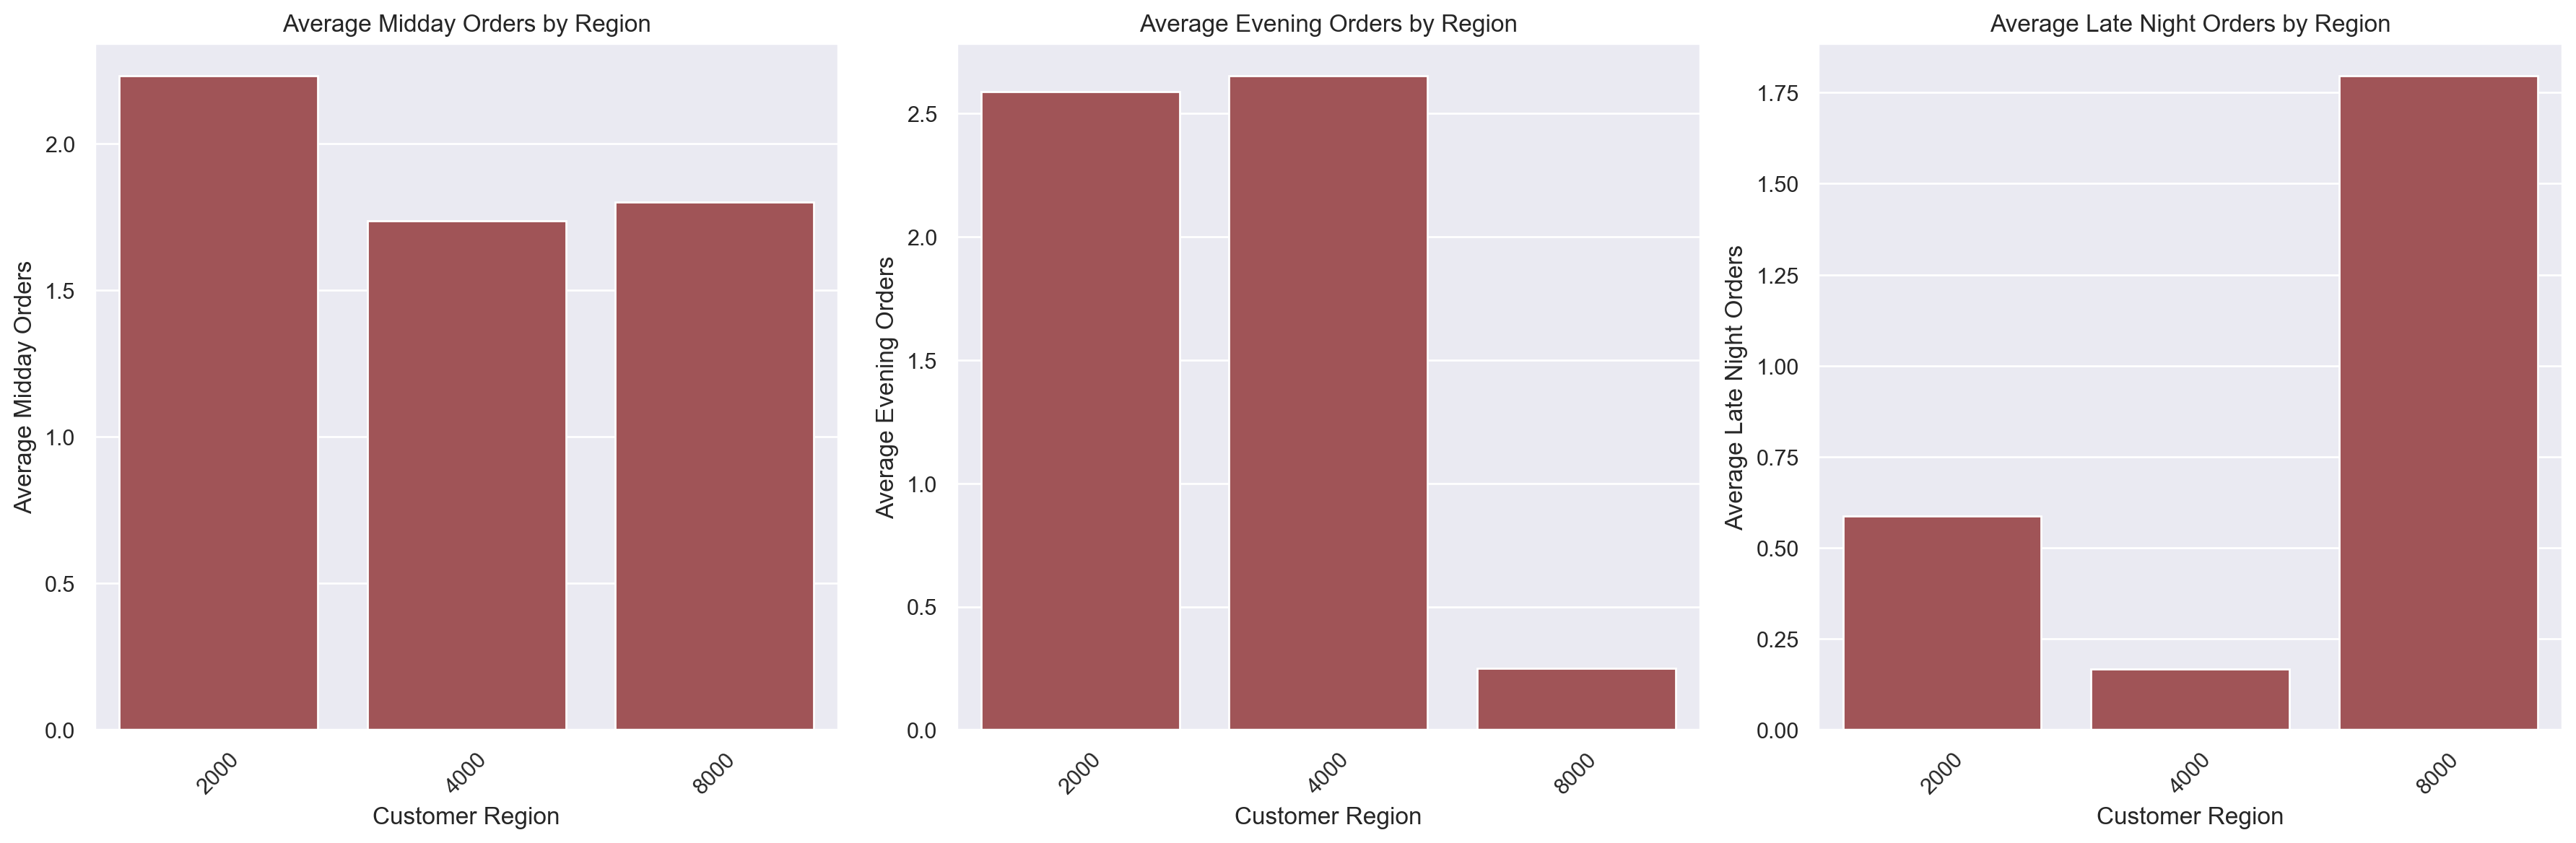

In [316]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

time_columns = ['midday_orders', 'evening_orders', 'late_night_orders']

# Loop through each time period
for i, time in enumerate(time_columns):
    # Calculate the average for the current time period
    avg_data =food_df.groupby('customer_region')[time].mean().reset_index()
    
    # Plot the data
    sns.barplot(x='customer_region', y=time, data=avg_data, ax=axes[i], color=colors["PR"])
    
    # Set titles and labels
    axes[i].set_title(f'Average {time.replace("_", " ").title()} by Region')
    axes[i].set_xlabel('Customer Region')
    axes[i].set_ylabel(f'Average {time.replace("_", " ").title()}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


> Each region's HIGHEST average are:
> - For Region `8000`: HR_9, HR_10, HR_11
> - For Region `4000`: HR_15, HR_16, HR_17
> - For Region `2000`: HR_17, HR_18, HR_19

> We see some variance between the distribution of orders per time of day in the different regions, which is something we previously analysed.

    DOW by customer Region

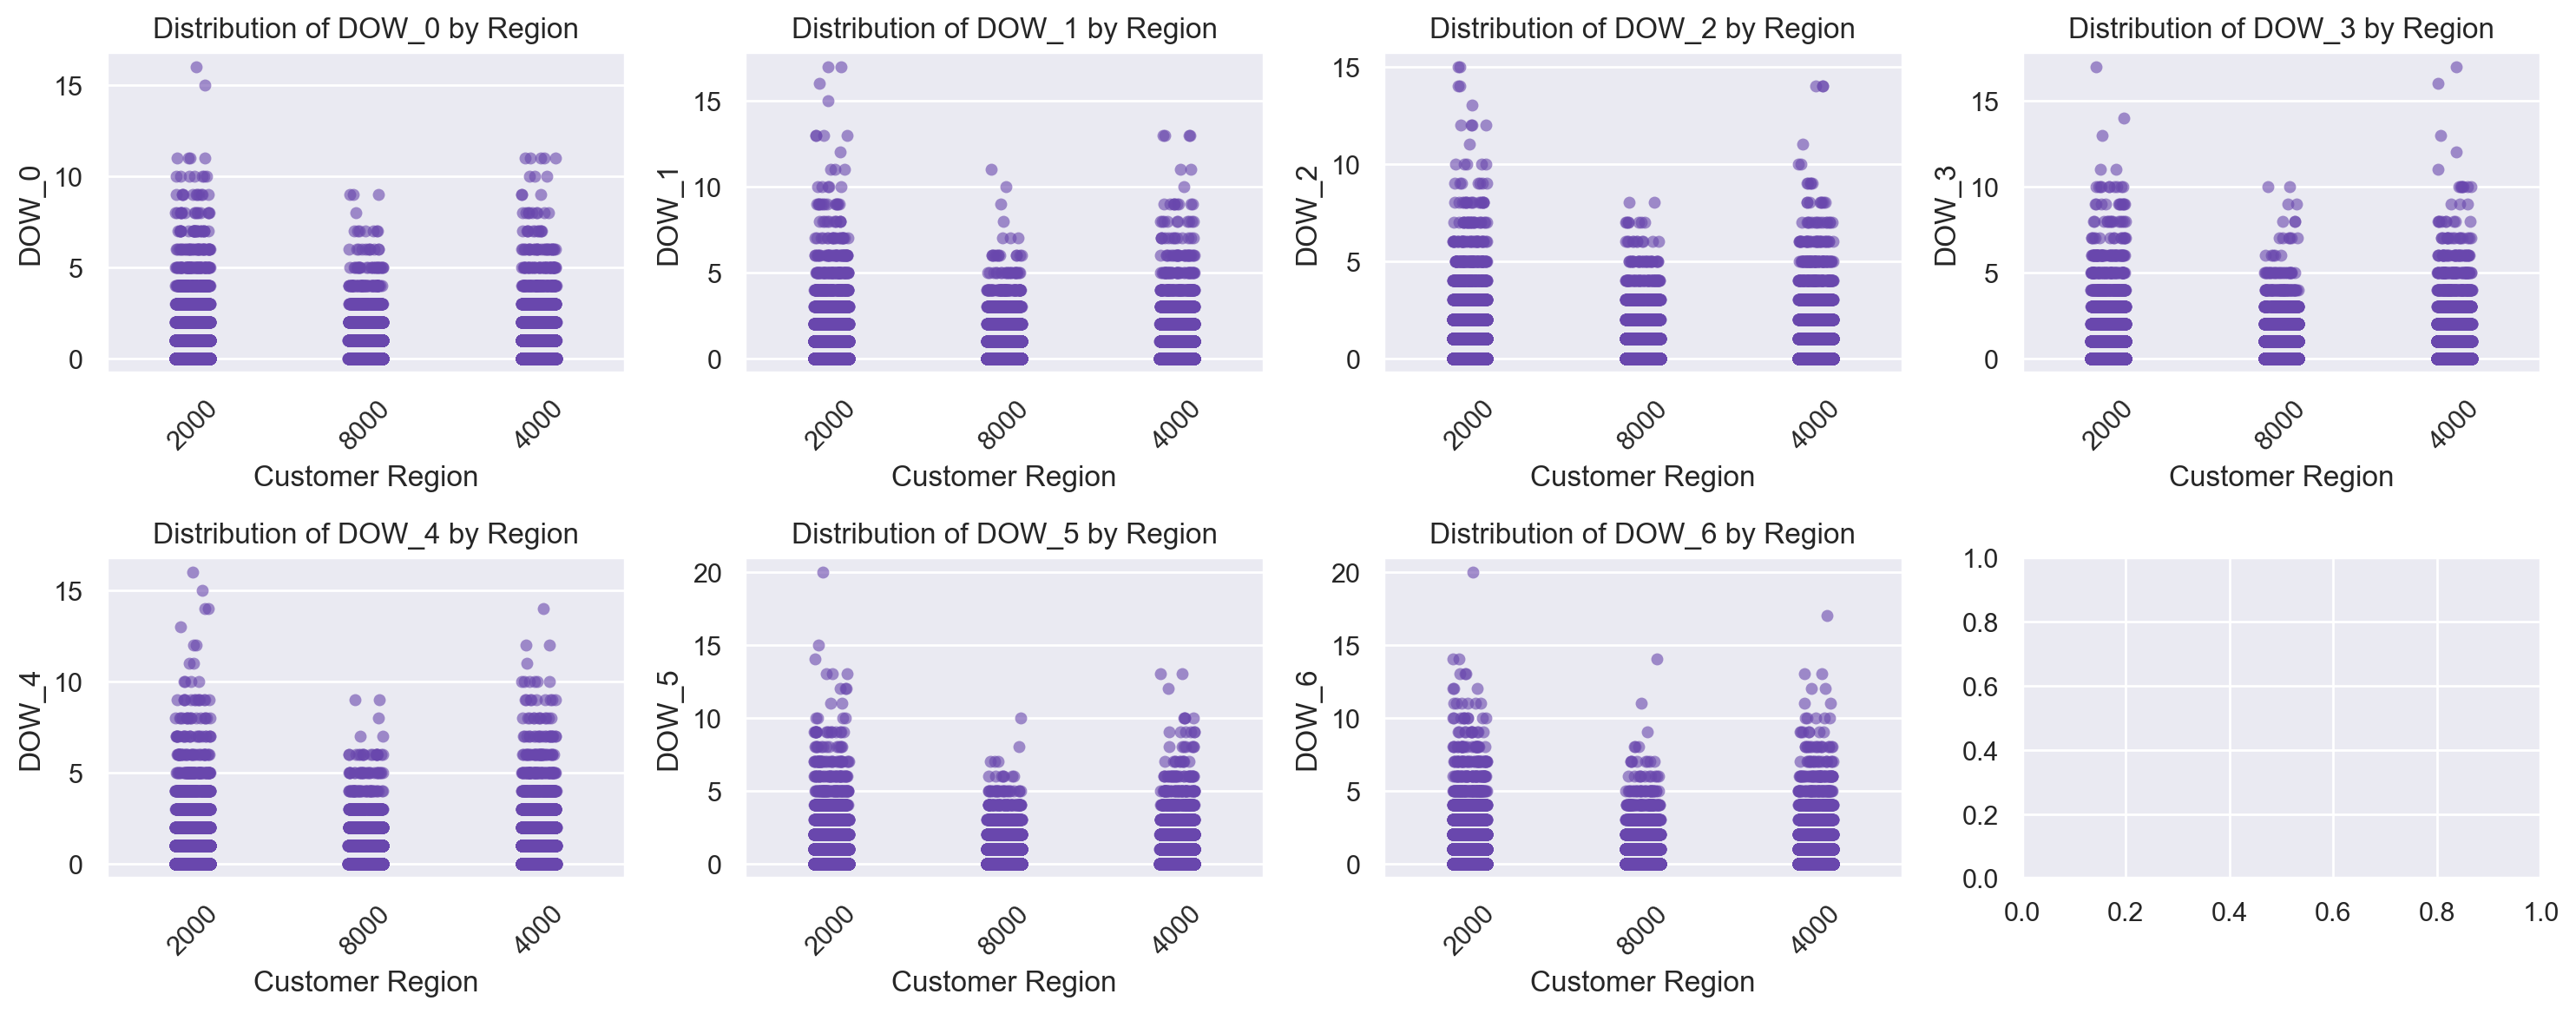

In [208]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))

axes = axes.flatten()

for i in range(7):
    dow_column = f'DOW_{i}'  #making it run through all the dow columns
    sns.stripplot(x='customer_region', y=dow_column, data=food_df, jitter=True, color=colors["P"], alpha=0.6, ax=axes[i]) #Using a strip plot graph
    
    axes[i].set_title(f'Distribution of {dow_column} by Region')
    axes[i].set_xlabel('Customer Region')
    axes[i].set_ylabel(dow_column)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

> - We have more orders in the weekends.
> - Regions '2000' and '4000' have a few clients that make a lot of orders on the weekdays.

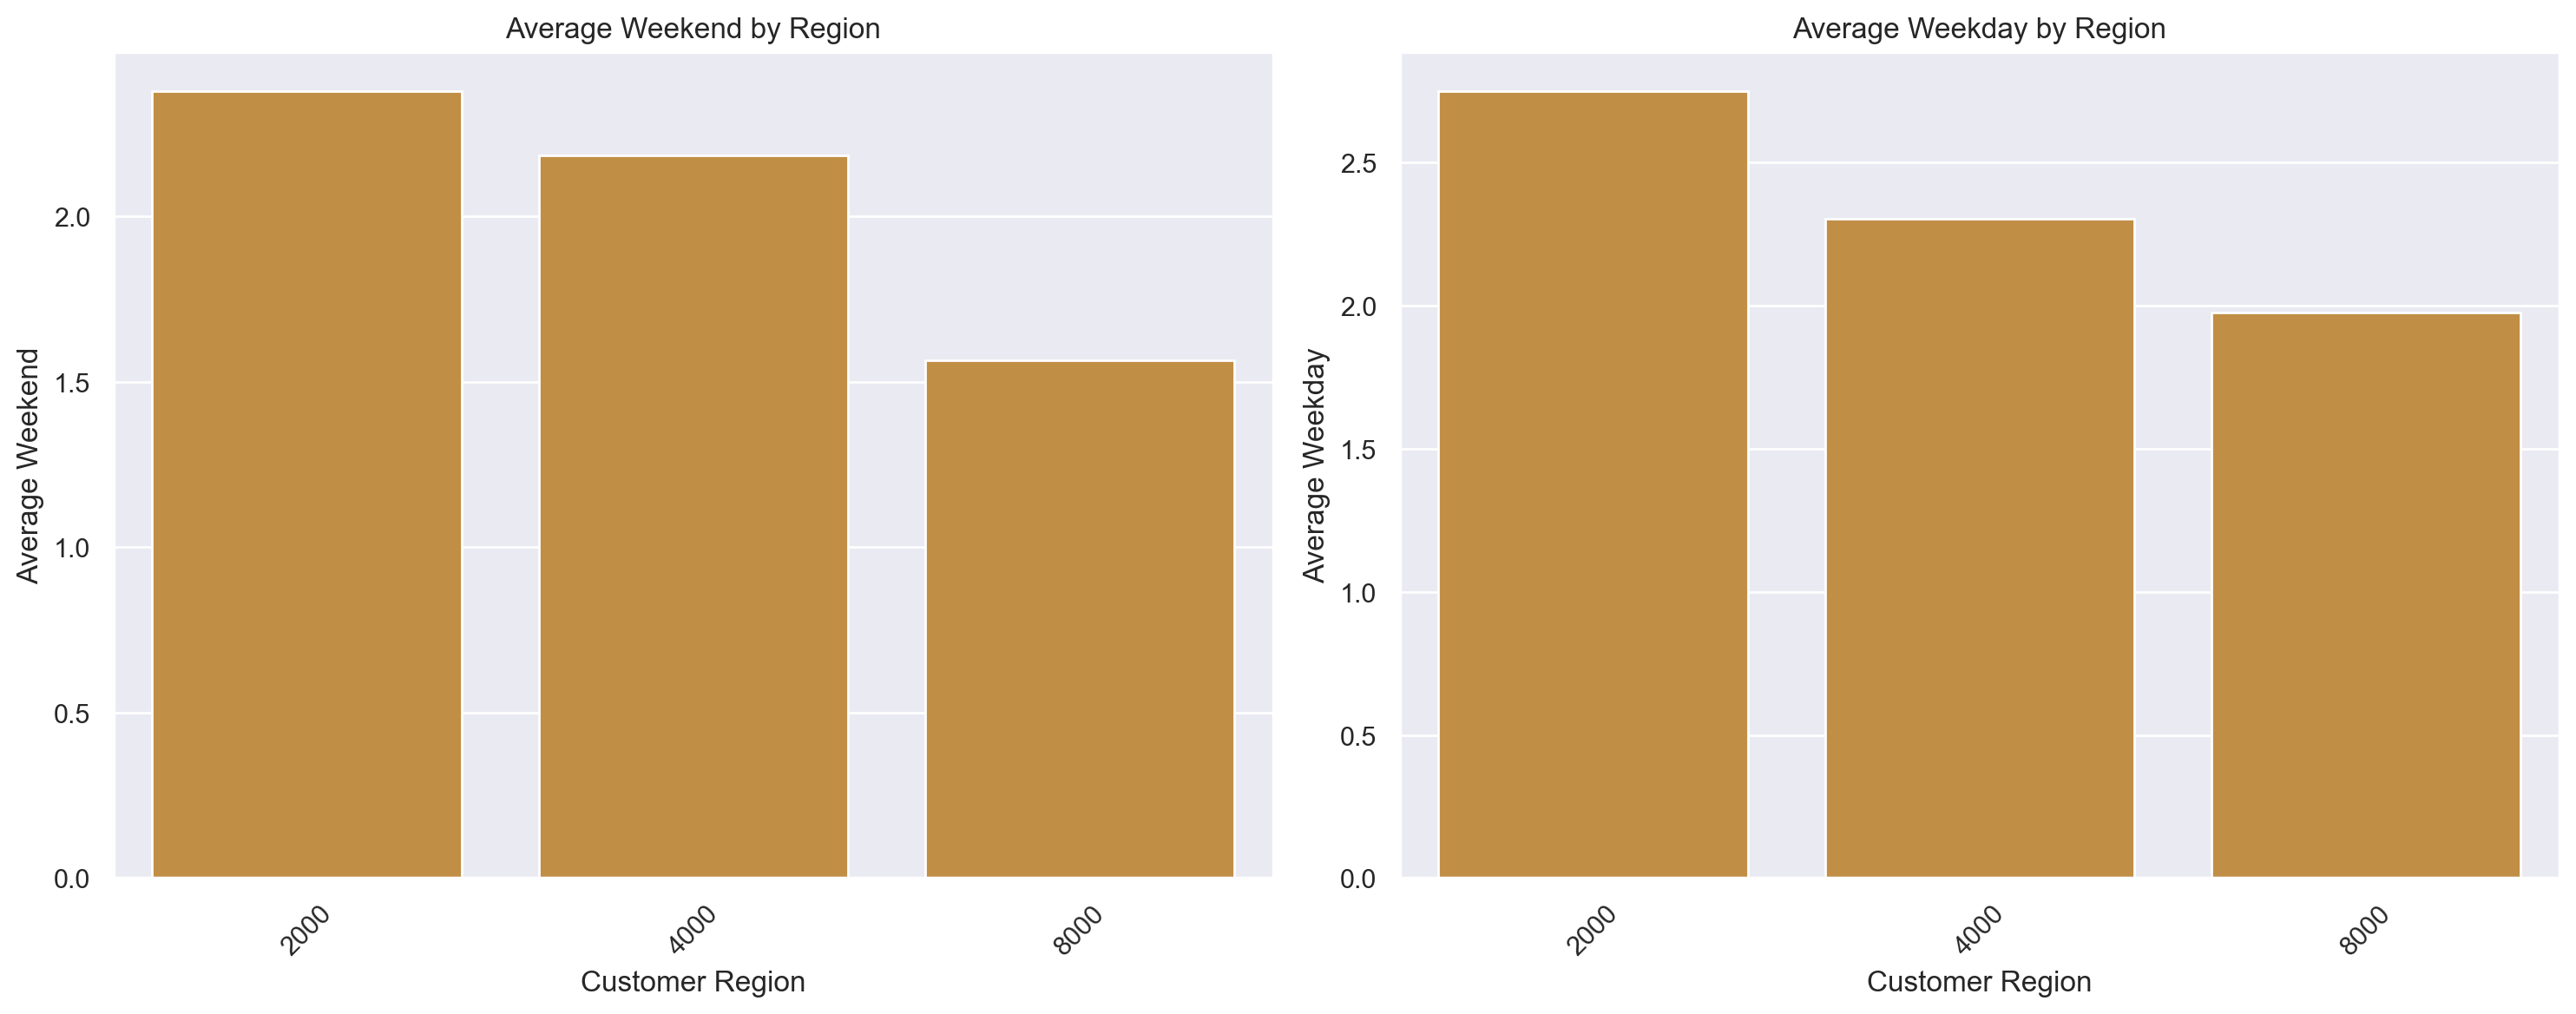

In [317]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

dow_column = ['Weekend', 'Weekday']

for i, col in enumerate(dow_column):
    # Calculate the average for the current column
    avg_data = food_df.groupby('customer_region')[col].mean().reset_index()
    
    sns.barplot(x='customer_region', y=col, data=avg_data, ax=axes[i], color=colors["Y"])
    
    # Set titles and labels
    axes[i].set_title(f'Average {col} by Region')
    axes[i].set_xlabel('Customer Region')
    axes[i].set_ylabel(f'Average {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

> There is no Region what significantly low average in either weekend or weekday.

    Cuisine by customer region

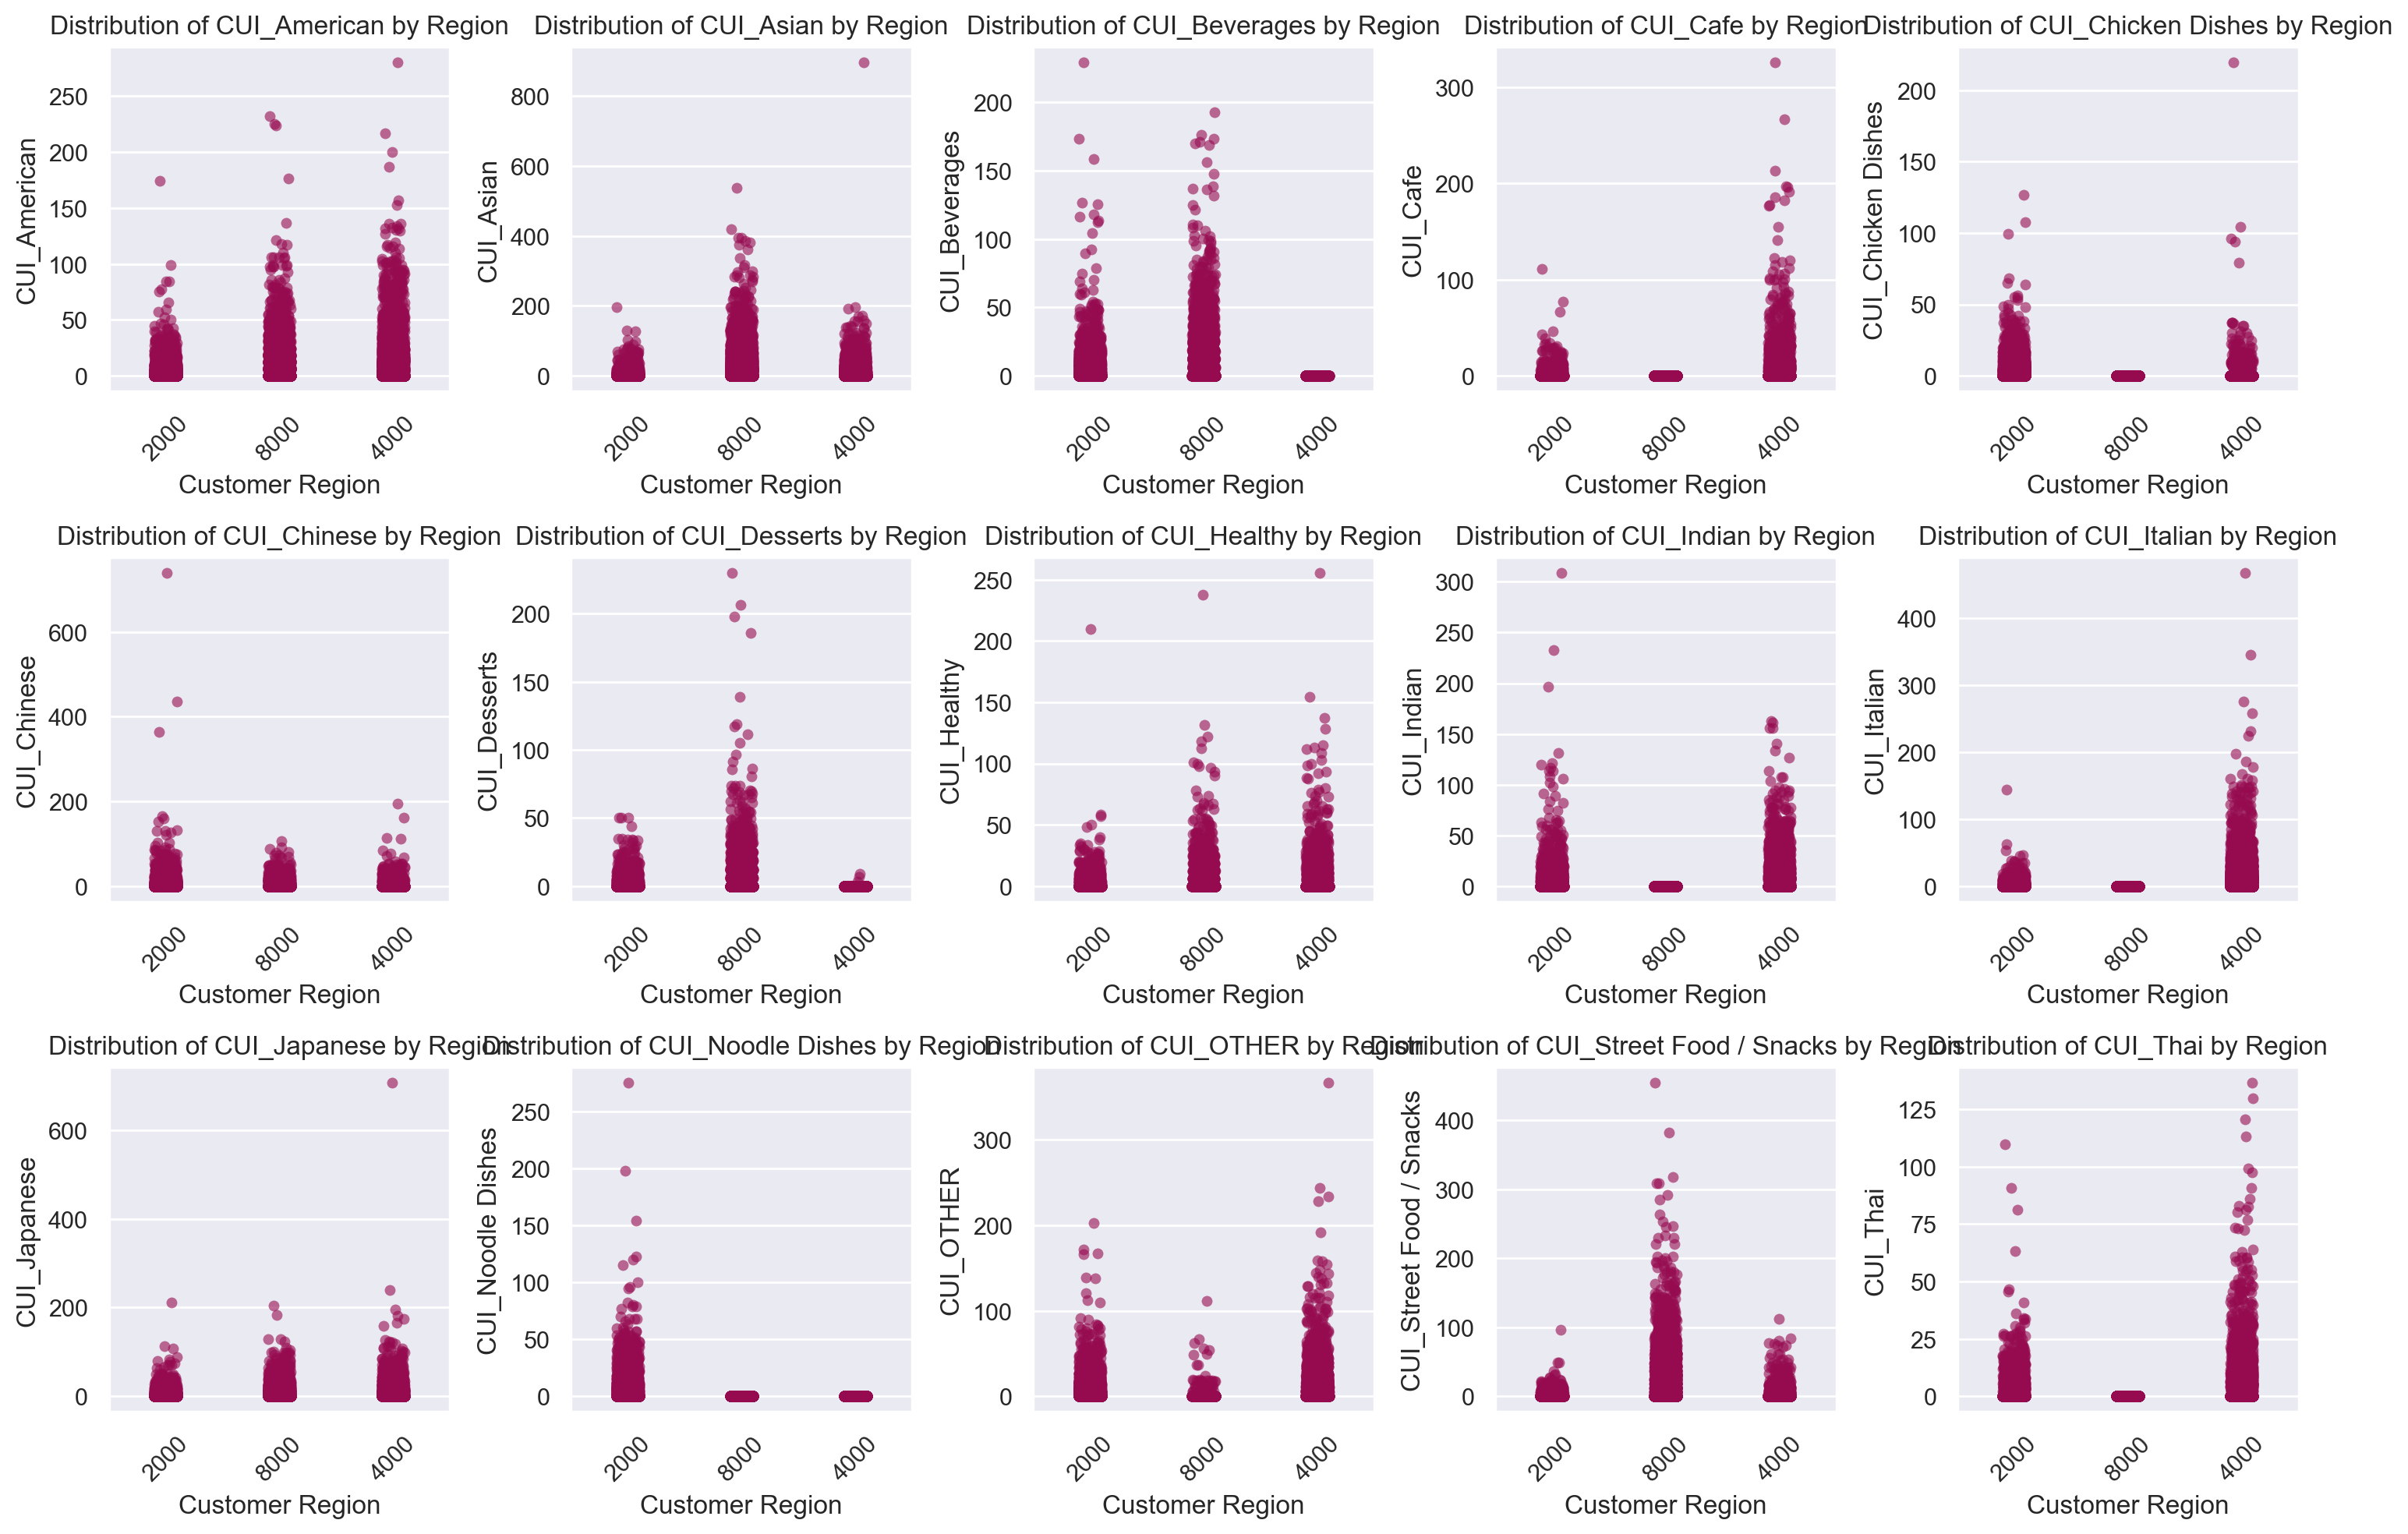

In [210]:
cuisine_columns = [col for col in food_df.columns if col.startswith('CUI_')]

fig, axes = plt.subplots(3, 5, figsize=(15, 10))  

axes = axes.flatten()

for i, cuisine_column in enumerate(cuisine_columns):
    sns.stripplot(x='customer_region', y=cuisine_column, data=food_df, ax=axes[i], jitter=True, color=colors["M"], alpha=0.6)
    
    axes[i].set_title(f'Distribution of {cuisine_column} by Region')
    axes[i].set_xlabel('Customer Region')
    axes[i].set_ylabel(f'{cuisine_column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


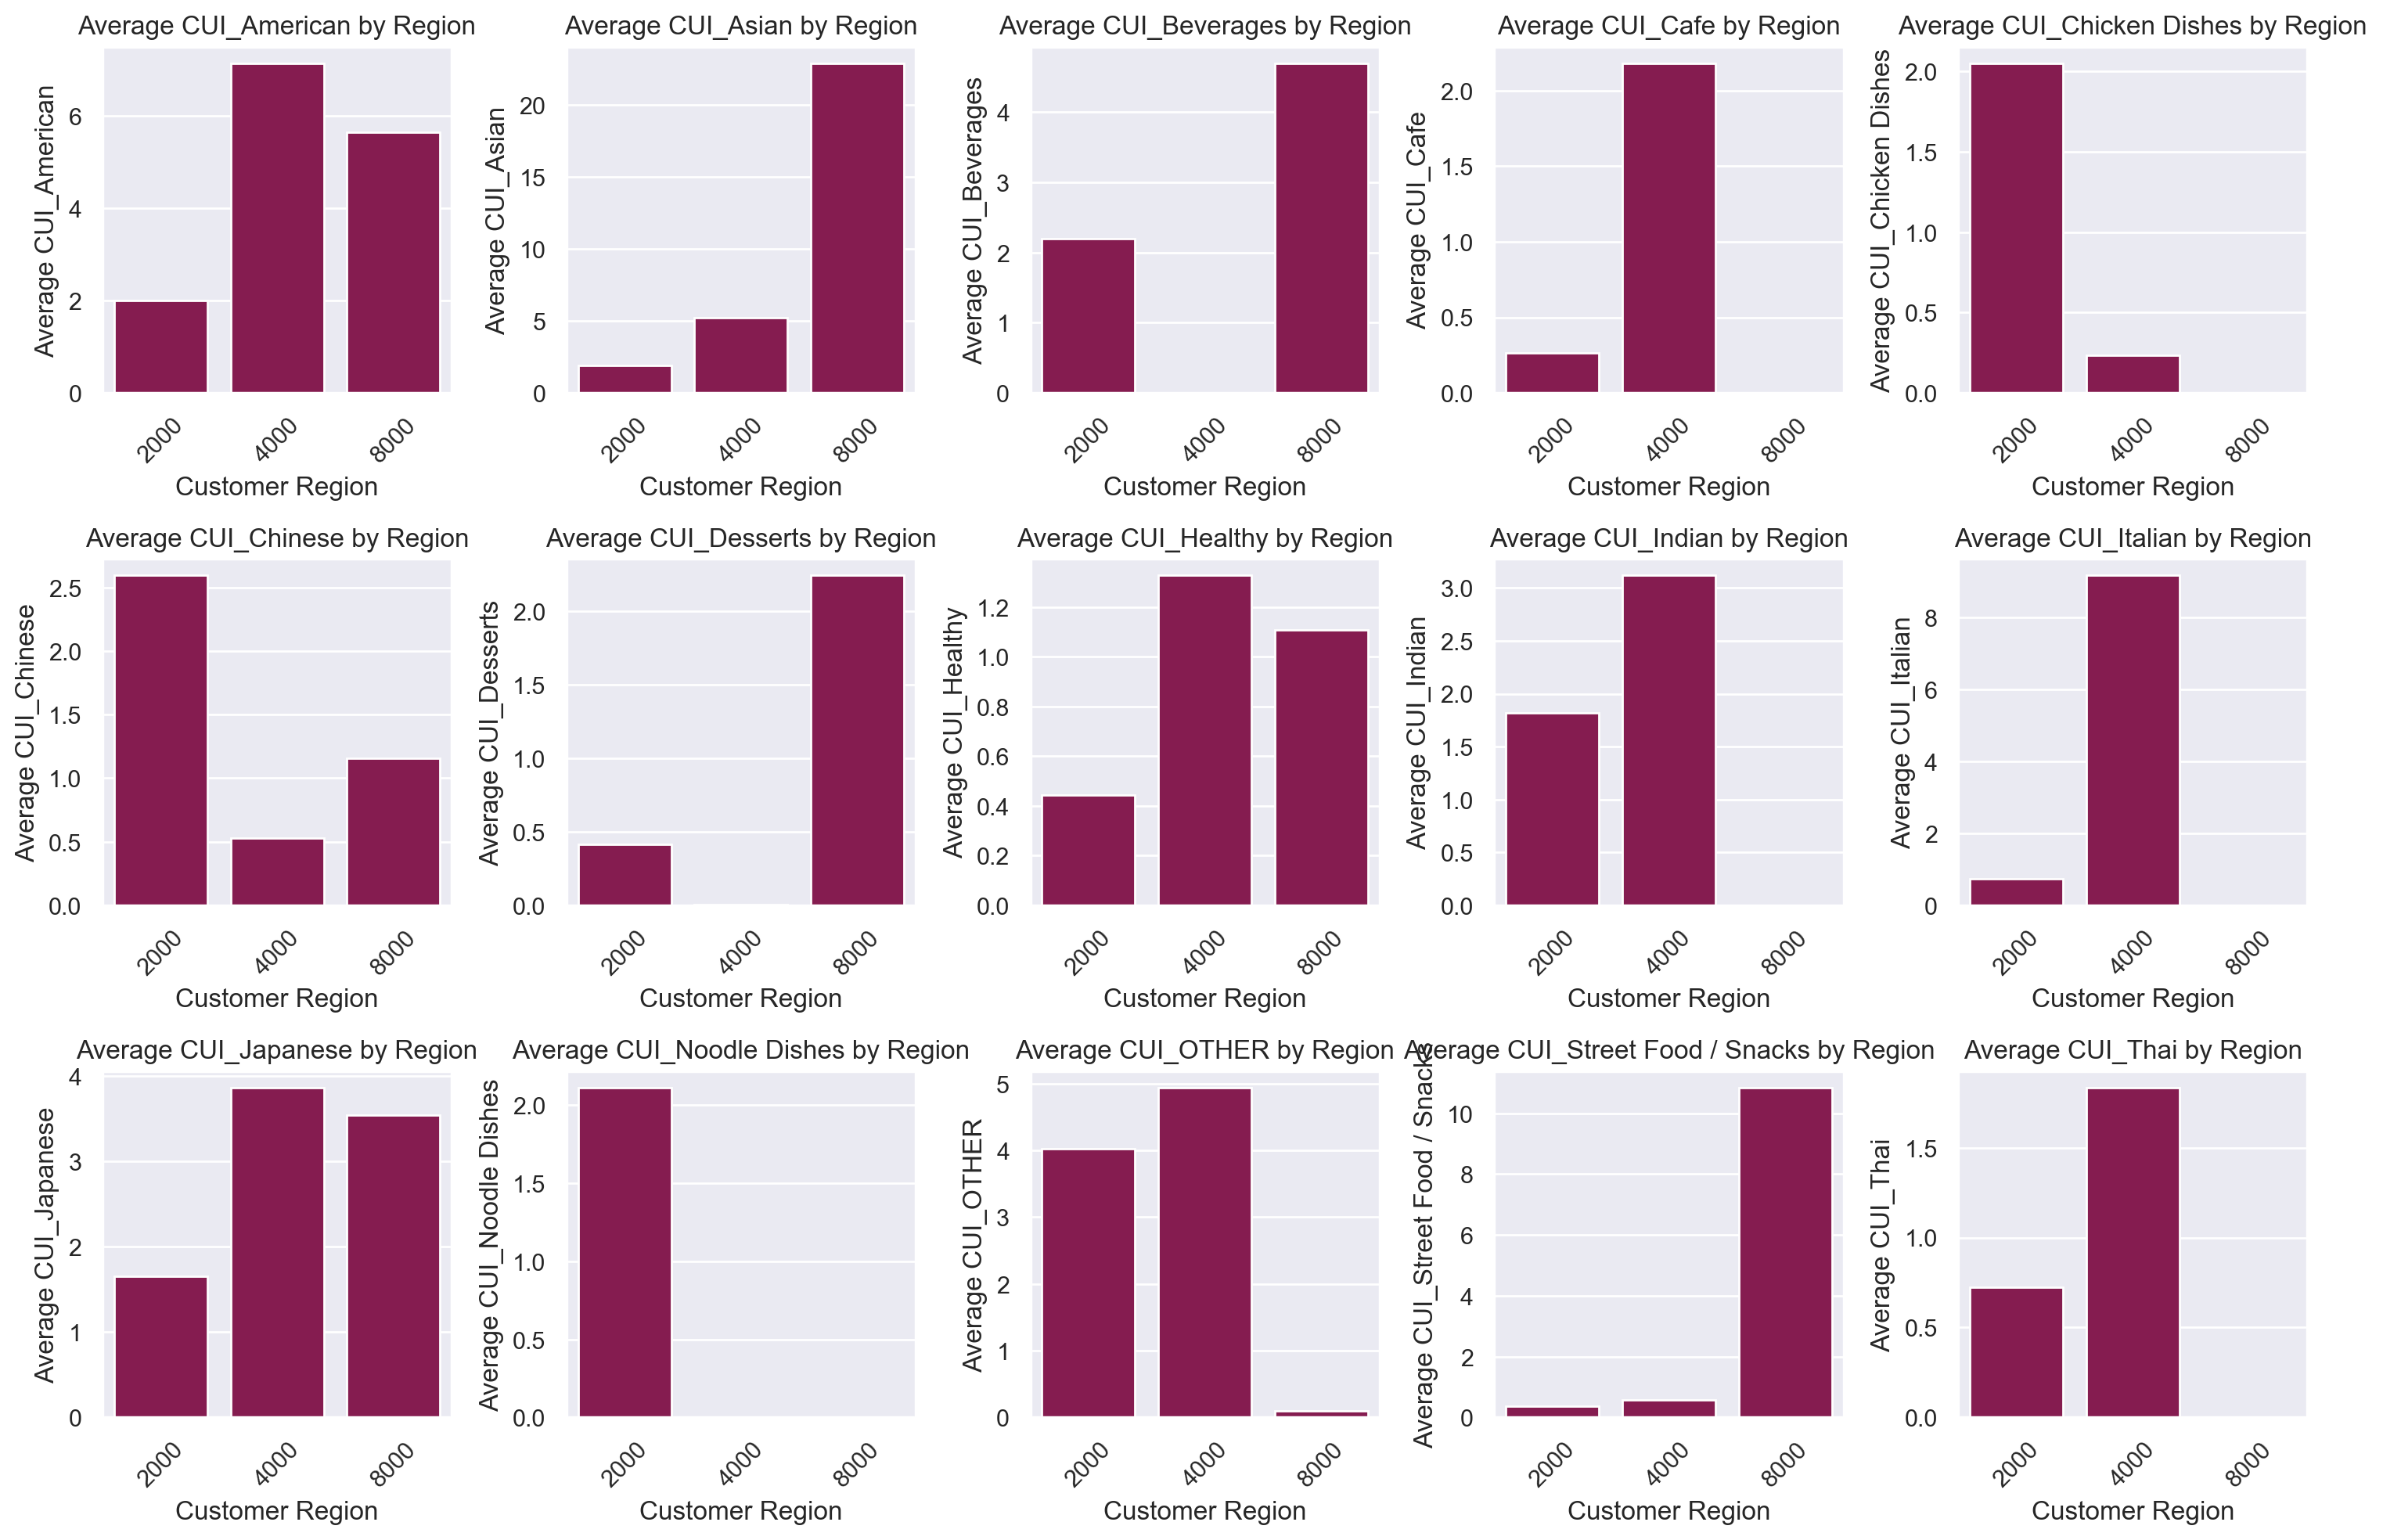

In [320]:
cuisine_columns = [col for col in food_df.columns if col.startswith('CUI_')]

fig, axes = plt.subplots(3, 5, figsize=(15, 10)) 

axes = axes.flatten()

#Running through each cuisine column and create a bar plot for the average value by customer_region
for i, cuisine_column in enumerate(cuisine_columns):
    avg_data = food_df.groupby('customer_region')[cuisine_column].mean().reset_index()
    
    sns.barplot(x='customer_region', y=cuisine_column, data=avg_data, ax=axes[i], color=colors["M"])
    
    axes[i].set_title(f'Average {cuisine_column} by Region')
    axes[i].set_xlabel('Customer Region')
    axes[i].set_ylabel(f'Average {cuisine_column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


> The most popular cuisines are the ones we previously identified.

    HR by Promotion

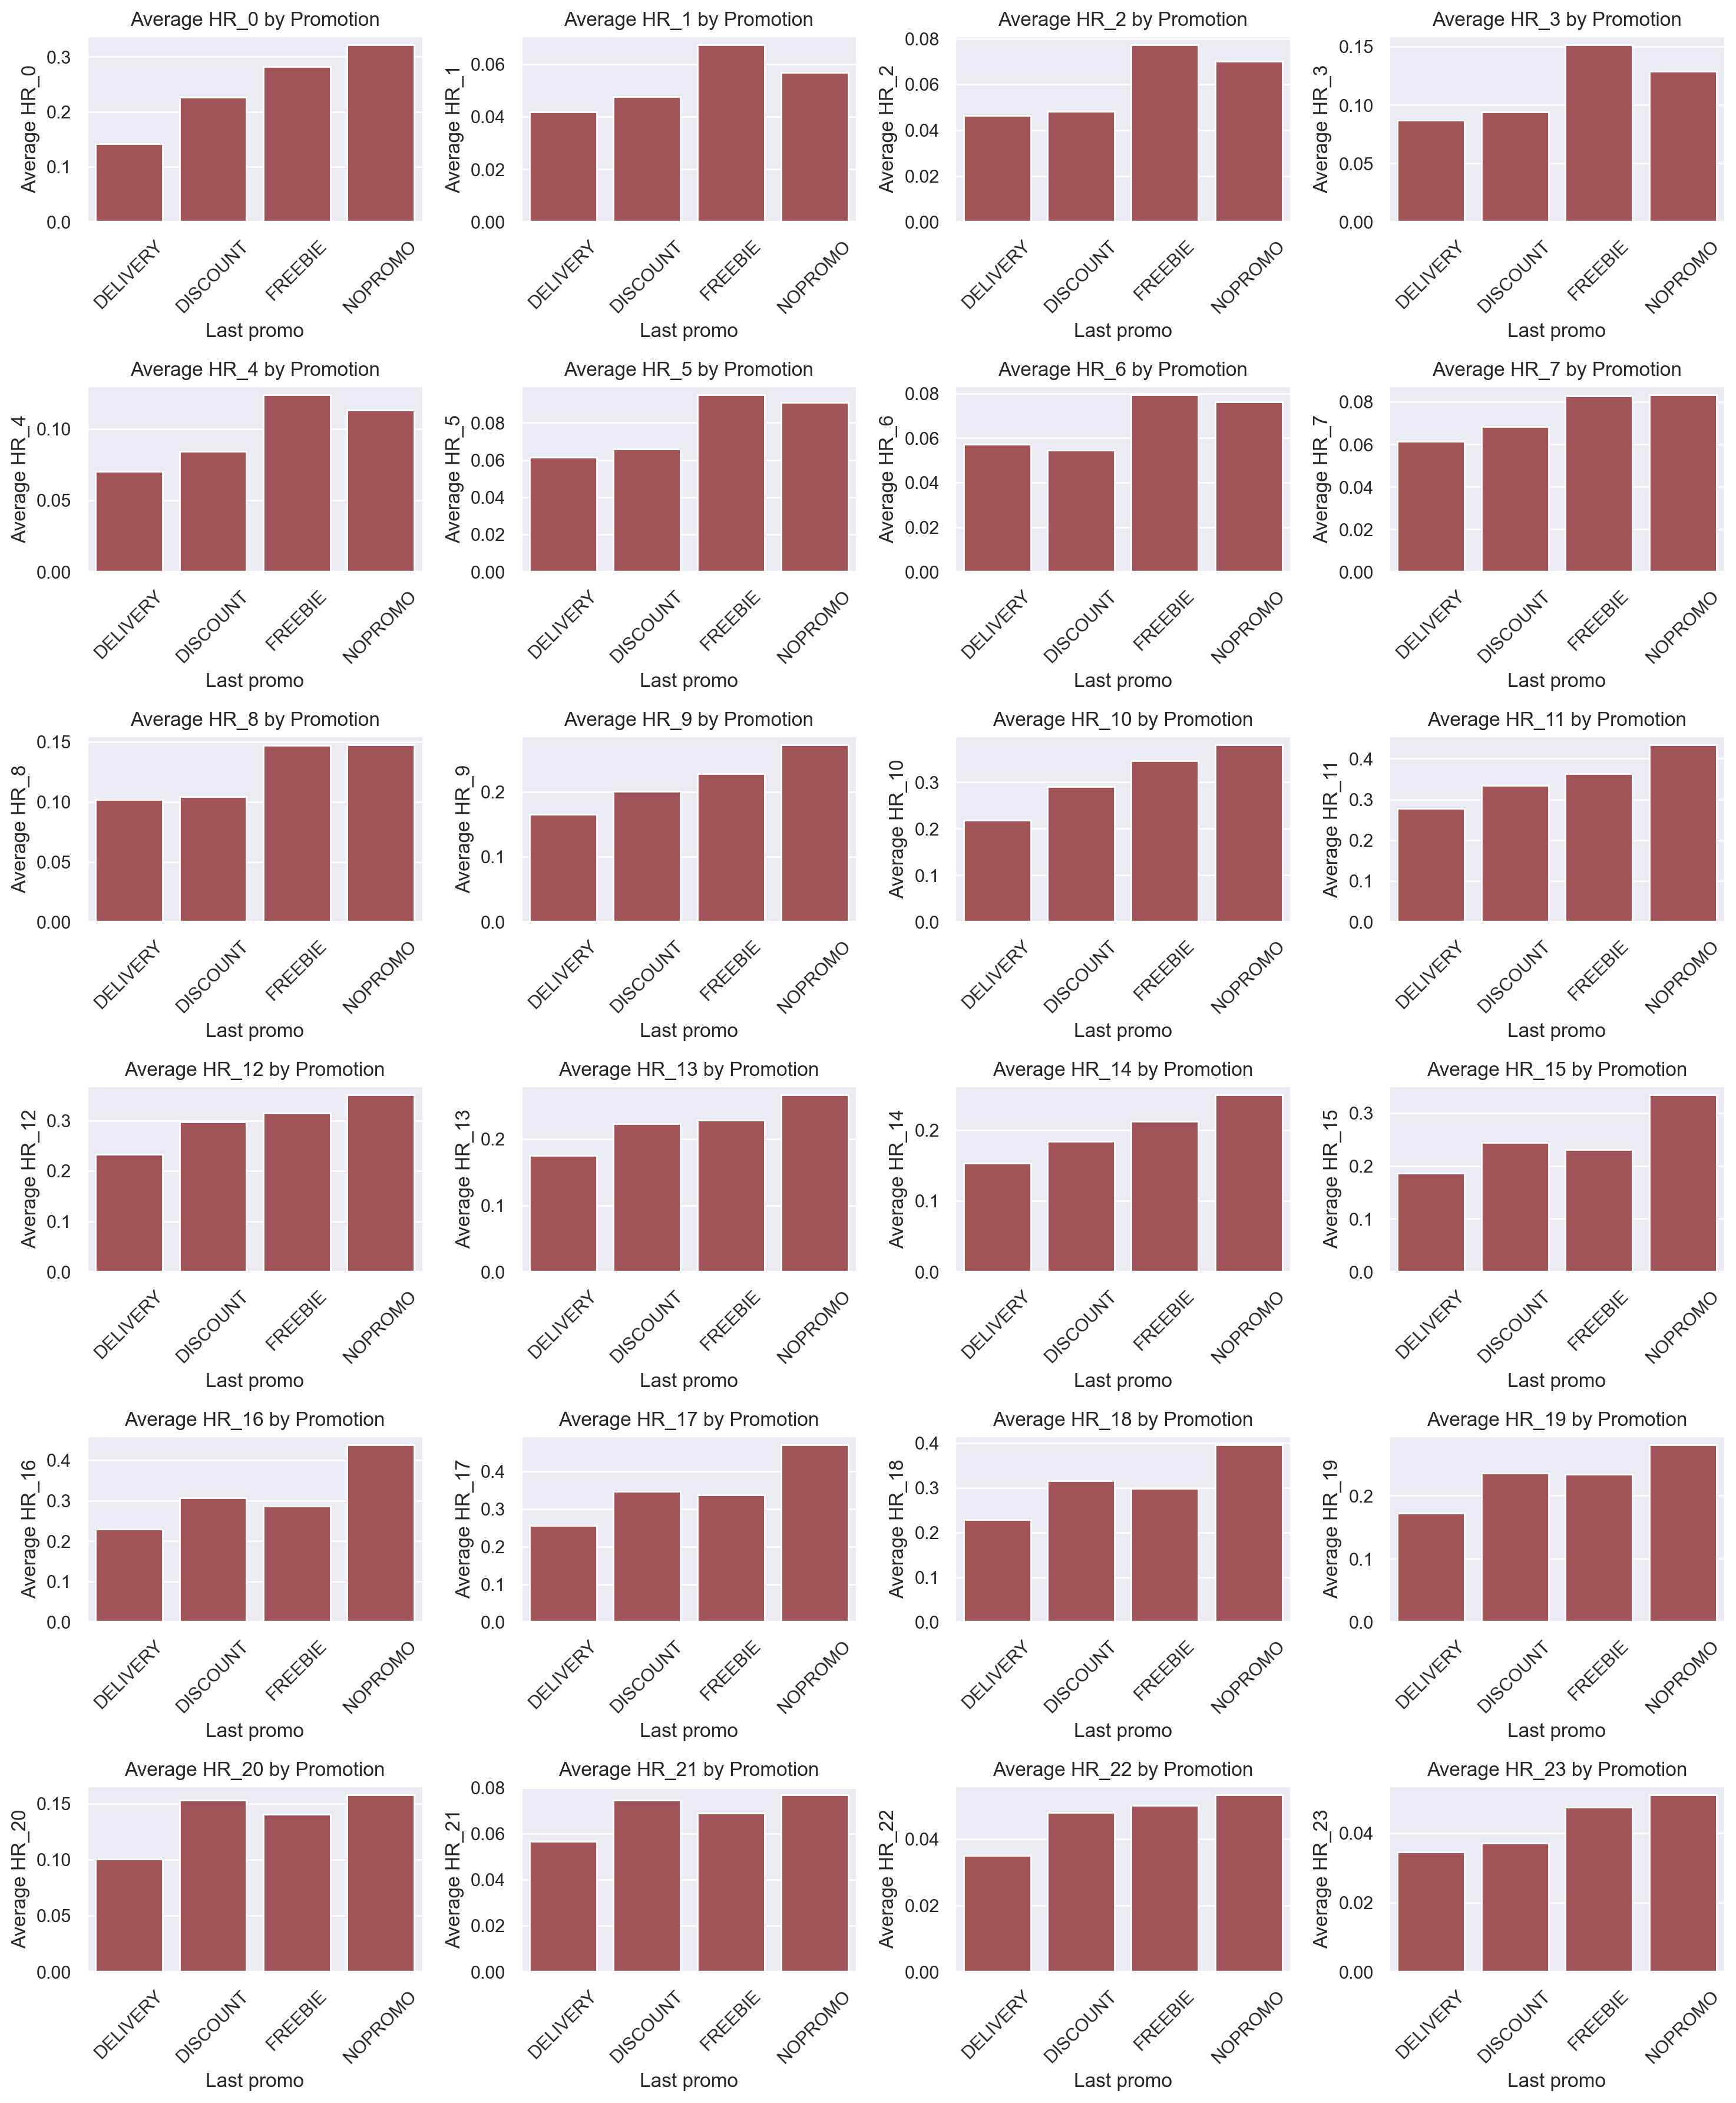

In [212]:
fig, axes = plt.subplots(6, 4, figsize=(15, 18))

axes = axes.flatten()

for i in range(24):
    hr_column = f'HR_{i}'  #making it run through all the HR columns
    avg_data = food_df.groupby('last_promo')[hr_column].mean().reset_index()
    
    sns.barplot(x='last_promo', y=hr_column, data=avg_data, ax=axes[i], color=colors["PR"])
    
    axes[i].set_title(f'Average {hr_column} by Promotion')
    axes[i].set_xlabel('Last promo')
    axes[i].set_ylabel(f'Average {hr_column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

> As we have observed previously, the "NOPROMO" category has the highest entries. <br> 
> From 1am-6am, the highest PROMO is FREEBIE.

    DOW by Promotion

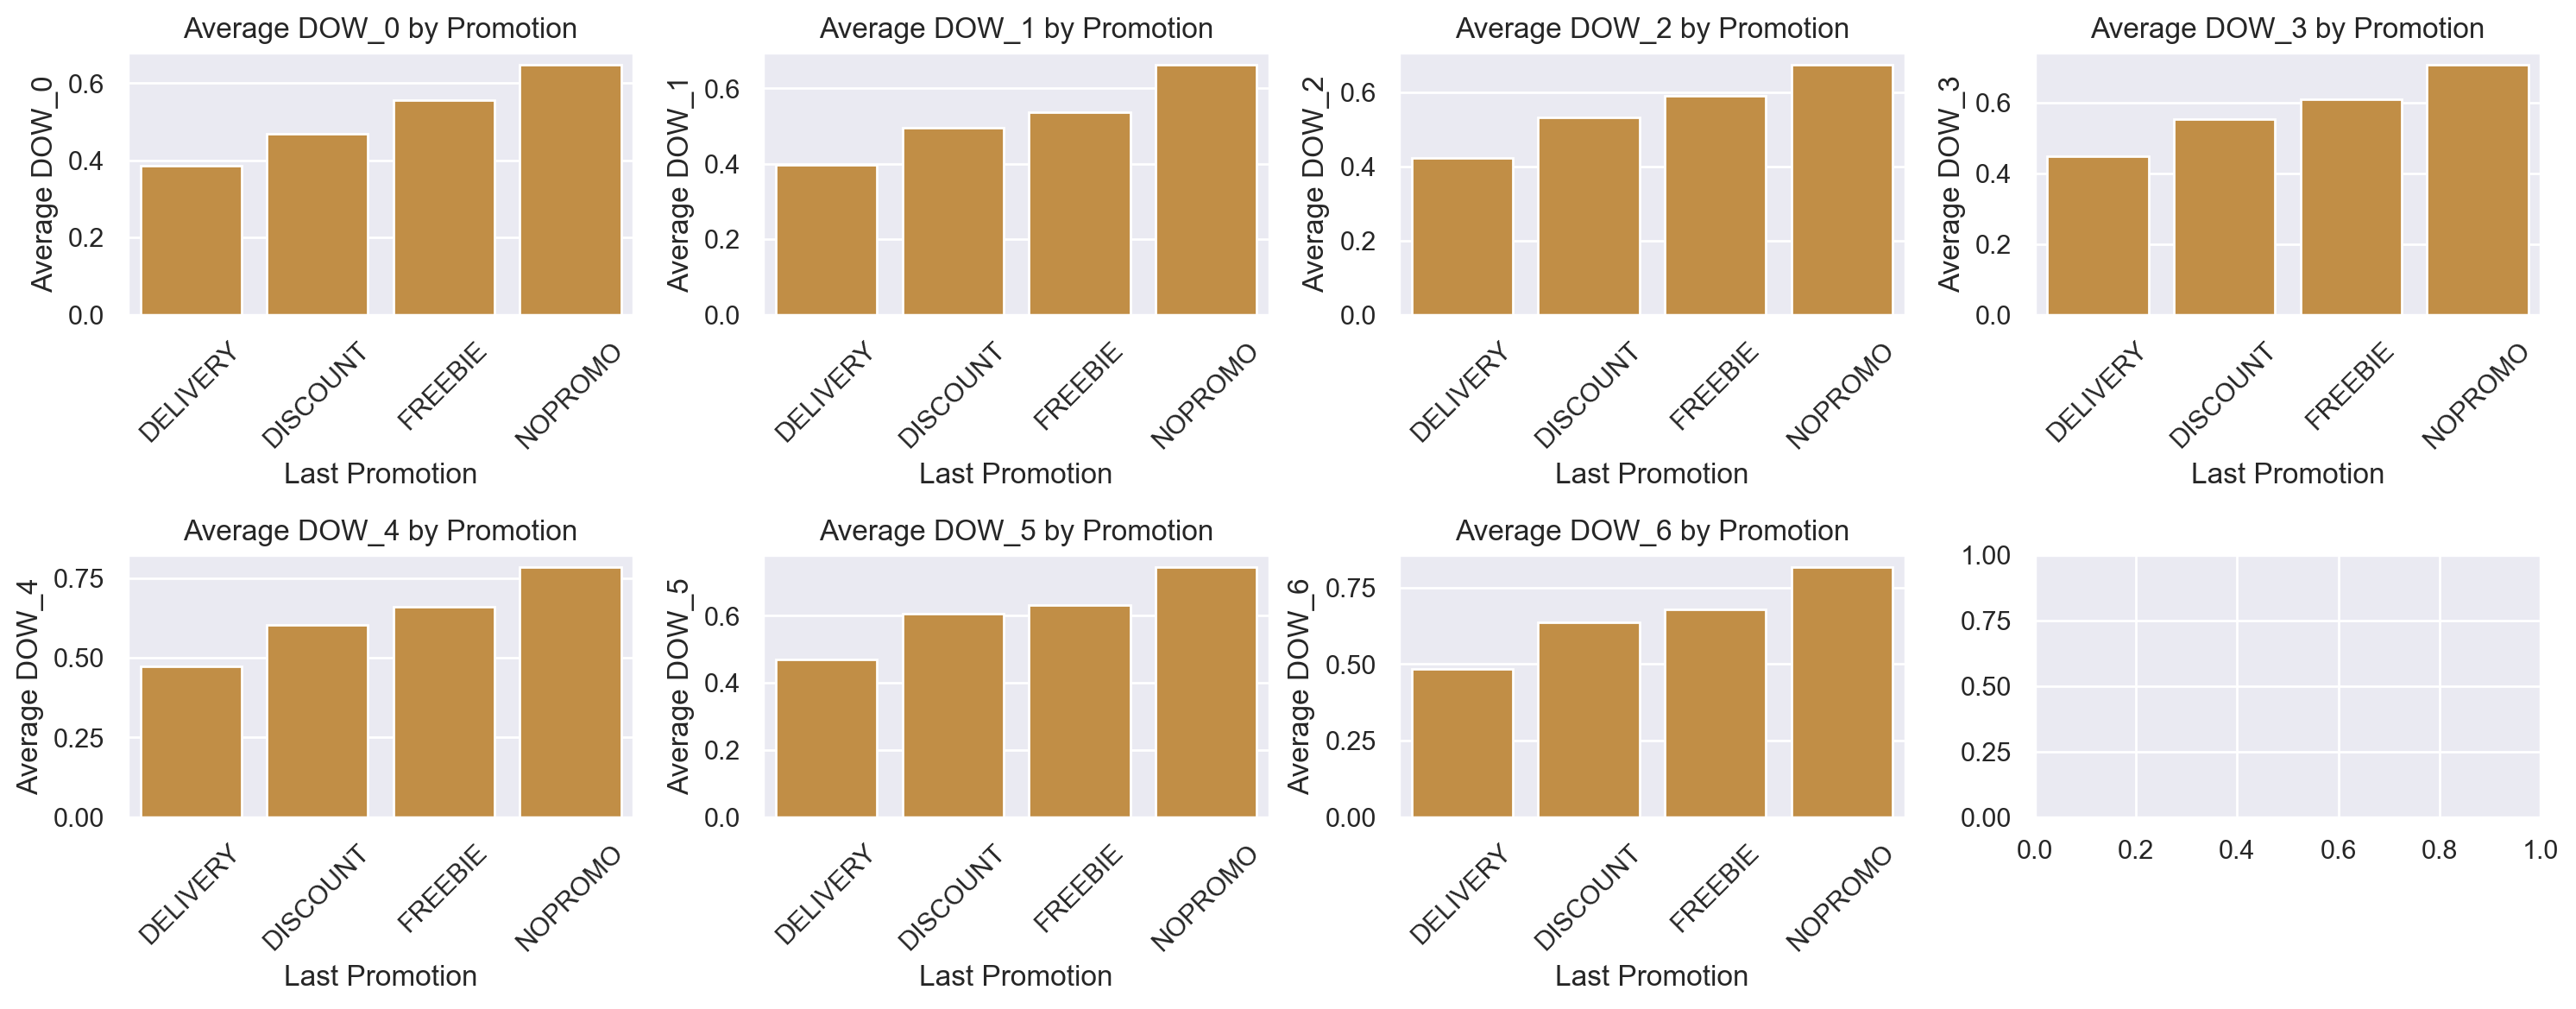

In [213]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))

axes = axes.flatten()

for i in range(7):
    dow_column = f'DOW_{i}'  #making it run through all the dow columns
    avg_data = food_df.groupby('last_promo')[dow_column].mean().reset_index()
    
    sns.barplot(x='last_promo', y=dow_column, data=avg_data, ax=axes[i], color=colors["Y"])
    
    axes[i].set_title(f'Average {dow_column} by Promotion')
    axes[i].set_xlabel('Last Promotion')
    axes[i].set_ylabel(f'Average {dow_column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

> For the Days of the Week, there are no apparent changes in the promotion categories, having "NOPROMO" wiht the highest average for each day and "DELIVERY" with the lowest.

    Cuisine by Promotion

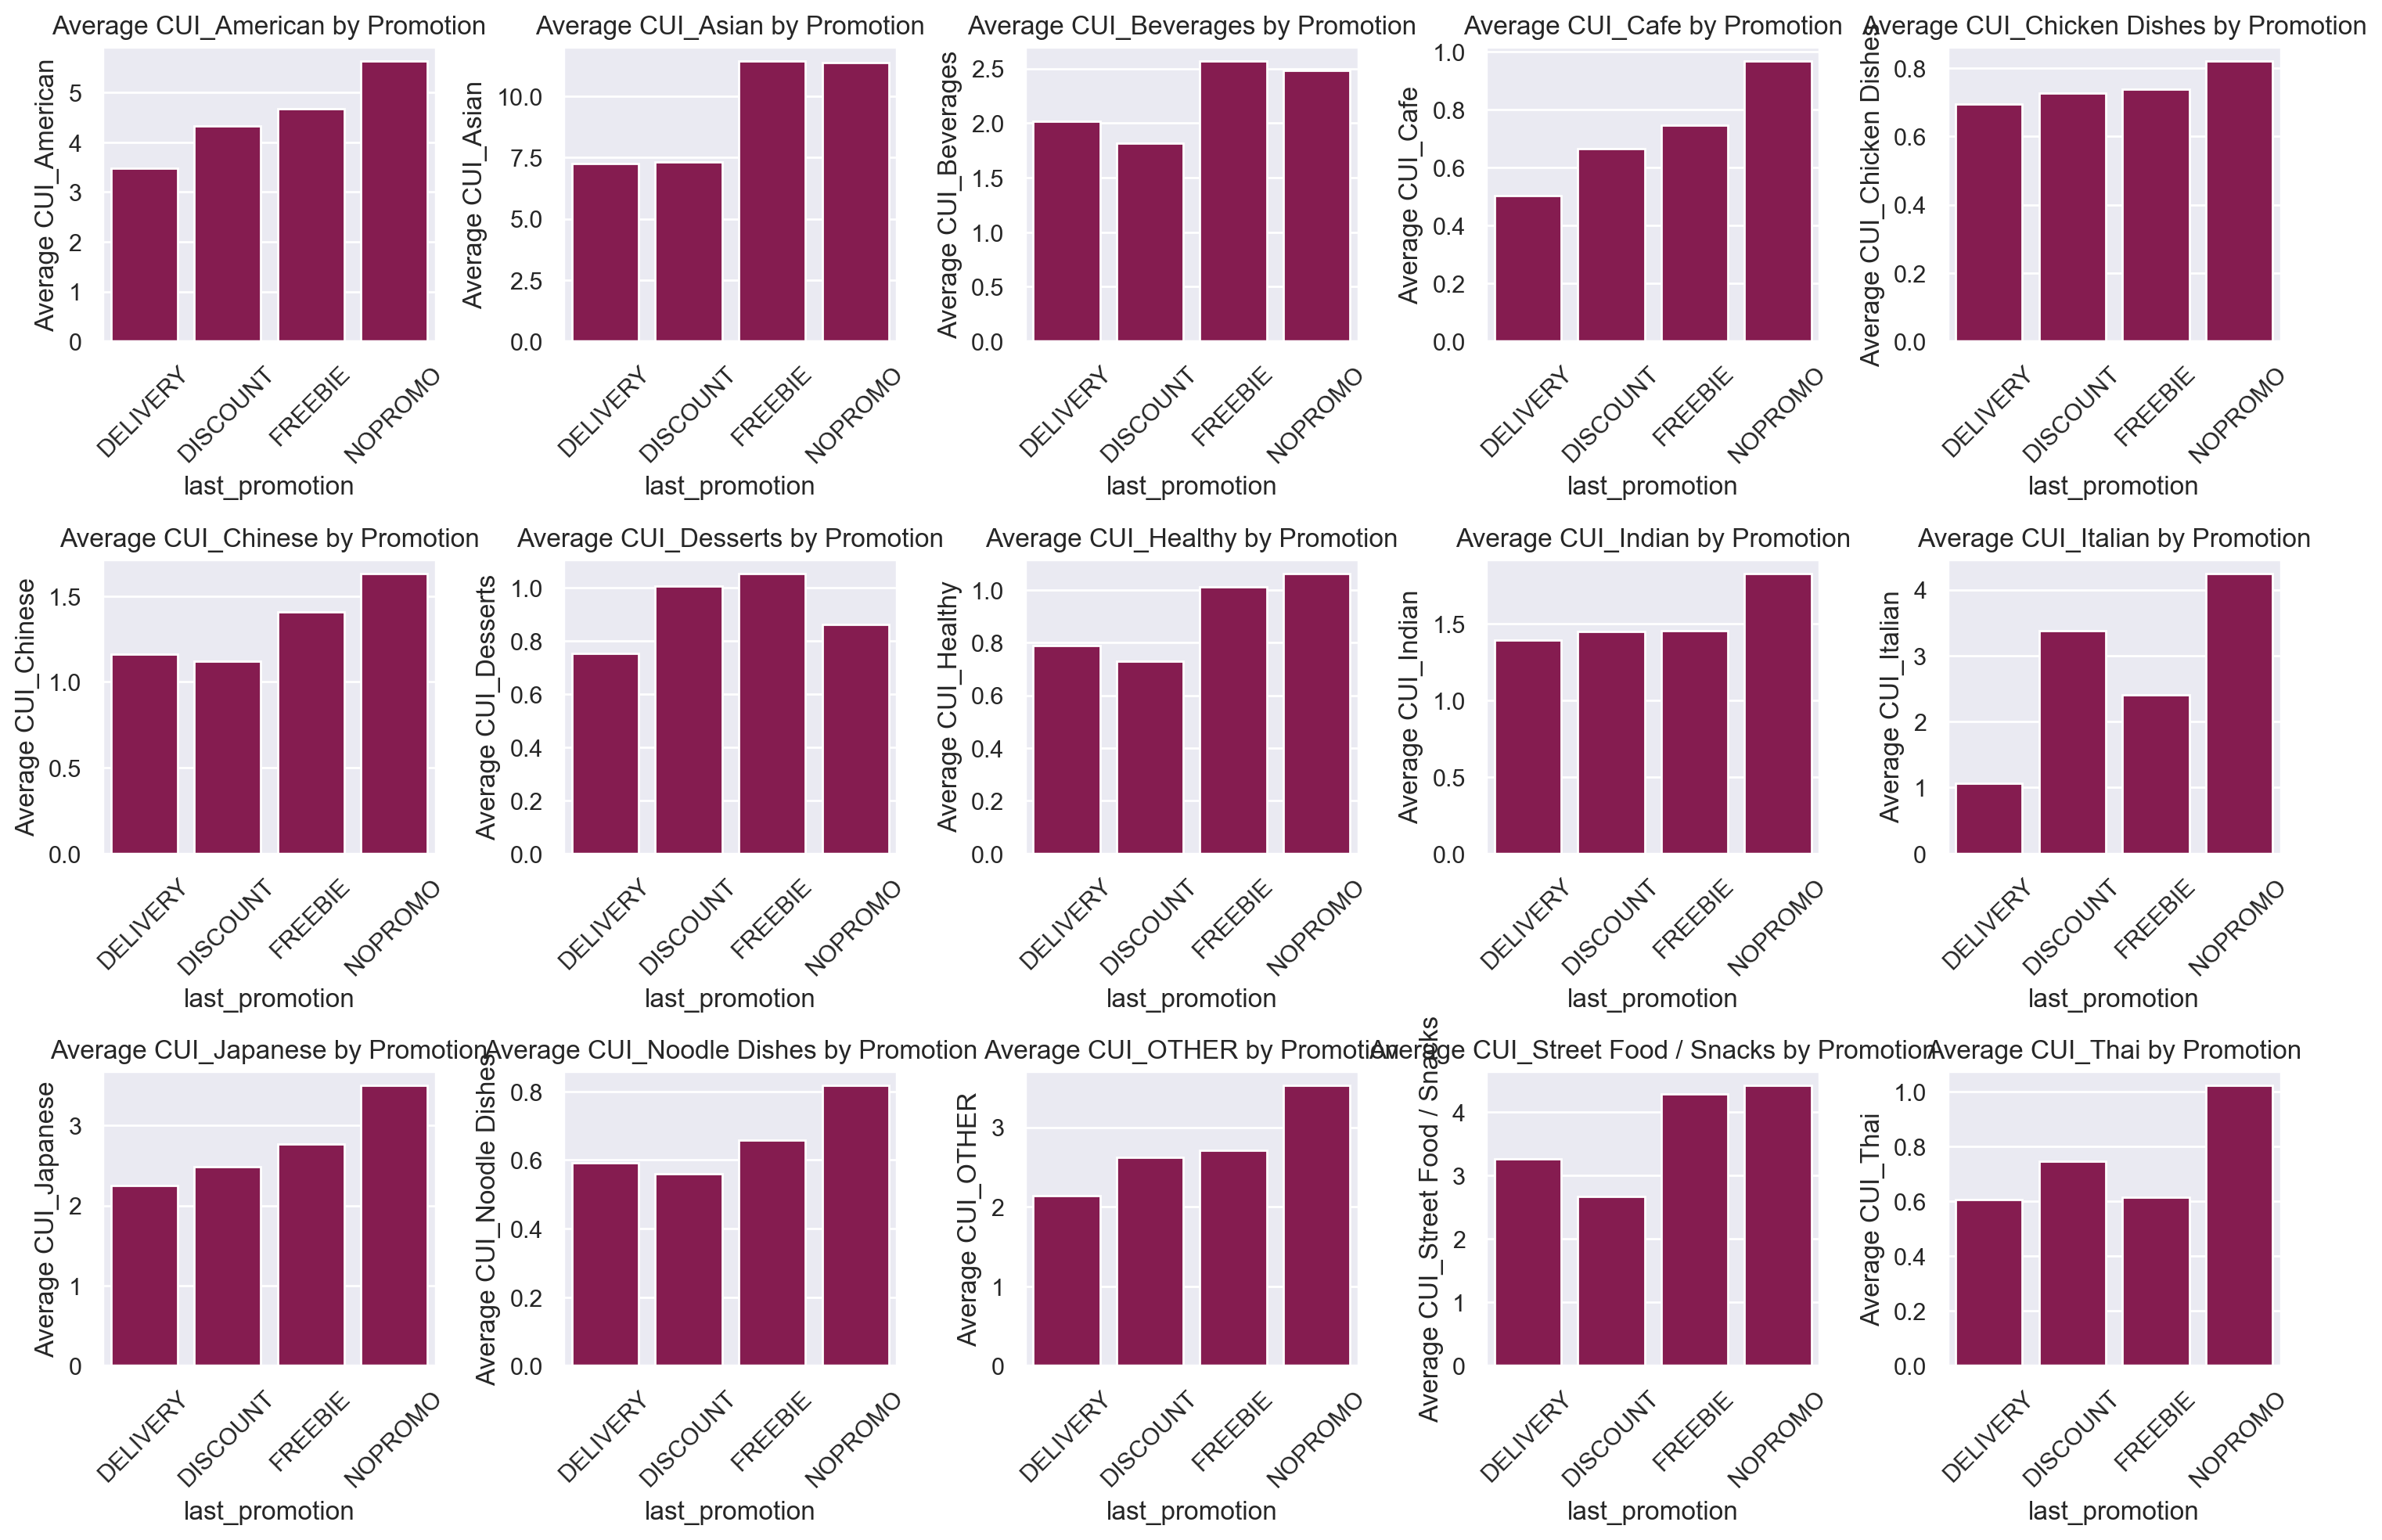

In [214]:
cuisine_columns = [col for col in food_df.columns if col.startswith('CUI_')]

fig, axes = plt.subplots(3, 5, figsize=(15, 10))

axes = axes.flatten()

for i, cuisine_column in enumerate(cuisine_columns):
    avg_data = food_df.groupby('last_promo')[cuisine_column].mean().reset_index()
    
    sns.barplot(x='last_promo', y=cuisine_column, data=avg_data, ax=axes[i], color=colors["M"])
    
    axes[i].set_title(f'Average {cuisine_column} by Promotion')
    axes[i].set_xlabel('last_promotion')
    axes[i].set_ylabel(f'Average {cuisine_column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

> "FREEBIE" in promotion is relatively higher then the other categories, in the following cuisines: CUI_Asian, CUI_Beverages AND CUI_Desserts; but it is the second lowest in the CUI_Italian cuisine.

    HR by Payment method

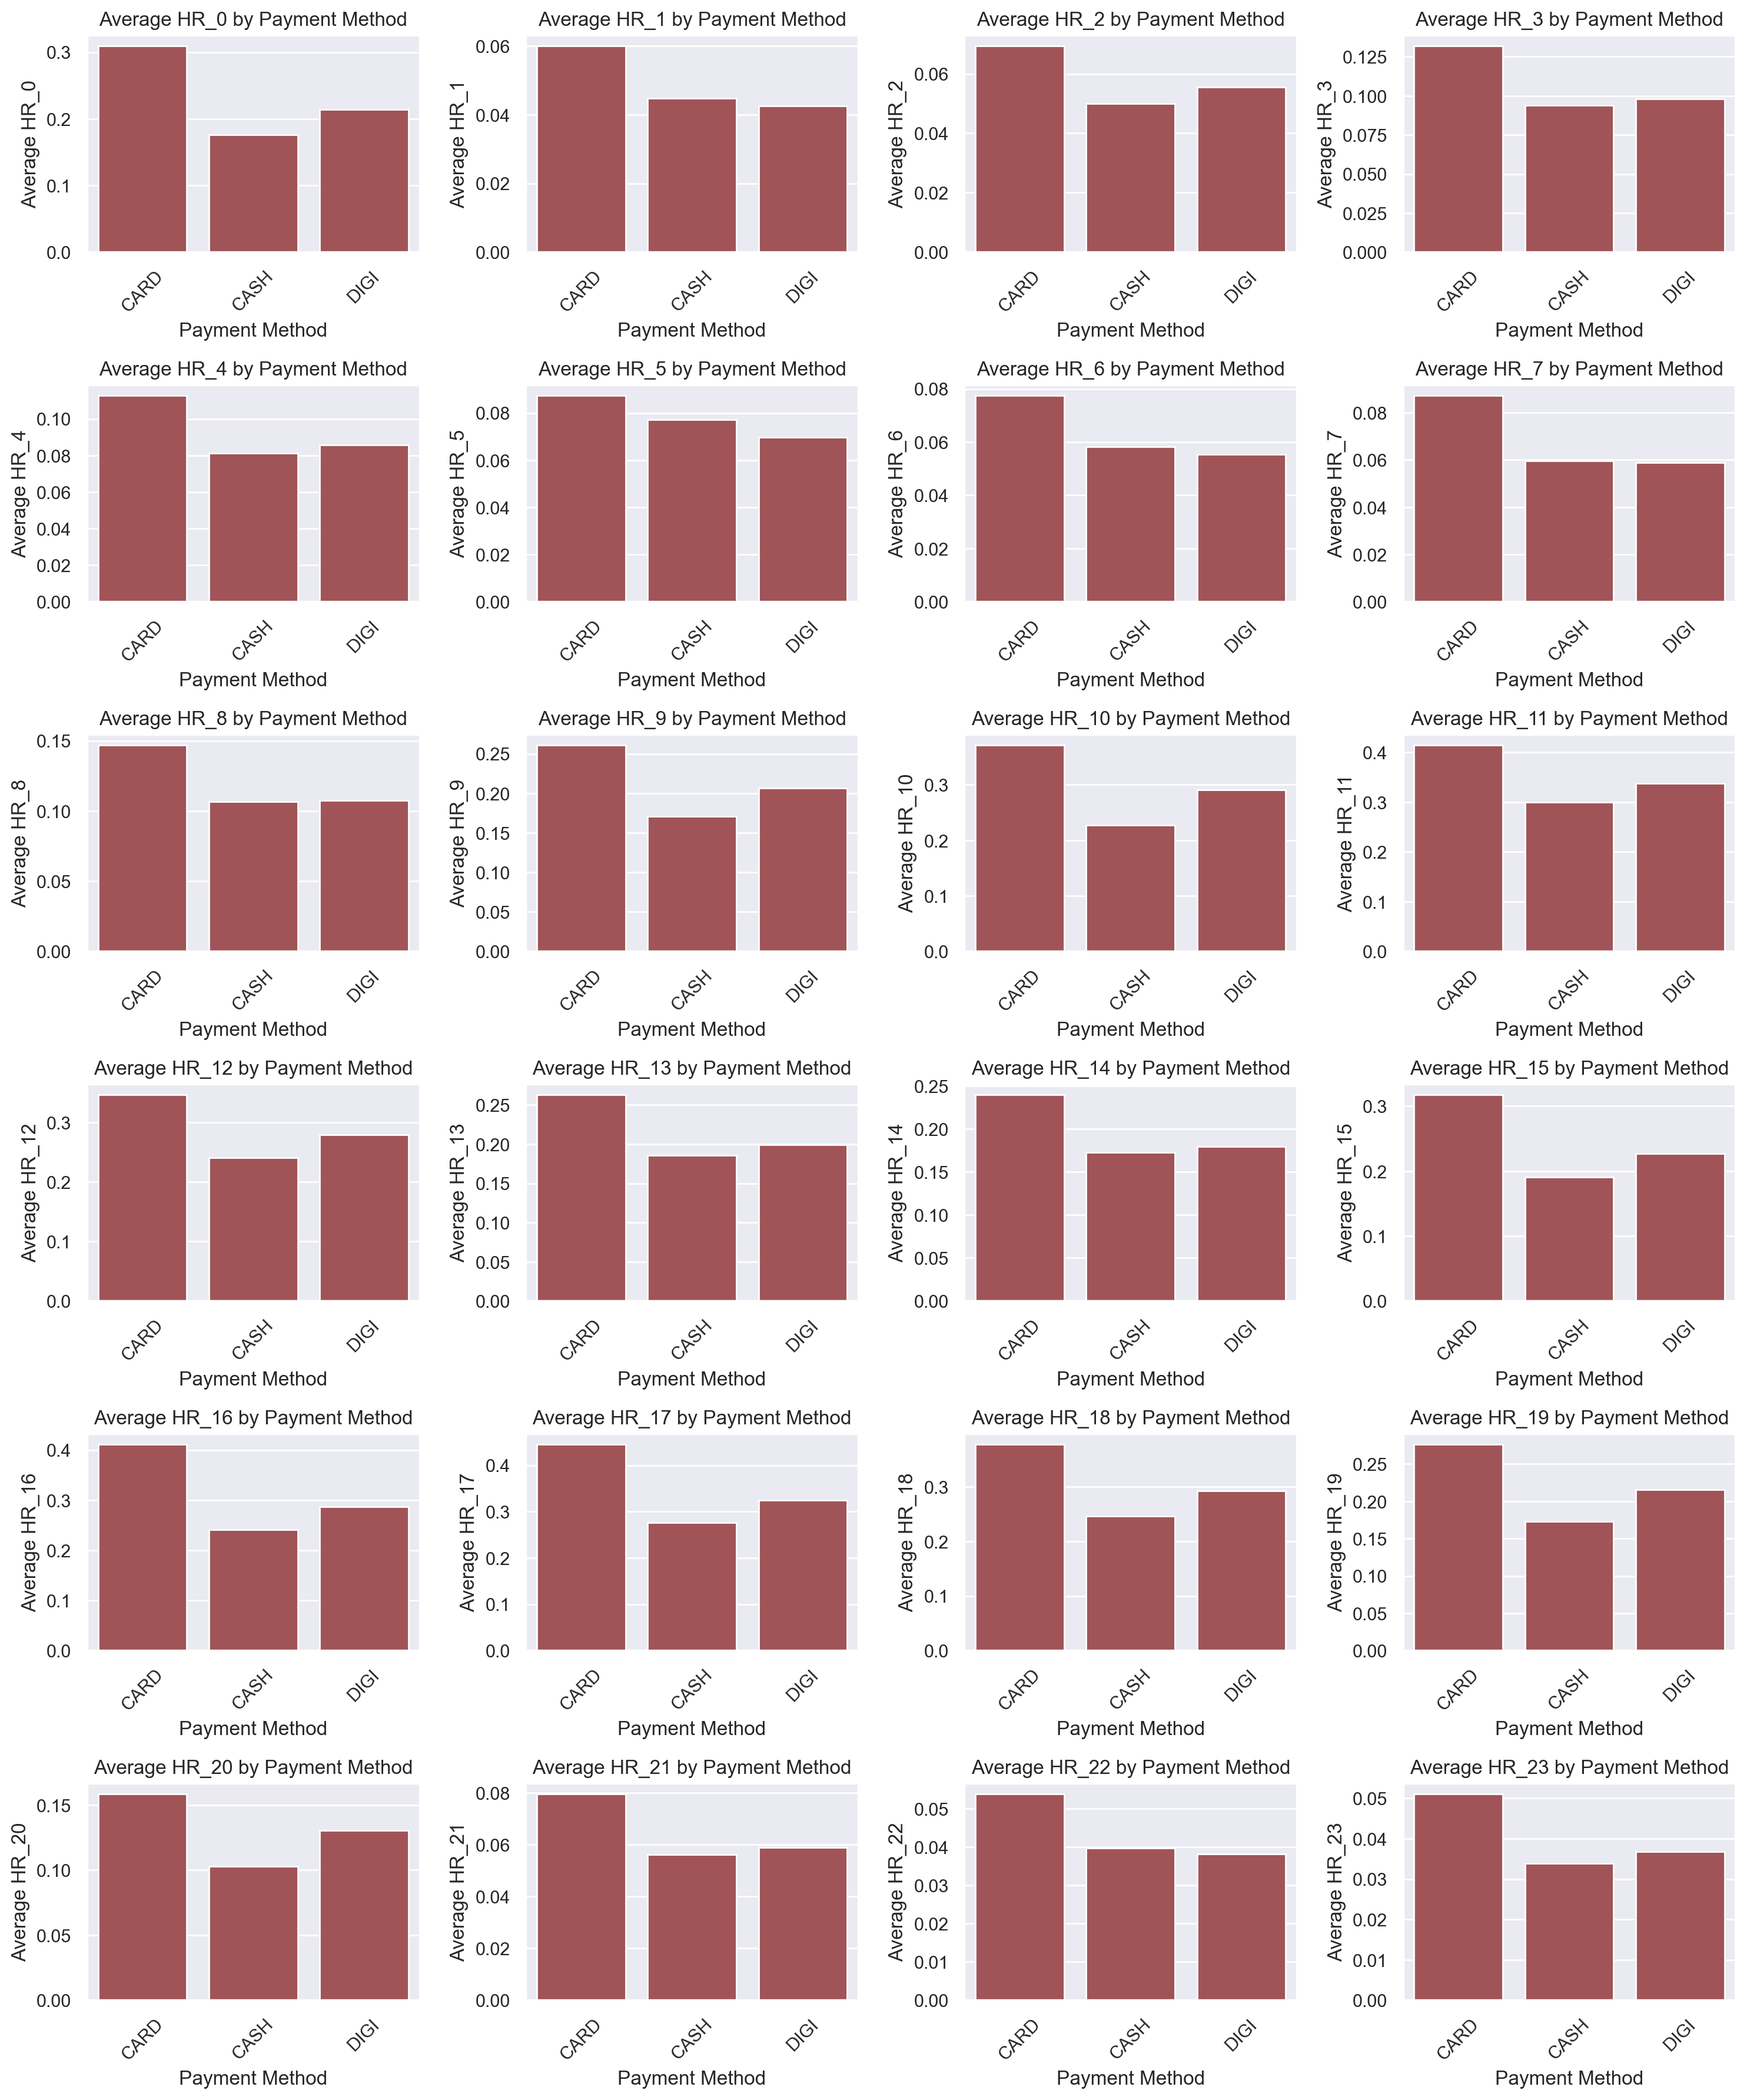

In [215]:
fig, axes = plt.subplots(6, 4, figsize=(15, 18))

axes = axes.flatten()

for i in range(24):
    hr_column = f'HR_{i}'  #making it run through all the HR columns
    avg_data = food_df.groupby('payment_method')[hr_column].mean().reset_index()
    
    sns.barplot(x='payment_method', y=hr_column, data=avg_data, ax=axes[i], color=colors["PR"])
    
    axes[i].set_title(f'Average {hr_column} by Payment Method')
    axes[i].set_xlabel('Payment Method')
    axes[i].set_ylabel(f'Average {hr_column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

> The Payment method does not differ significantly for the HR columns, maintaining pretty close habits.

    DOW by Payment Method

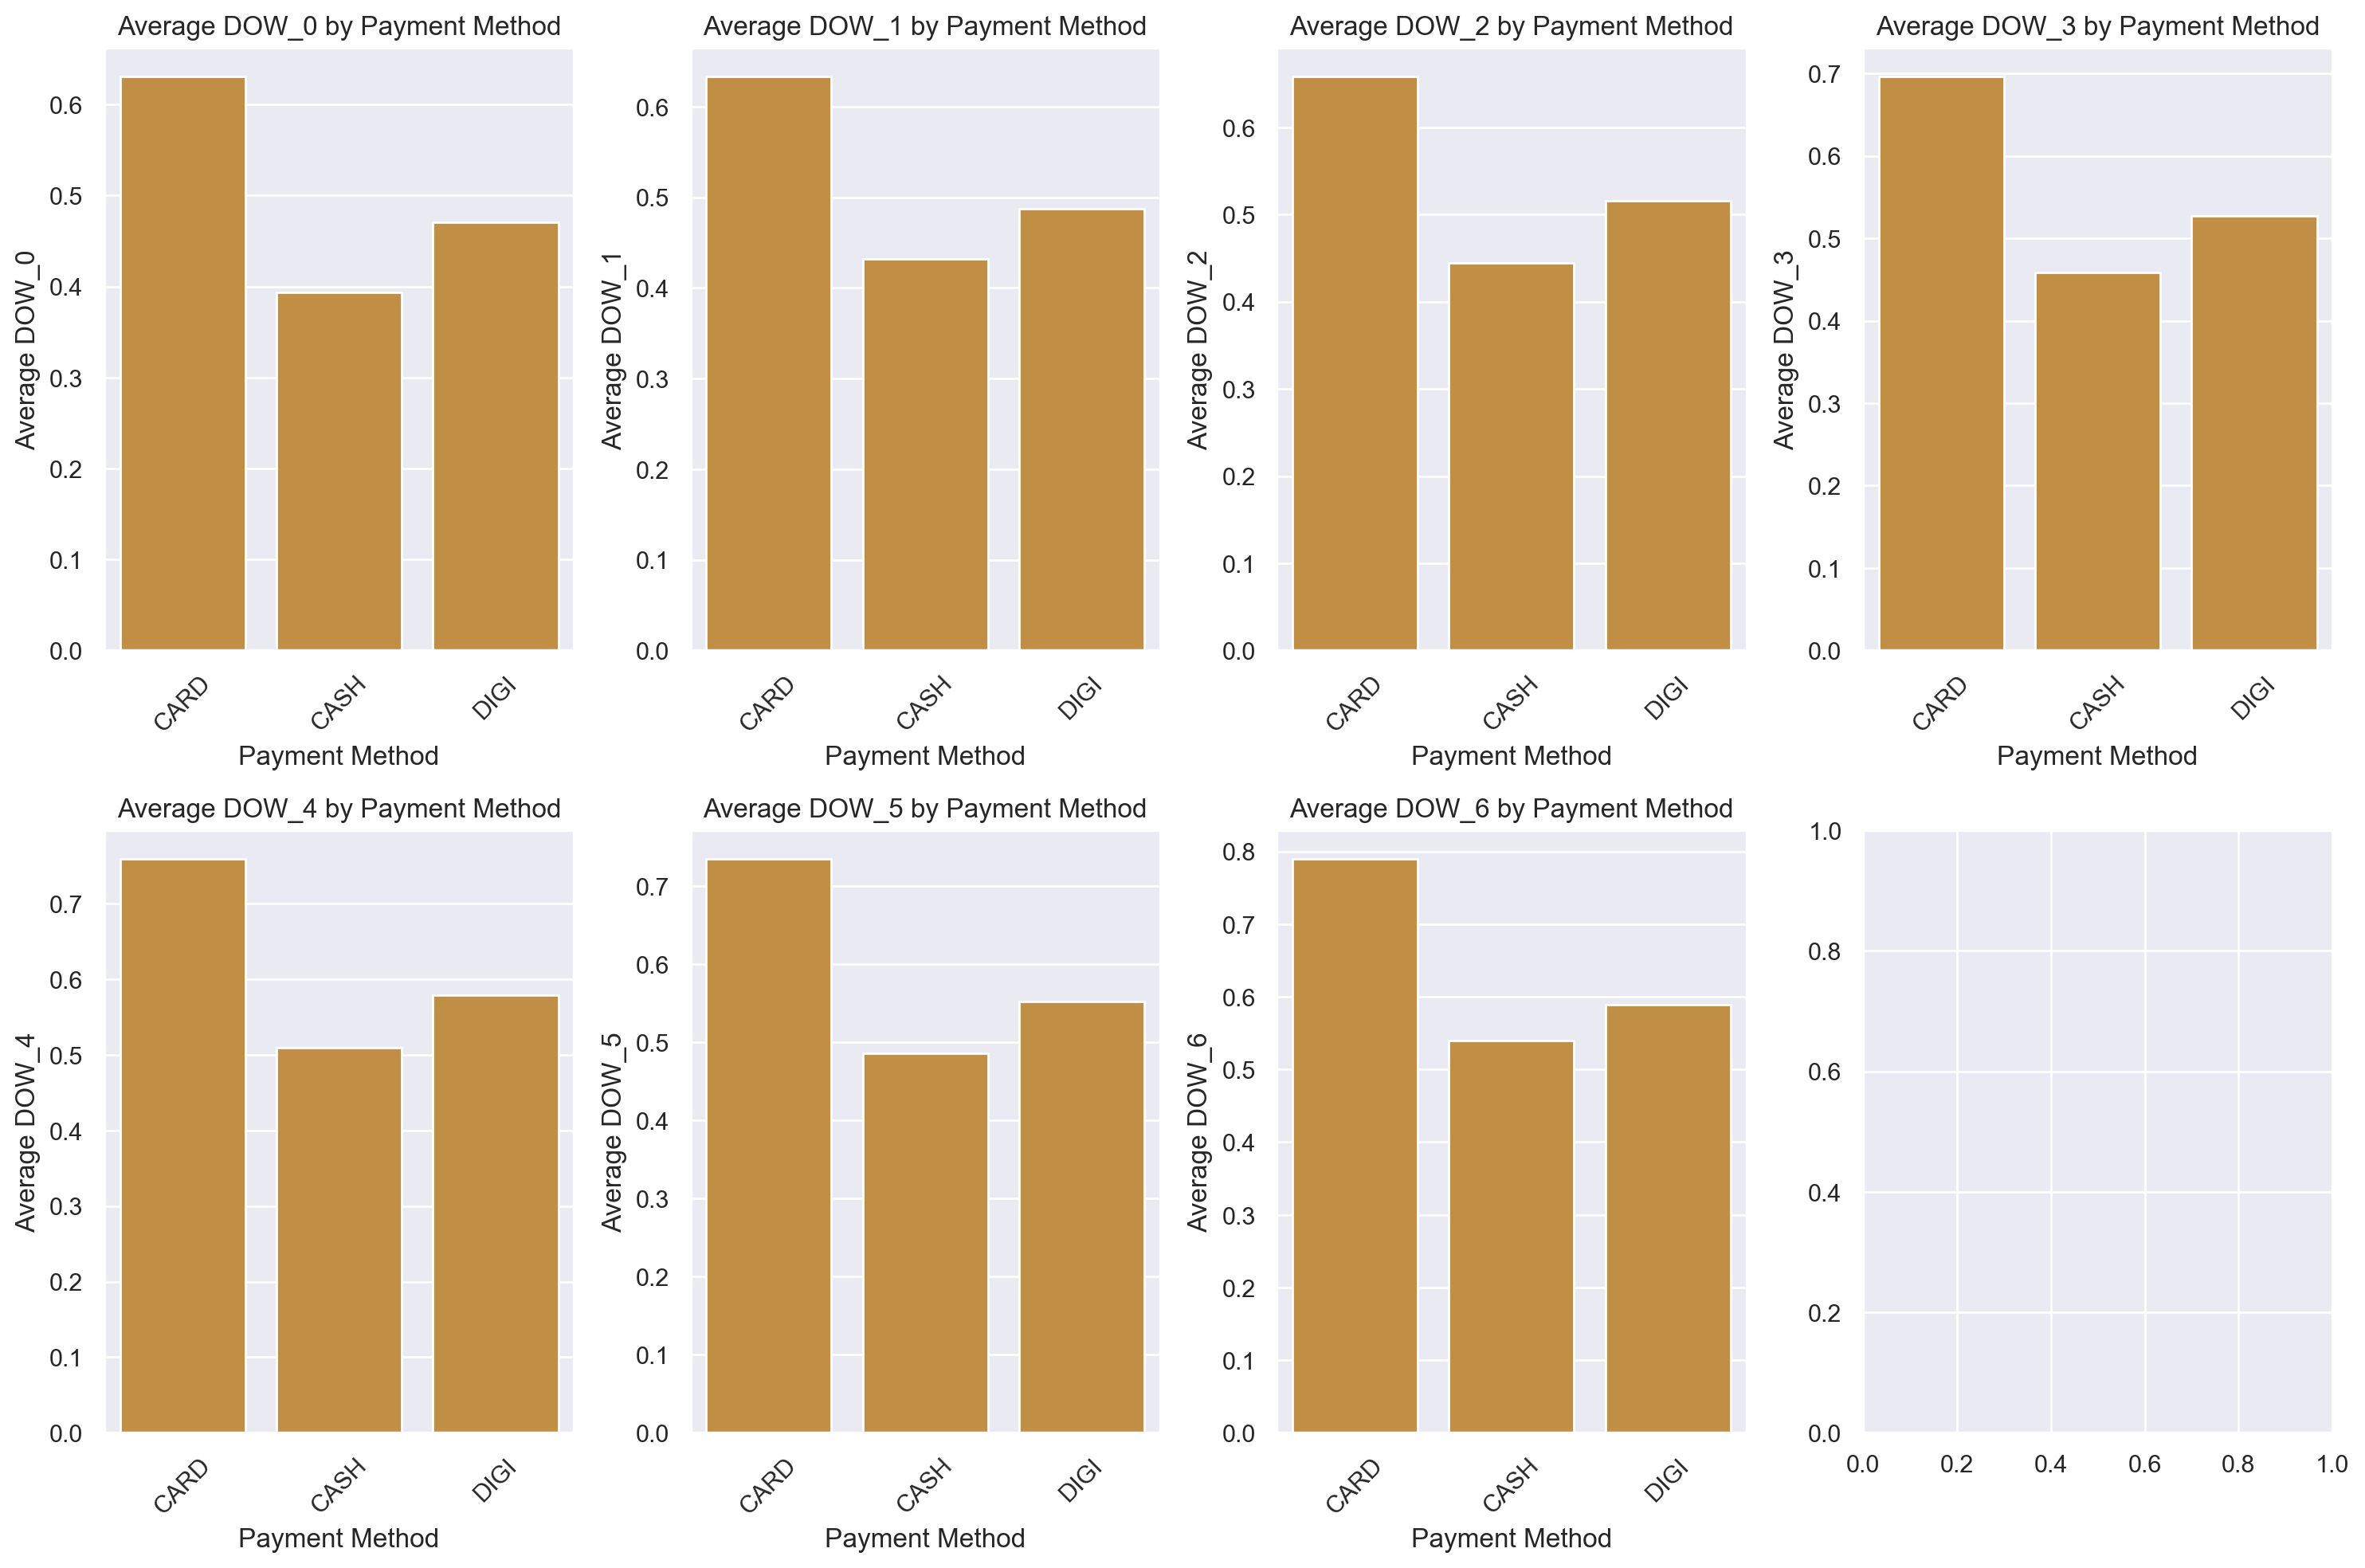

In [216]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()

for i in range(7):
    dow_column = f'DOW_{i}'  #making it run through all the dow columns
    avg_data = food_df.groupby('payment_method')[dow_column].mean().reset_index()
    
    sns.barplot(x='payment_method', y=dow_column, data=avg_data, ax=axes[i], color=colors["Y"])
    
    axes[i].set_title(f'Average {dow_column} by Payment Method')
    axes[i].set_xlabel('Payment Method')
    axes[i].set_ylabel(f'Average {dow_column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

> There is also no significant difference in behaviour of payment method for each day of the week.

# **Data Exporting** <a id="EDA-Conclusions" class="anchor"></a>
[Back to ToC](#toc)<br>

In [217]:
# Exporting data
food_df.to_csv('../Data/food_df_dataset.csv')